# Predictions with Small Dataset

## I. Import Dataset

In [1]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Loading the data
df = pd.read_csv('clean data/Top 1000 IMDb movies.csv')

sns.set(rc={'figure.figsize':(23.4,16.54)})

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Movie_Name        1000 non-null   object 
 2   Year_of_Release   1000 non-null   int64  
 3   C_Rating          984 non-null    object 
 4   Watch_Time_(min)  1000 non-null   int64  
 5   Genre             1000 non-null   object 
 6   Movie_Rating      1000 non-null   float64
 7   Metascore         844 non-null    float64
 8   Votes             1000 non-null   int64  
 9   Gross_($M)        814 non-null    float64
 10  Description       1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [3]:
df.head(20)

,Unnamed: 0,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description
0,0,The Shawshank Redemption,1994,R,142,Drama,9.3,82.0,2735235,28.34,"Over the course of several years, two convicts..."
1,1,The Godfather,1972,R,175,"Crime, Drama",9.2,100.0,1902109,134.97,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,84.0,2708419,534.86,When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,95.0,1380843,96.90,"In German-occupied Poland during World War II,..."
4,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,94.0,1881383,377.85,Gandalf and Aragorn lead the World of Men agai...
5,5,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,97.0,809518,4.36,The jury in a New York City murder trial is fr...
6,6,The Godfather Part II,1974,R,202,"Crime, Drama",9.0,90.0,1296679,57.30,The early life and career of Vito Corleone in ...
7,7,Pulp Fiction,1994,R,154,"Crime, Drama",8.9,95.0,2101929,107.93,"The lives of two mob hitmen, a boxer, a gangst..."
8,8,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",8.8,74.0,2404179,292.58,A thief who steals corporate secrets through t...
9,9,Fight Club,1999,R,139,Drama,8.8,66.0,2177808,37.03,An insomniac office worker and a devil-may-car...


In [4]:
df.isnull().sum()

Unnamed: 0            0
Movie_Name            0
Year_of_Release       0
C_Rating             16
Watch_Time_(min)      0
Genre                 0
Movie_Rating          0
Metascore           156
Votes                 0
Gross_($M)          186
Description           0
dtype: int64

## II. Features Engineering

### 1. Create New Features

In [5]:
genre_1 = []
genre_2 = []
genre_3 = []

for genres in df['Genre']:
    genre_1.append(genres.split(',')[0].strip() if len(genres.split(',')) >= 1 else np.nan)
    genre_2.append(genres.split(',')[1].strip() if len(genres.split(',')) >= 2 else np.nan)
    genre_3.append(genres.split(',')[2].strip() if len(genres.split(',')) >= 3 else np.nan)
    
df['Genre_1'] = genre_1
df['Genre_2'] = genre_2
df['Genre_3'] = genre_3

### 2. Data Cleaning

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.dropna(axis=0,subset=['C_Rating'],inplace=True)

### 3. Missing Value Imputation

#### Metascore

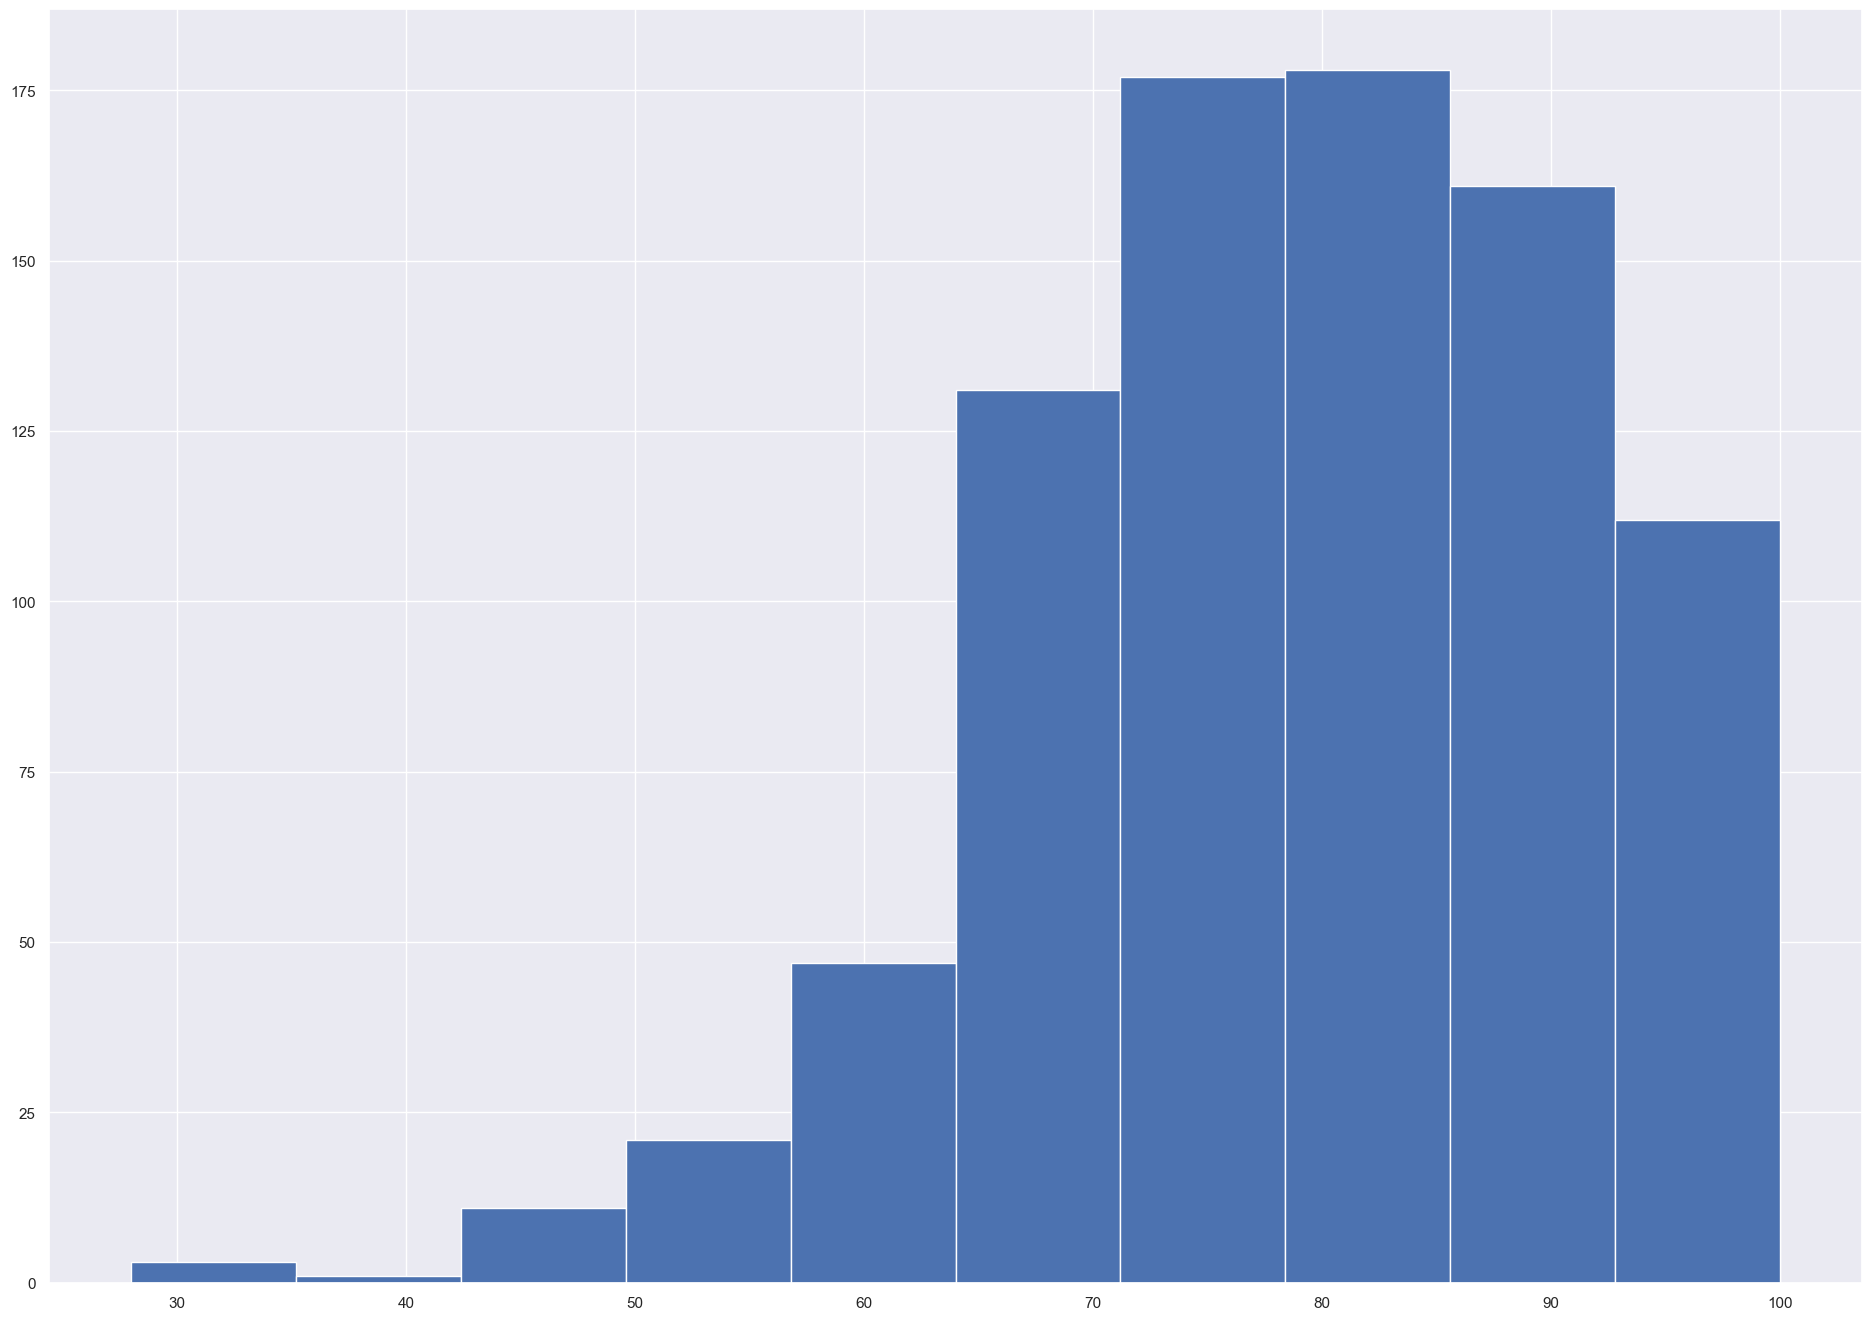

In [9]:
plt.hist(df['Metascore'])
plt.show()

In [10]:
df['Metascore'] = df['Metascore'].fillna(0)

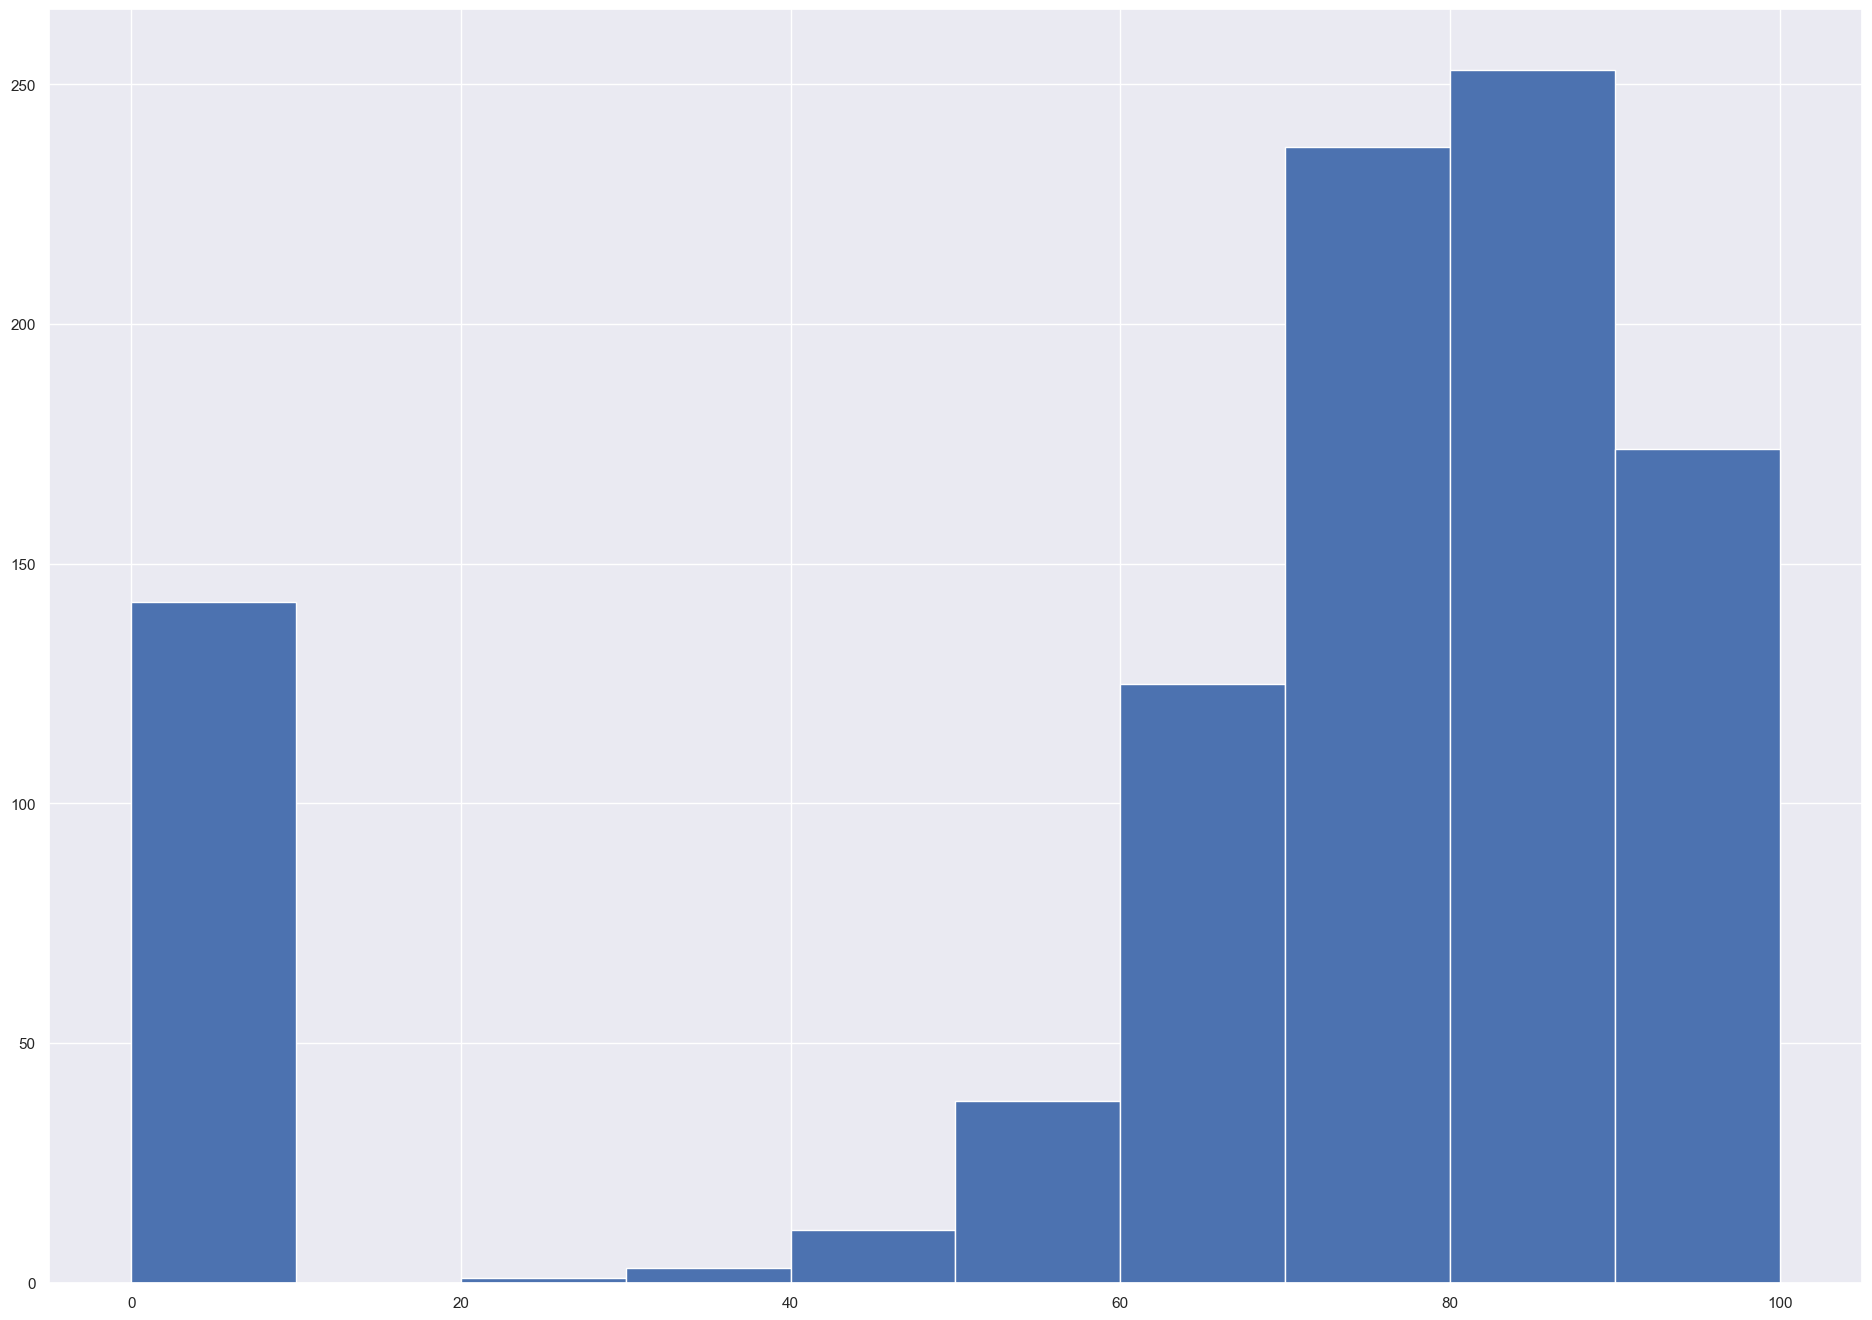

In [11]:
plt.hist(df['Metascore'])
plt.show()

#### Gross

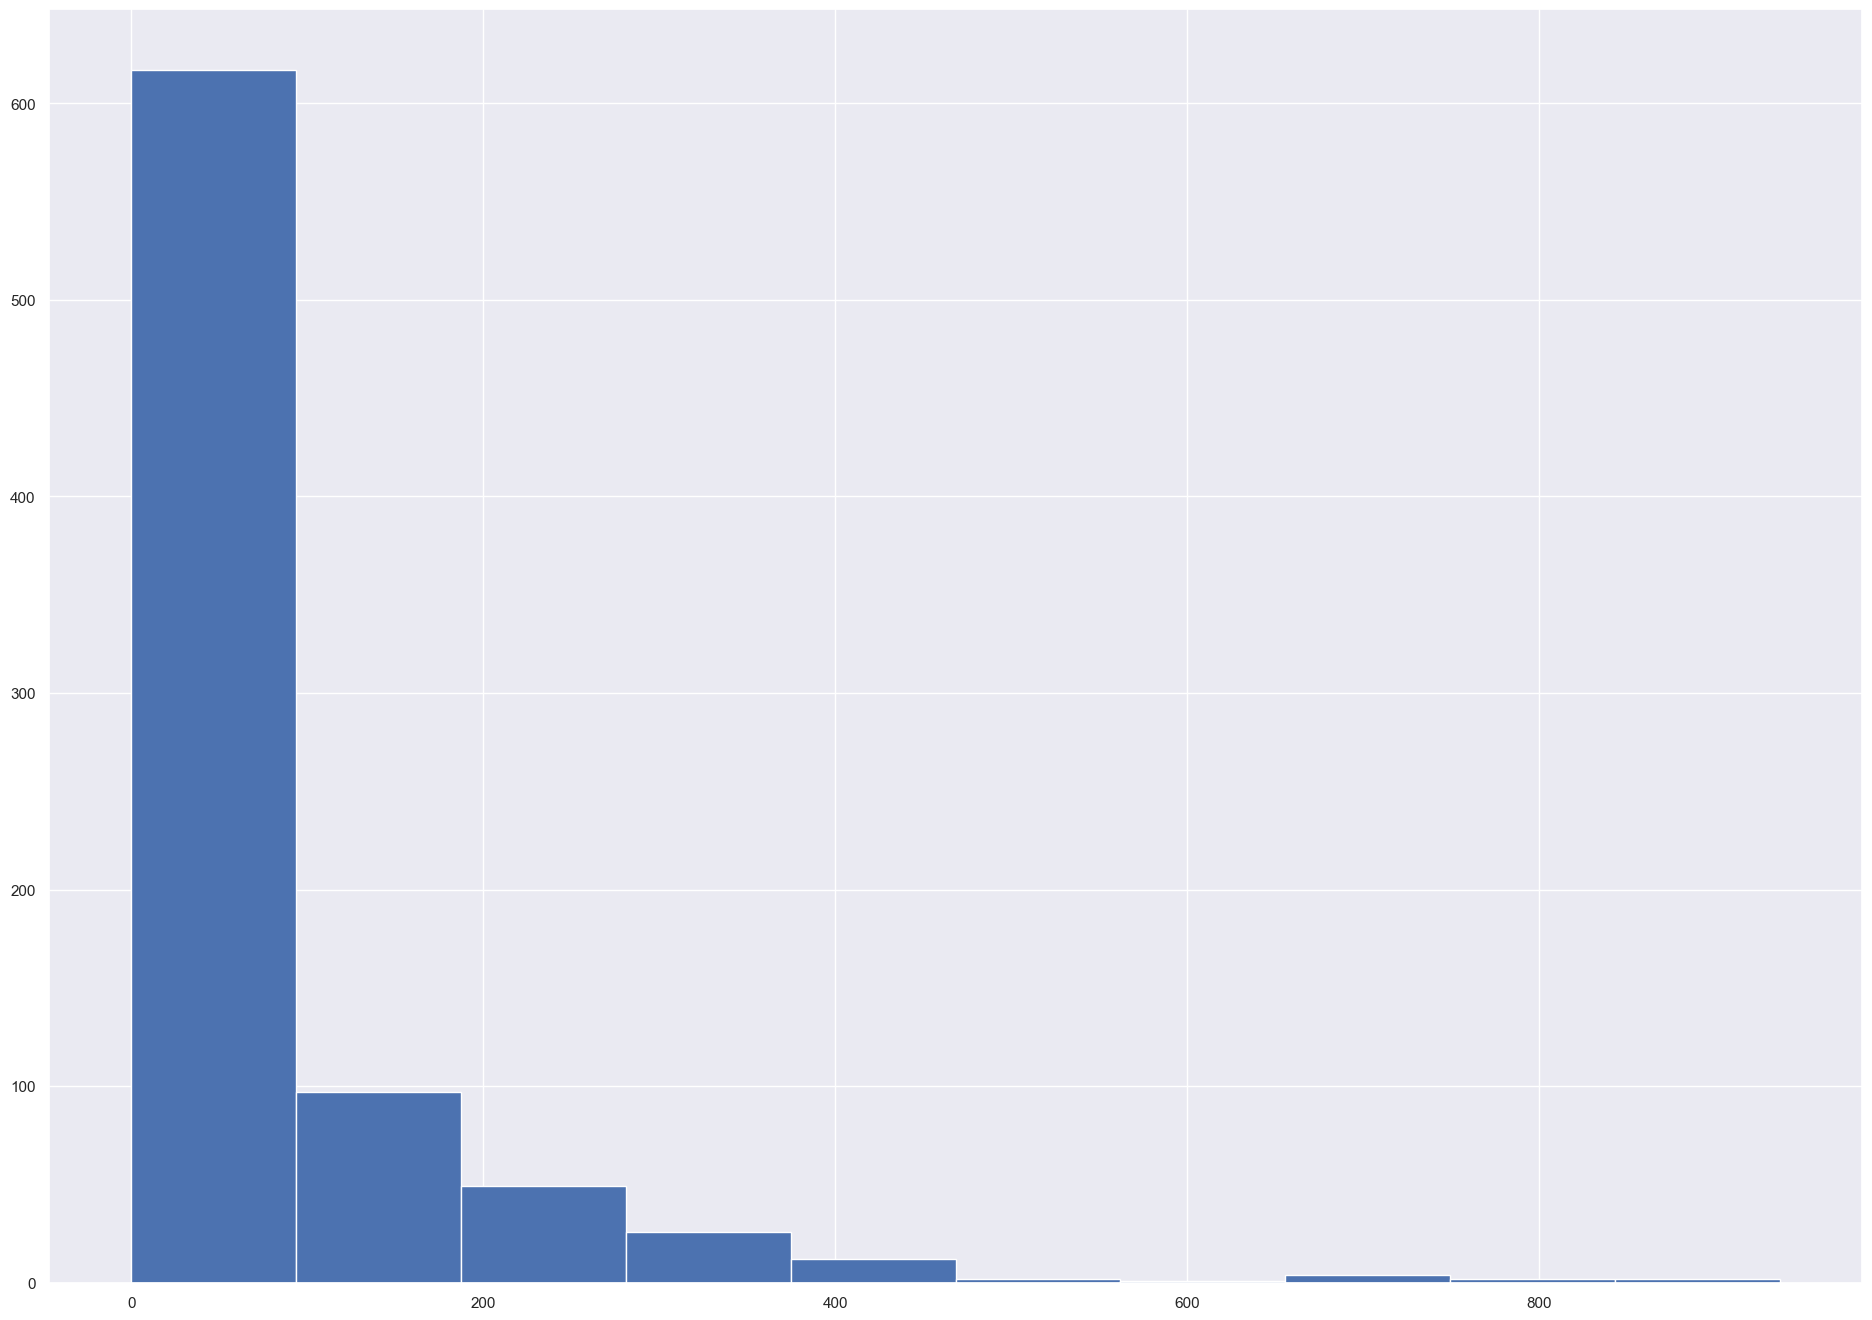

In [12]:
plt.hist(df['Gross_($M)'])
plt.show()

In [13]:
df['Gross_($M)'] = df['Gross_($M)'].fillna(df['Gross_($M)'].median())

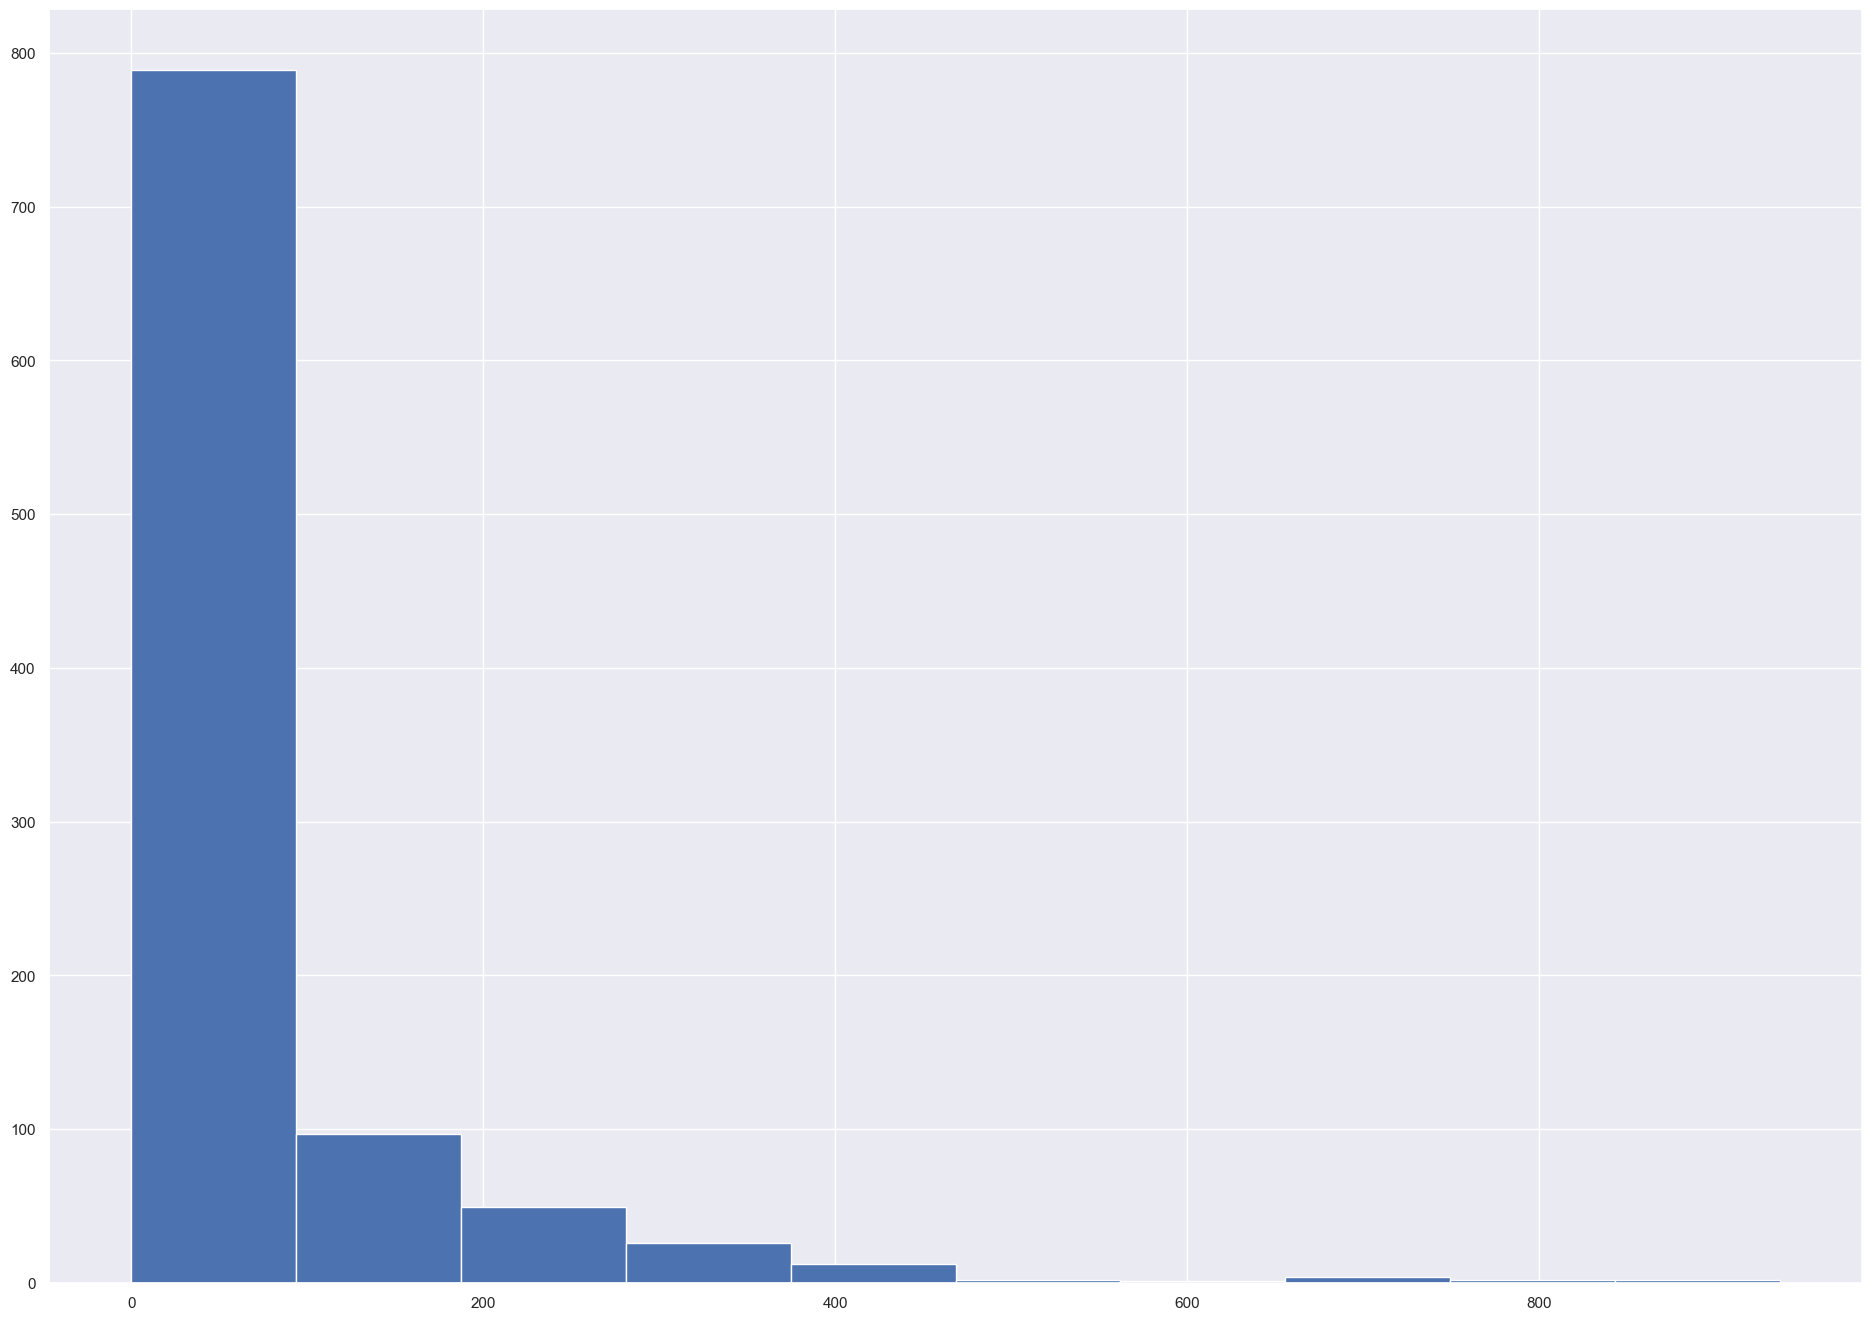

In [14]:
plt.hist(df['Gross_($M)'])
plt.show()

#### Genre_1, Genre_2, Genre_3

In [15]:
random_samples = df['Genre_1'].dropna().sample(n=df['Genre_1'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_1'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_1'].isnull(), 'Genre_1']=random_samples

random_samples = df['Genre_2'].dropna().sample(n=df['Genre_2'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_2'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_2'].isnull(), 'Genre_2']=random_samples

random_samples = df['Genre_3'].dropna().sample(n=df['Genre_3'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_3'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_3'].isnull(), 'Genre_3']=random_samples

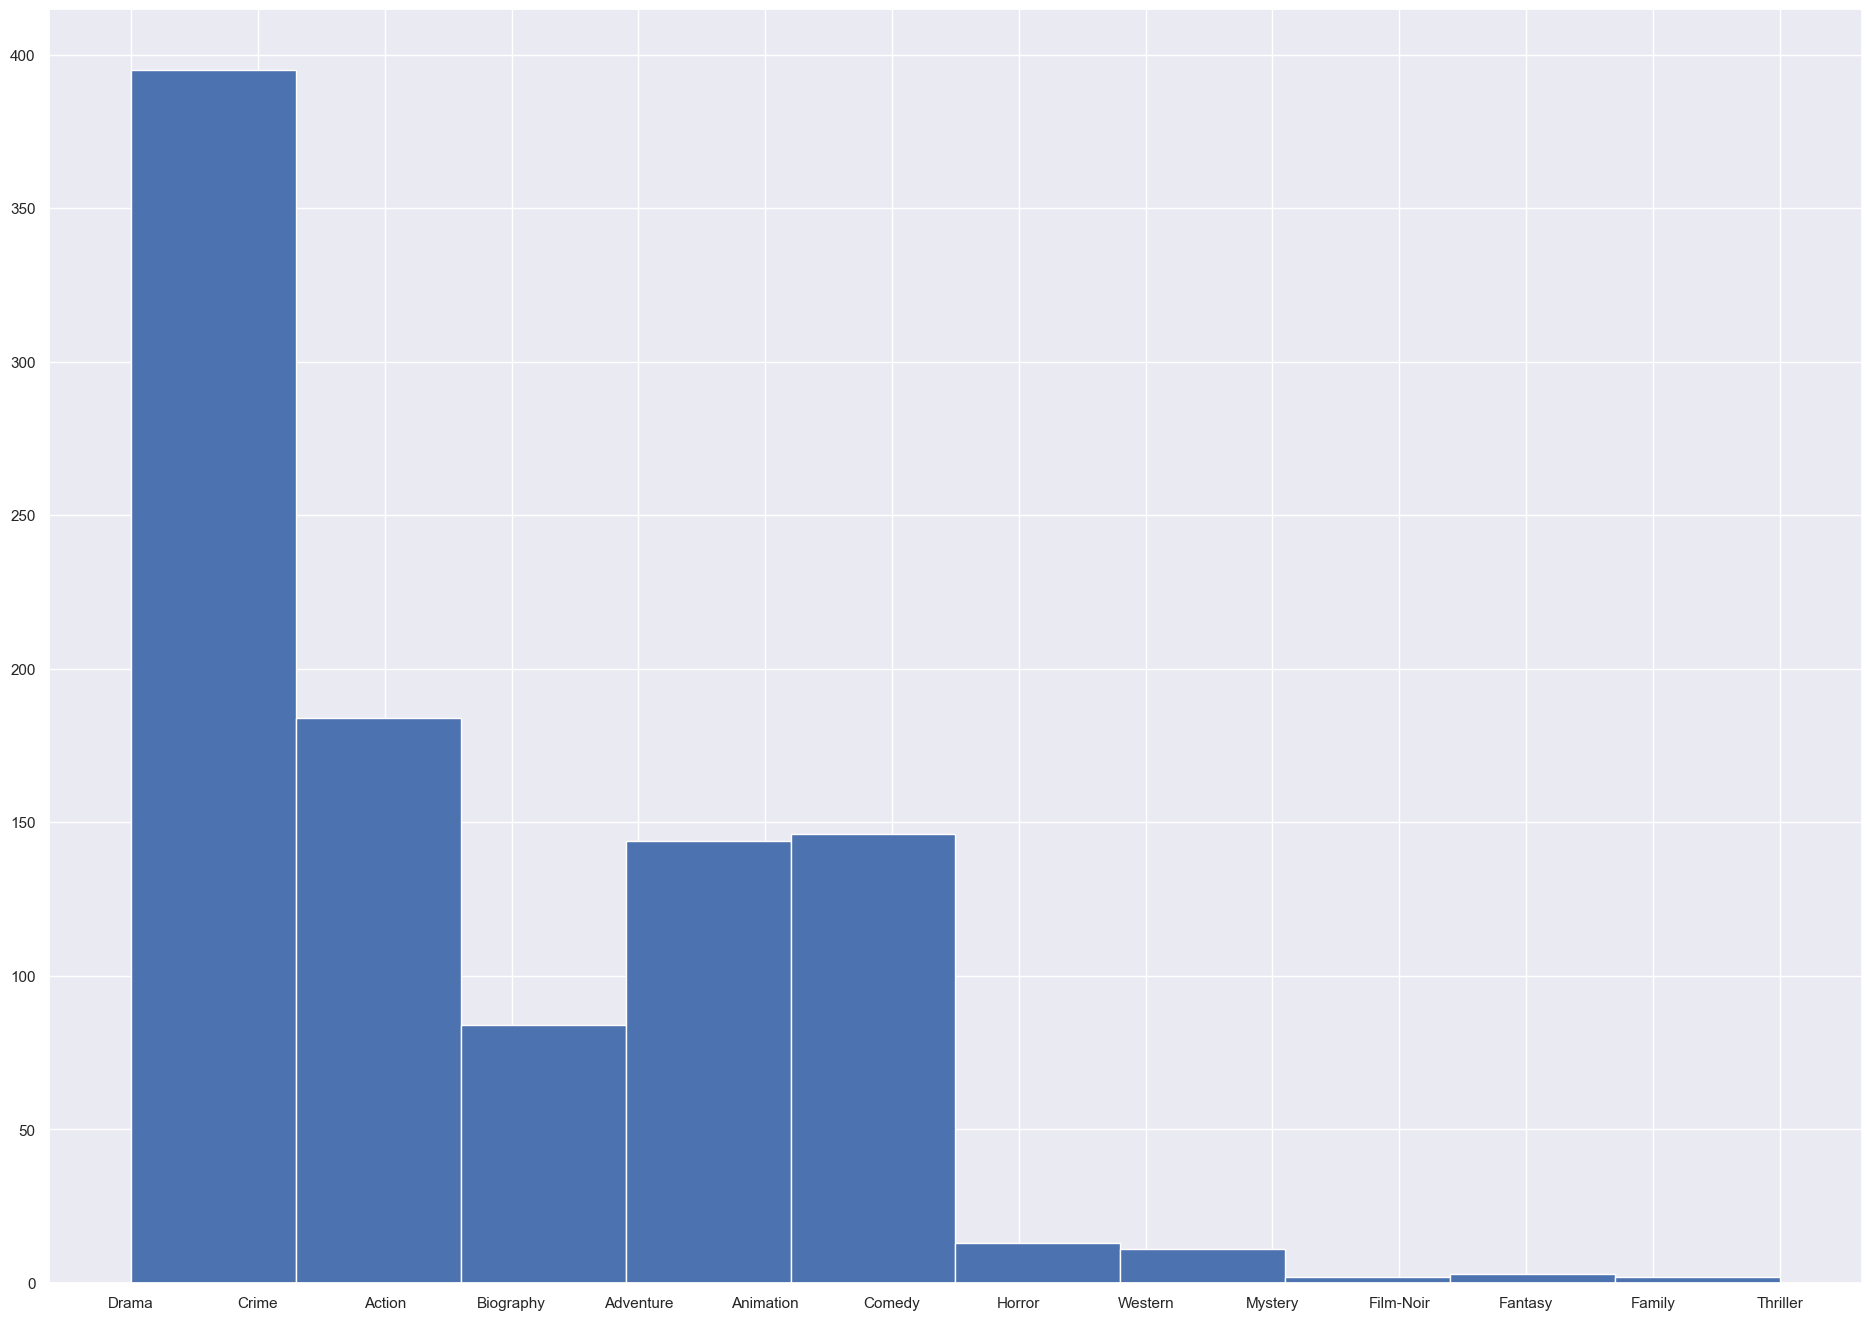

In [16]:
plt.hist(df['Genre_1'])
plt.show()

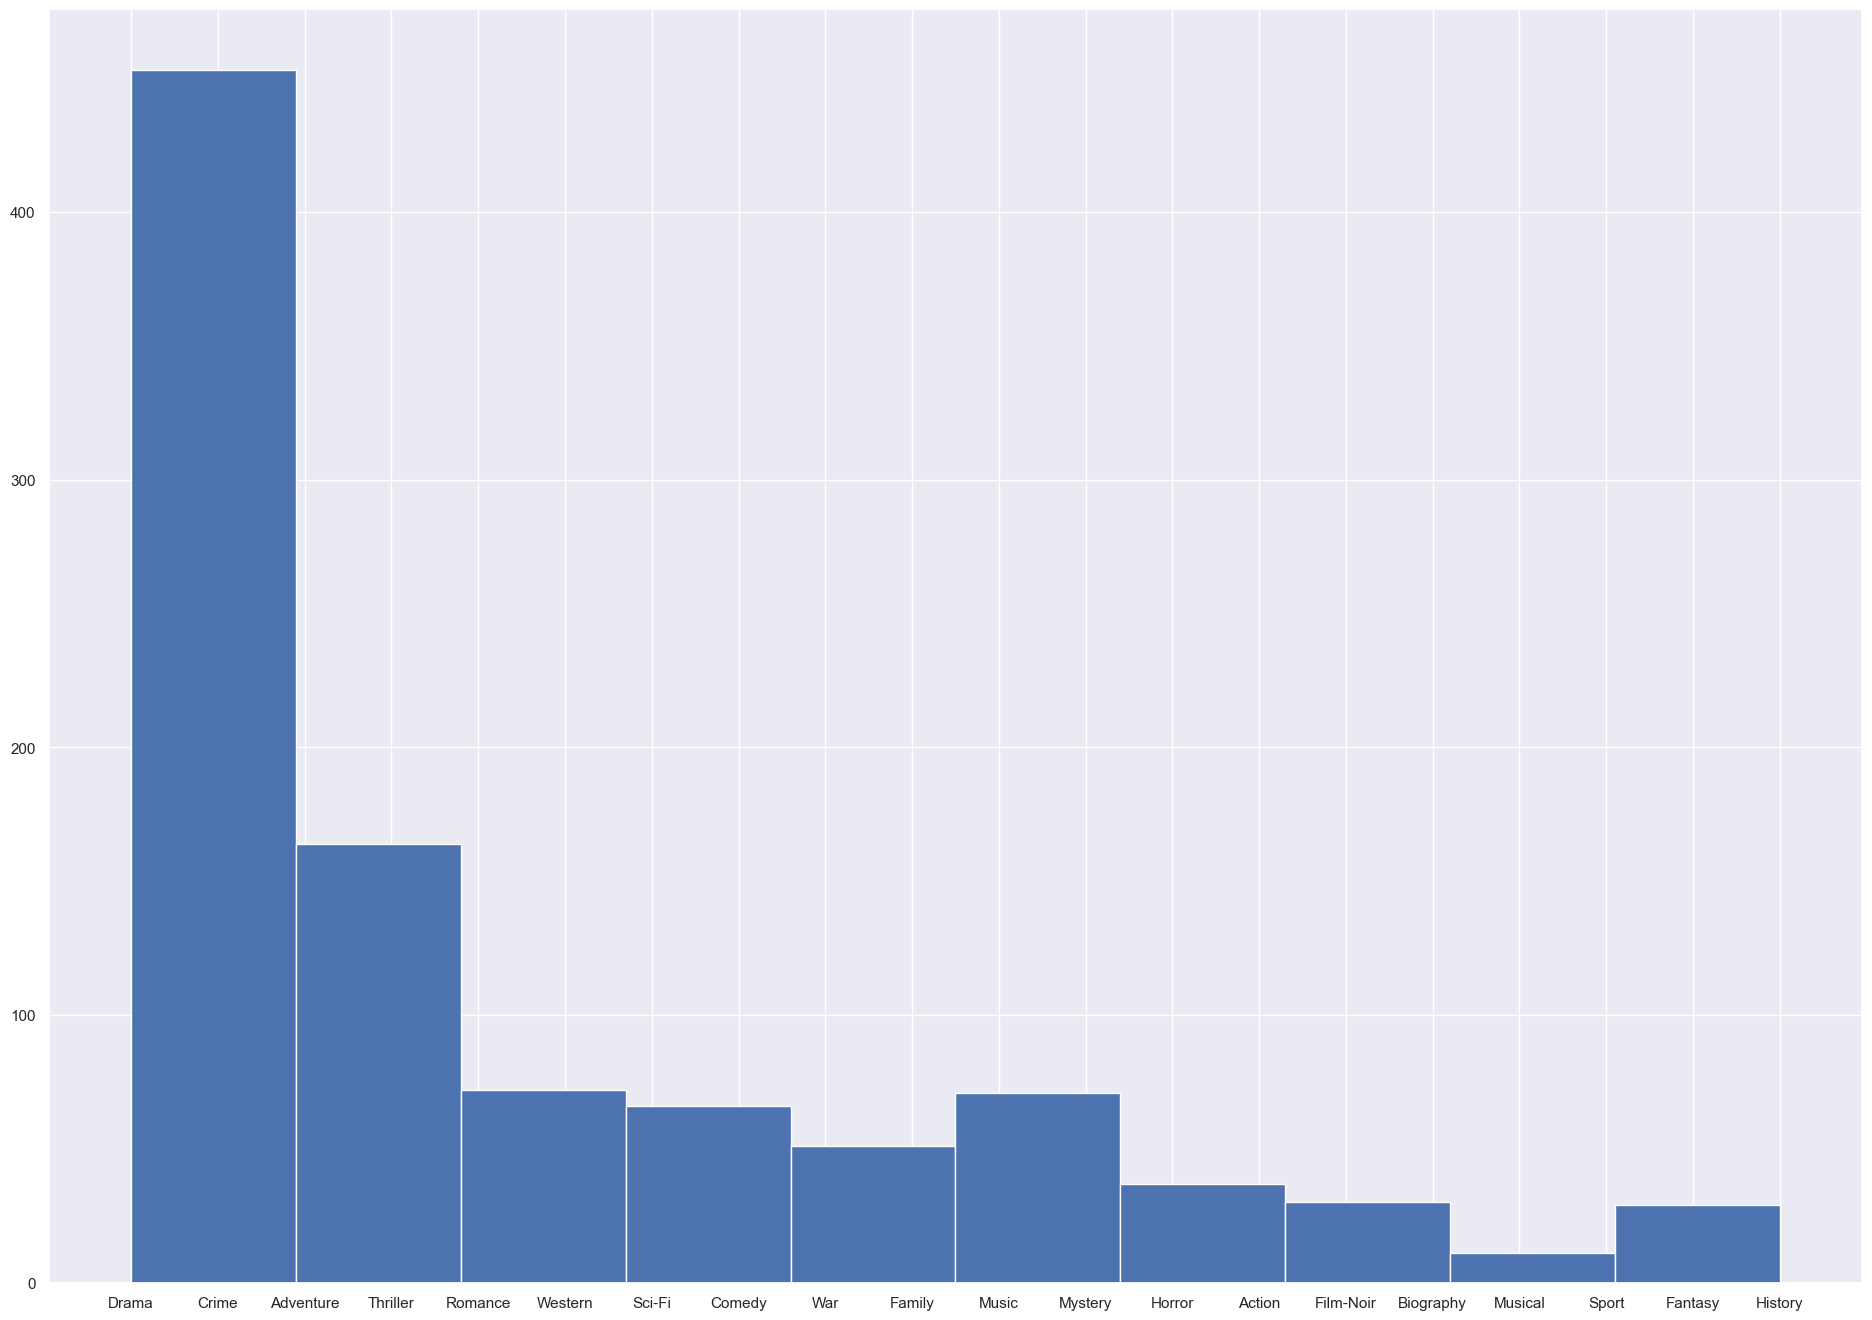

In [17]:
plt.hist(df['Genre_2'])
plt.show()

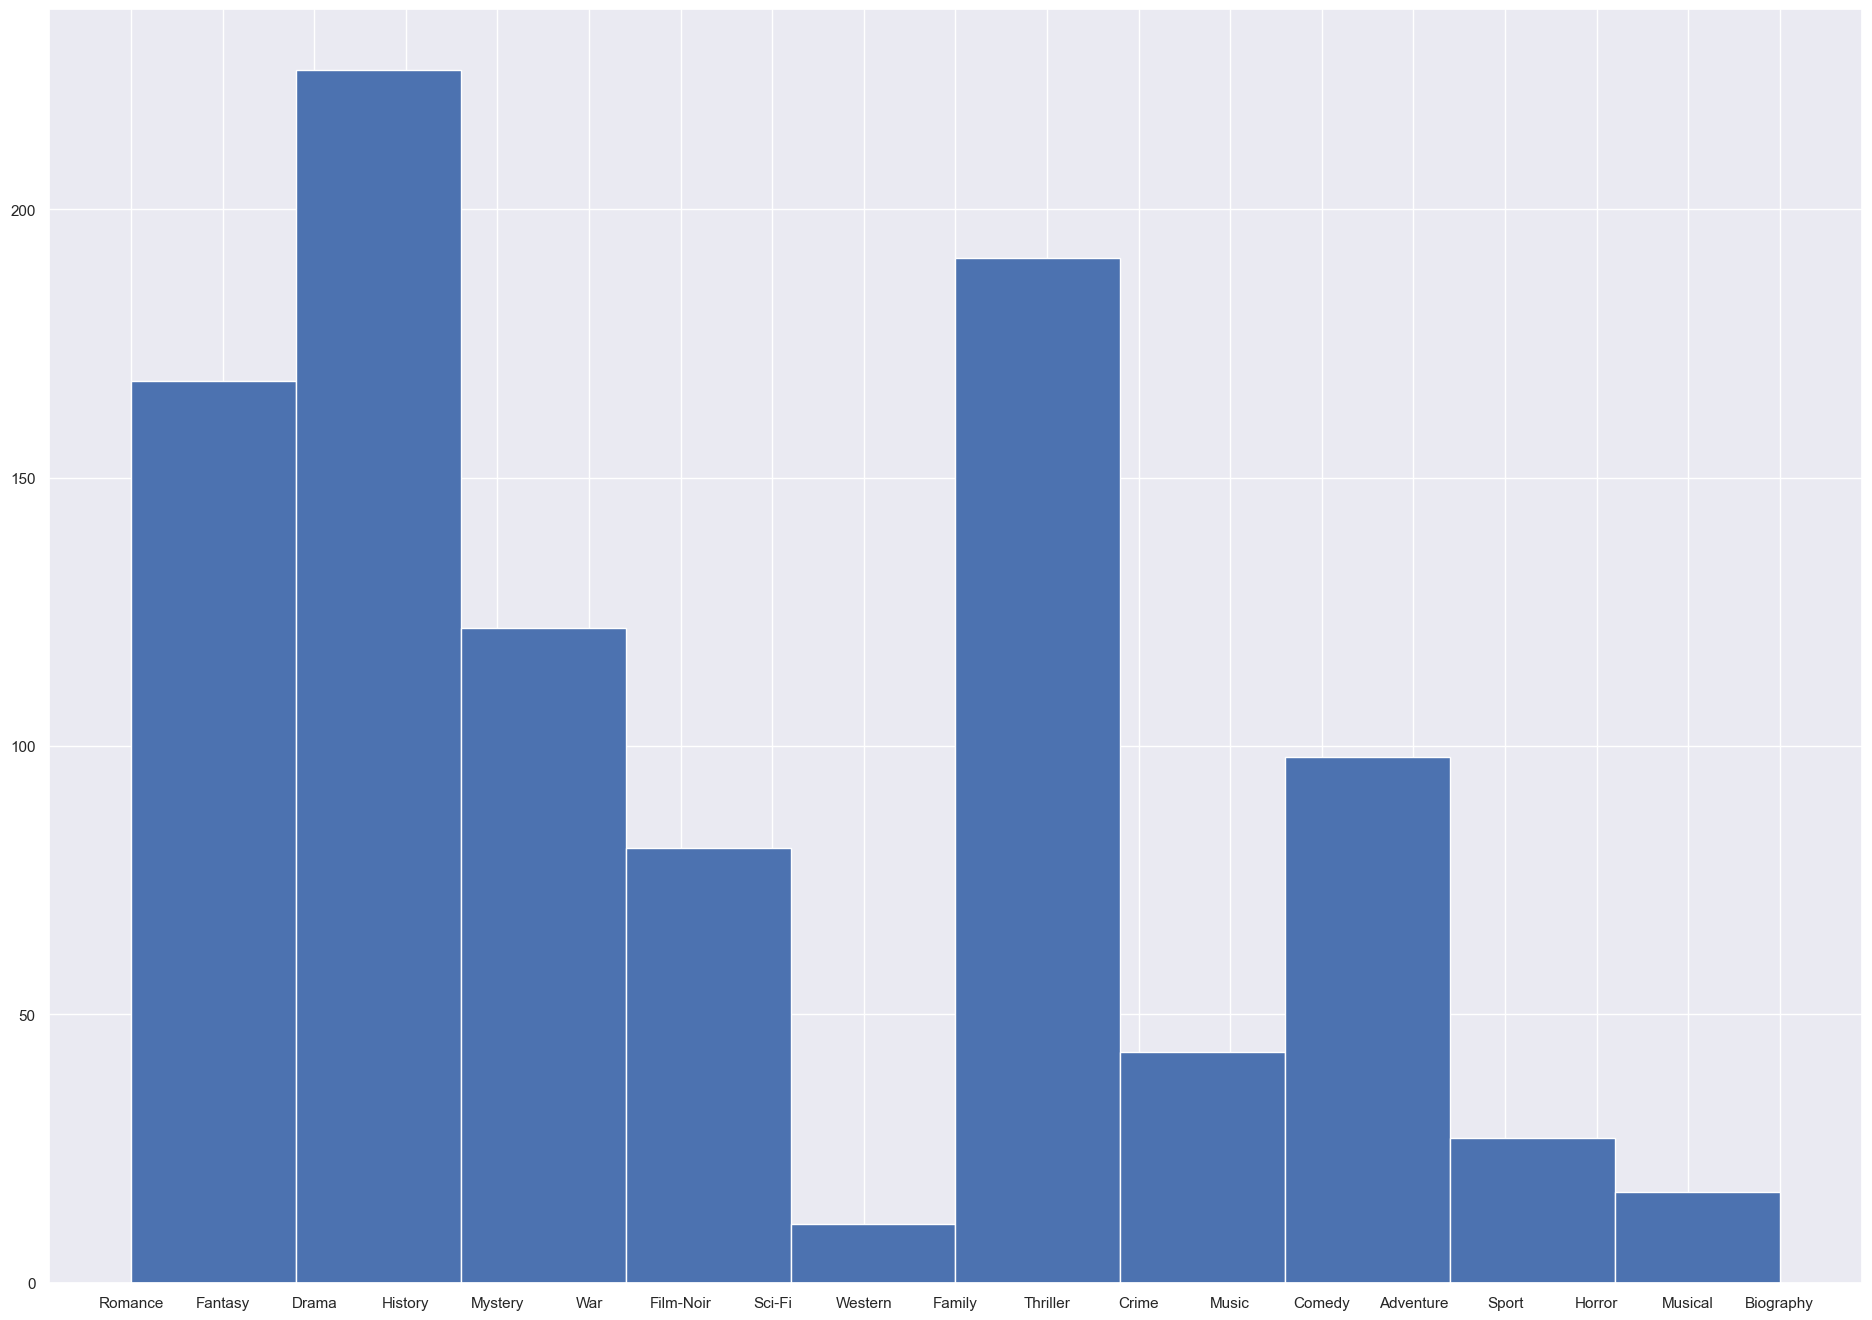

In [18]:
plt.hist(df['Genre_3'])
plt.show()

### 4. Label Encoding

In [19]:
le = preprocessing.LabelEncoder()

#### Movie_Name

In [20]:
df['Movie_Name'] = le.fit_transform(df['Movie_Name'])

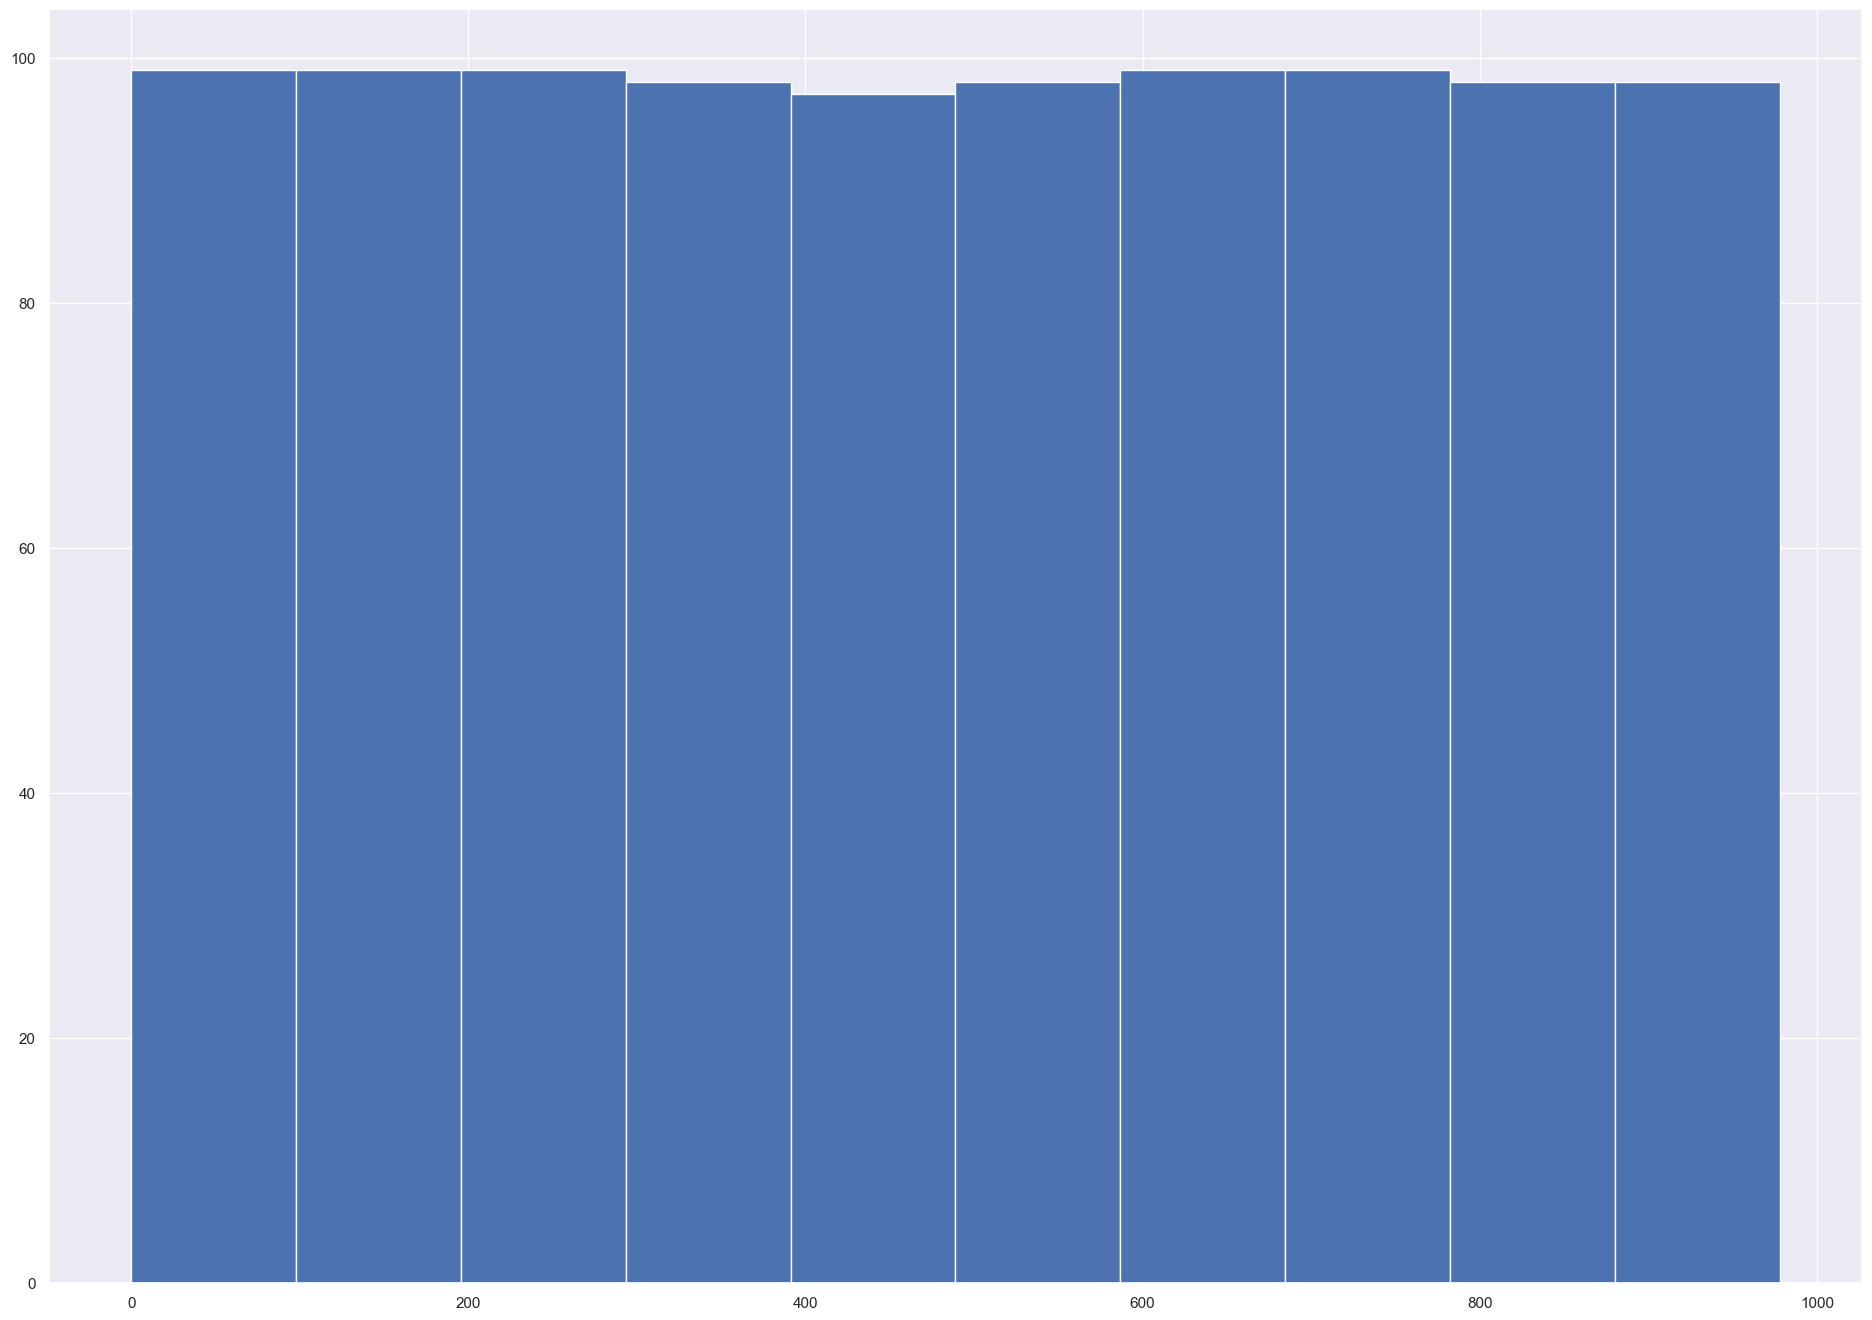

In [21]:
plt.hist(df['Movie_Name'])
plt.show()

#### C_Rating

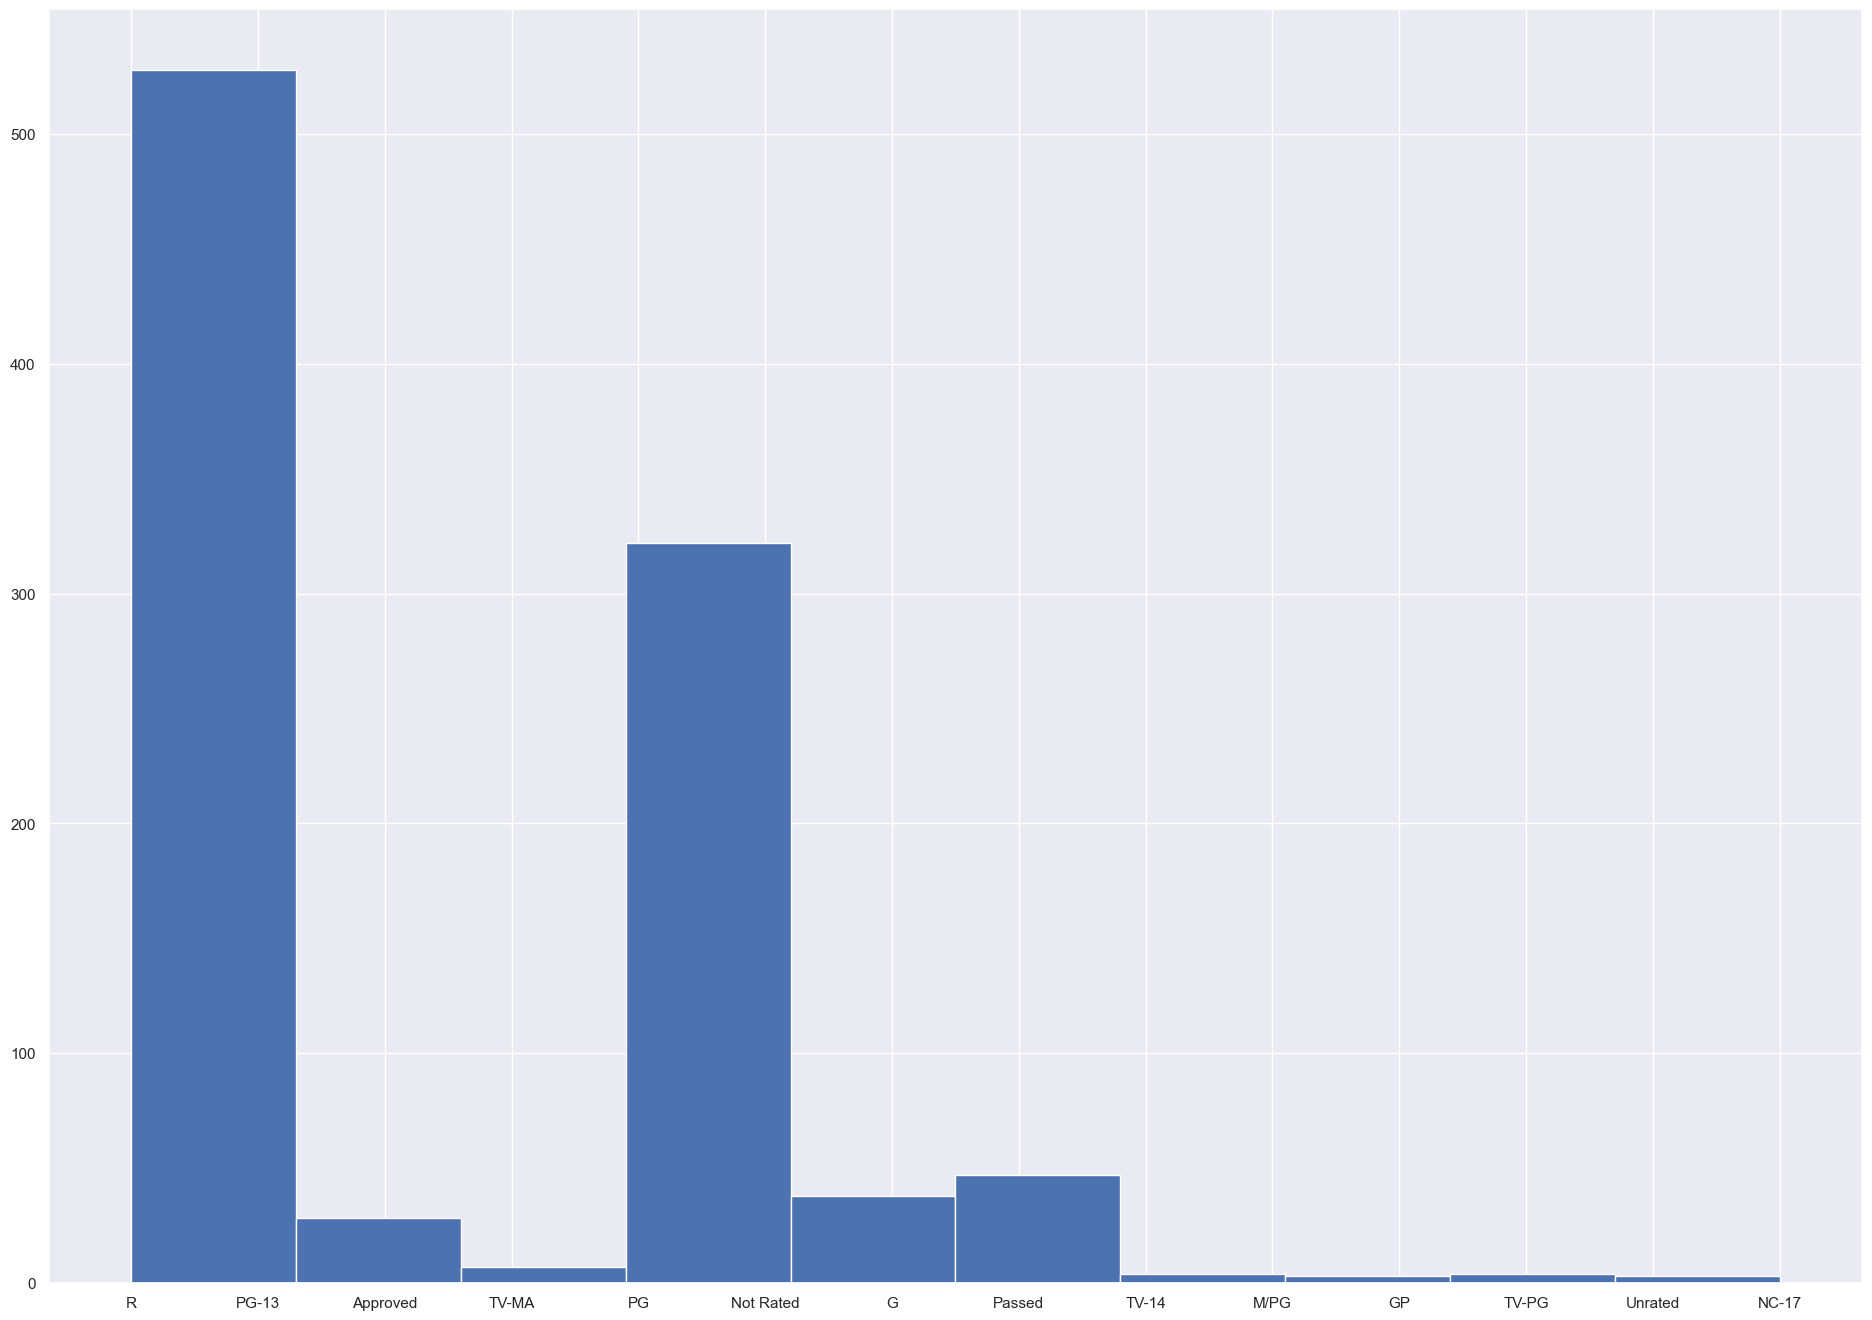

In [22]:
plt.hist(df['C_Rating'])
plt.show()

In [23]:
df['C_Rating'] = le.fit_transform(df['C_Rating'])

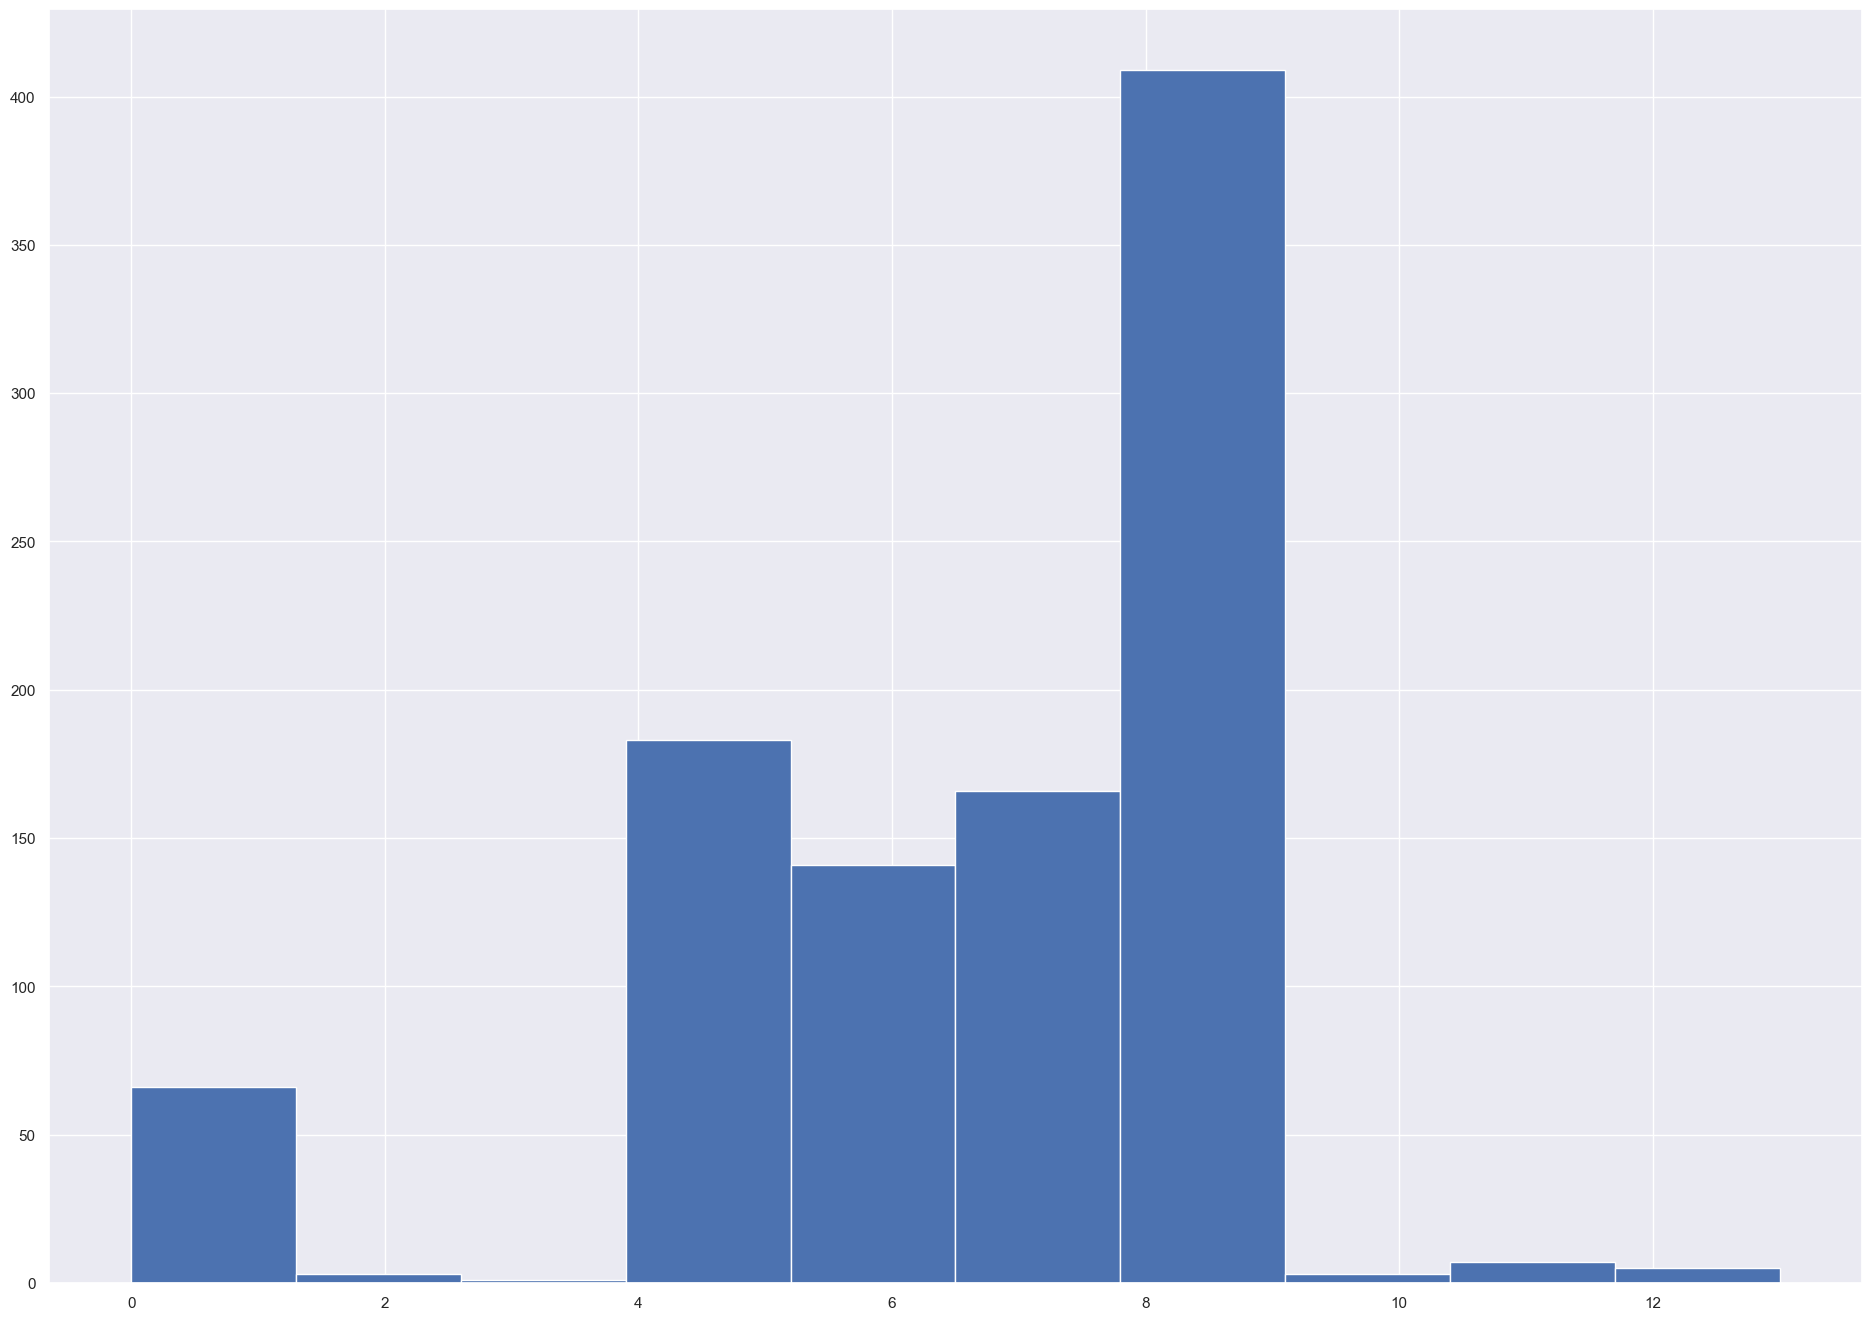

In [24]:
plt.hist(df['C_Rating'])
plt.show()

#### Genre

In [25]:
df['Genre'] = le.fit_transform(df['Genre'])

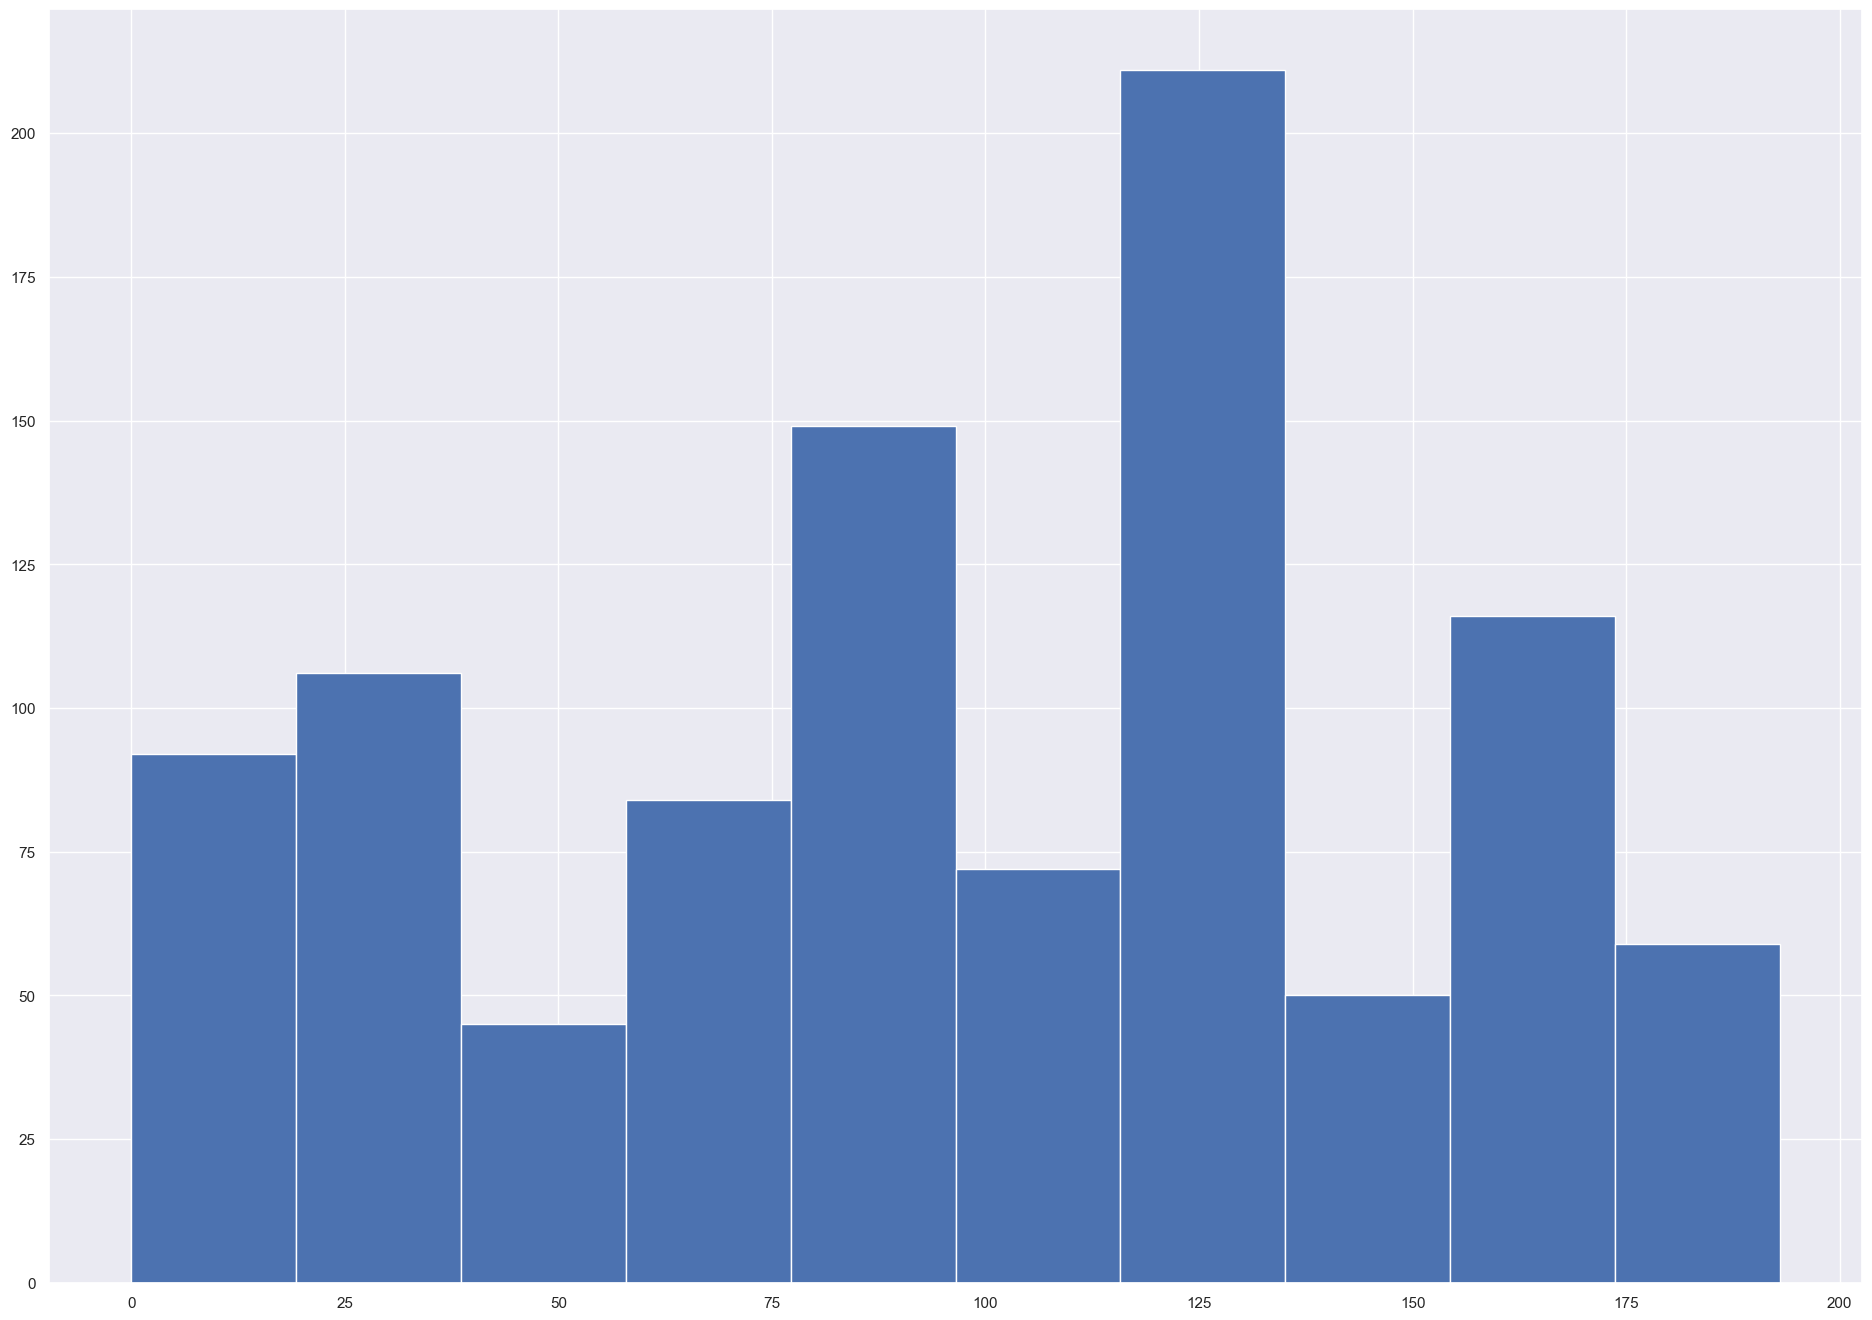

In [26]:
plt.hist(df['Genre'])
plt.show()

#### Description

In [27]:
df['Description'] = le.fit_transform(df['Description'])

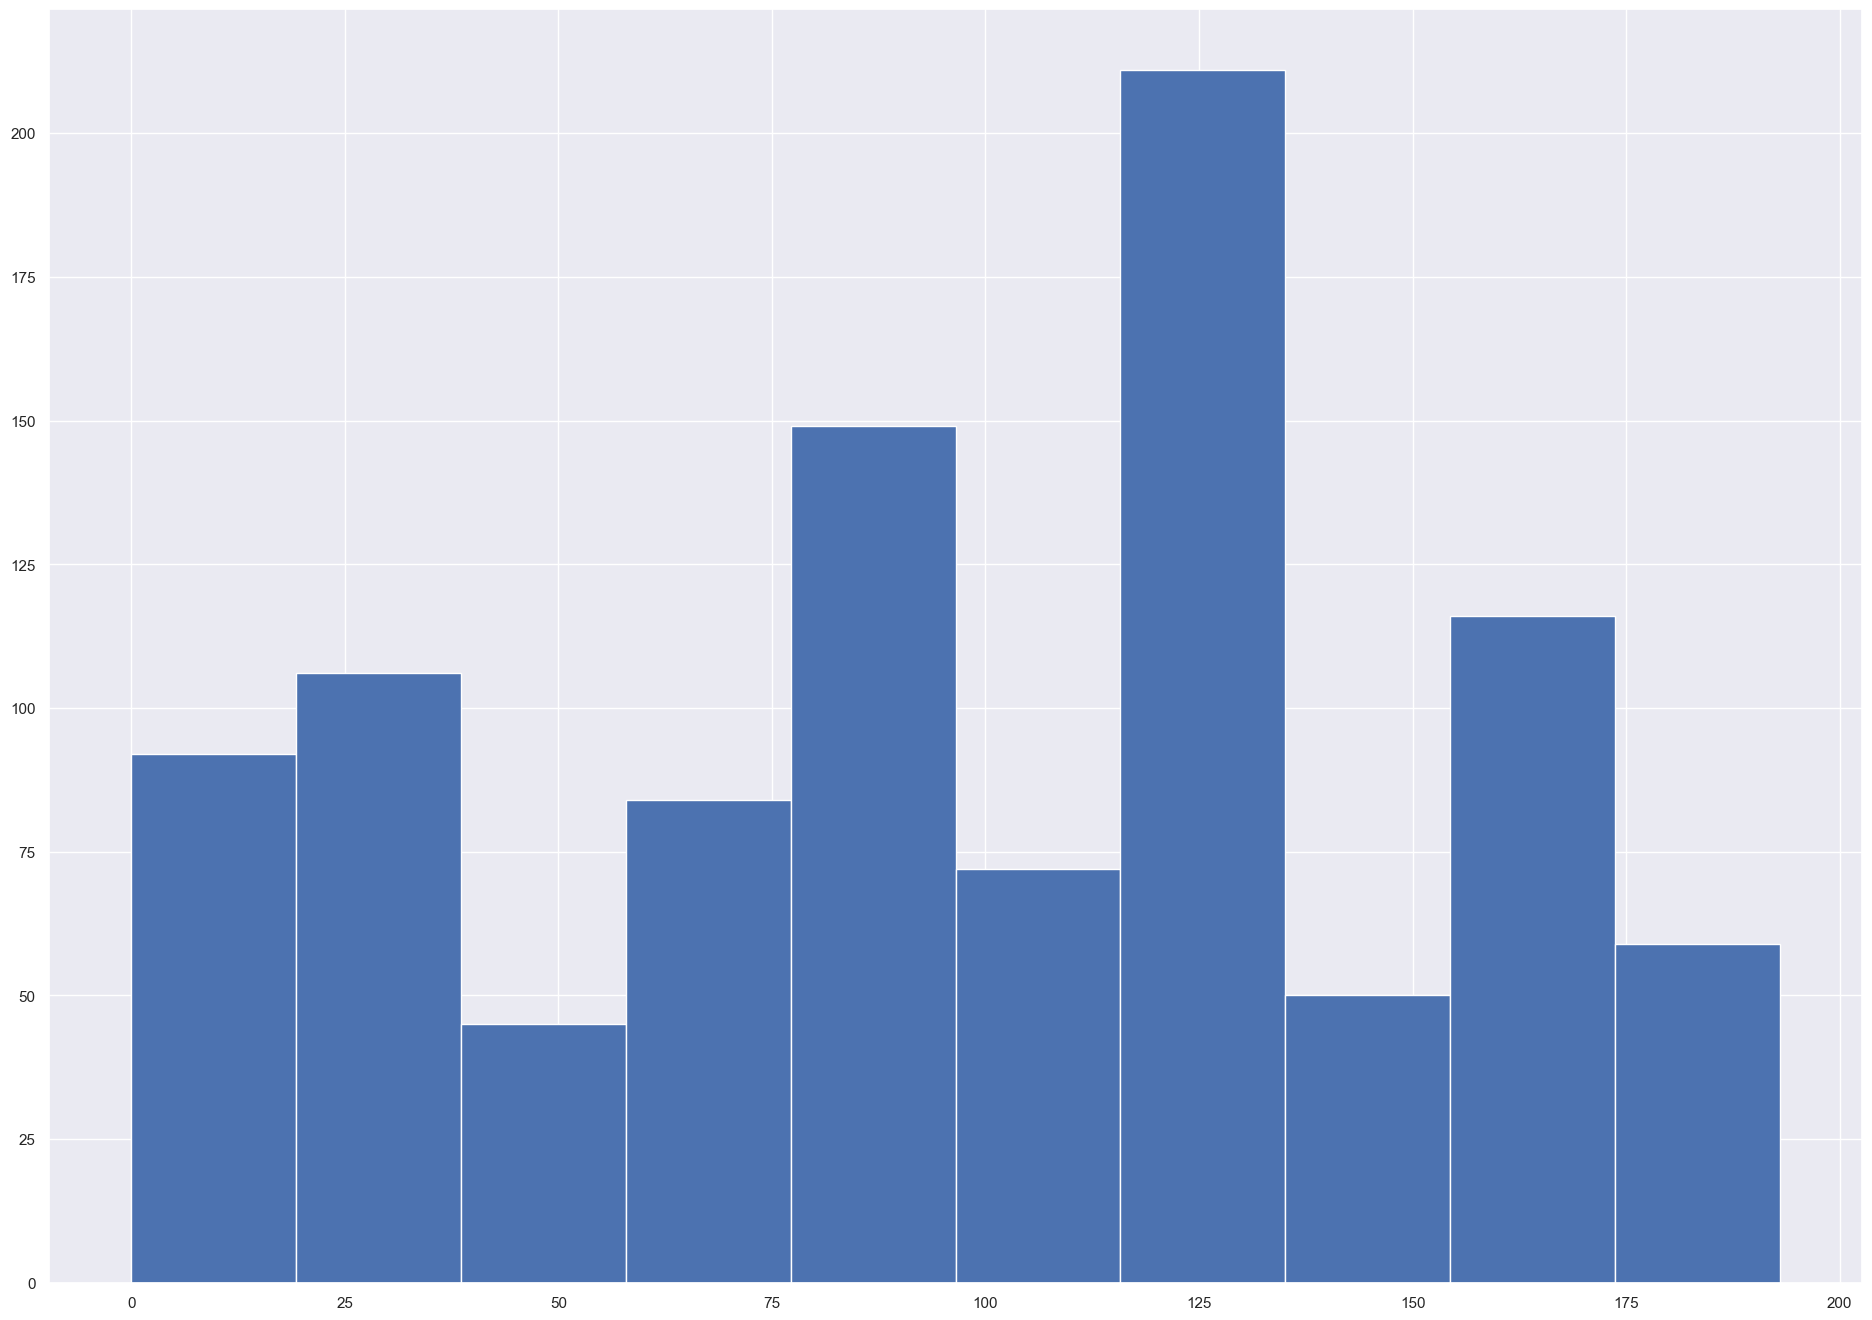

In [28]:
plt.hist(df['Genre'])
plt.show()

#### Genre_1, Genre_2, Genre_3

In [29]:
df['Genre_1'] = le.fit_transform(df['Genre_1'])
df['Genre_2'] = le.fit_transform(df['Genre_2'])
df['Genre_3'] = le.fit_transform(df['Genre_3'])

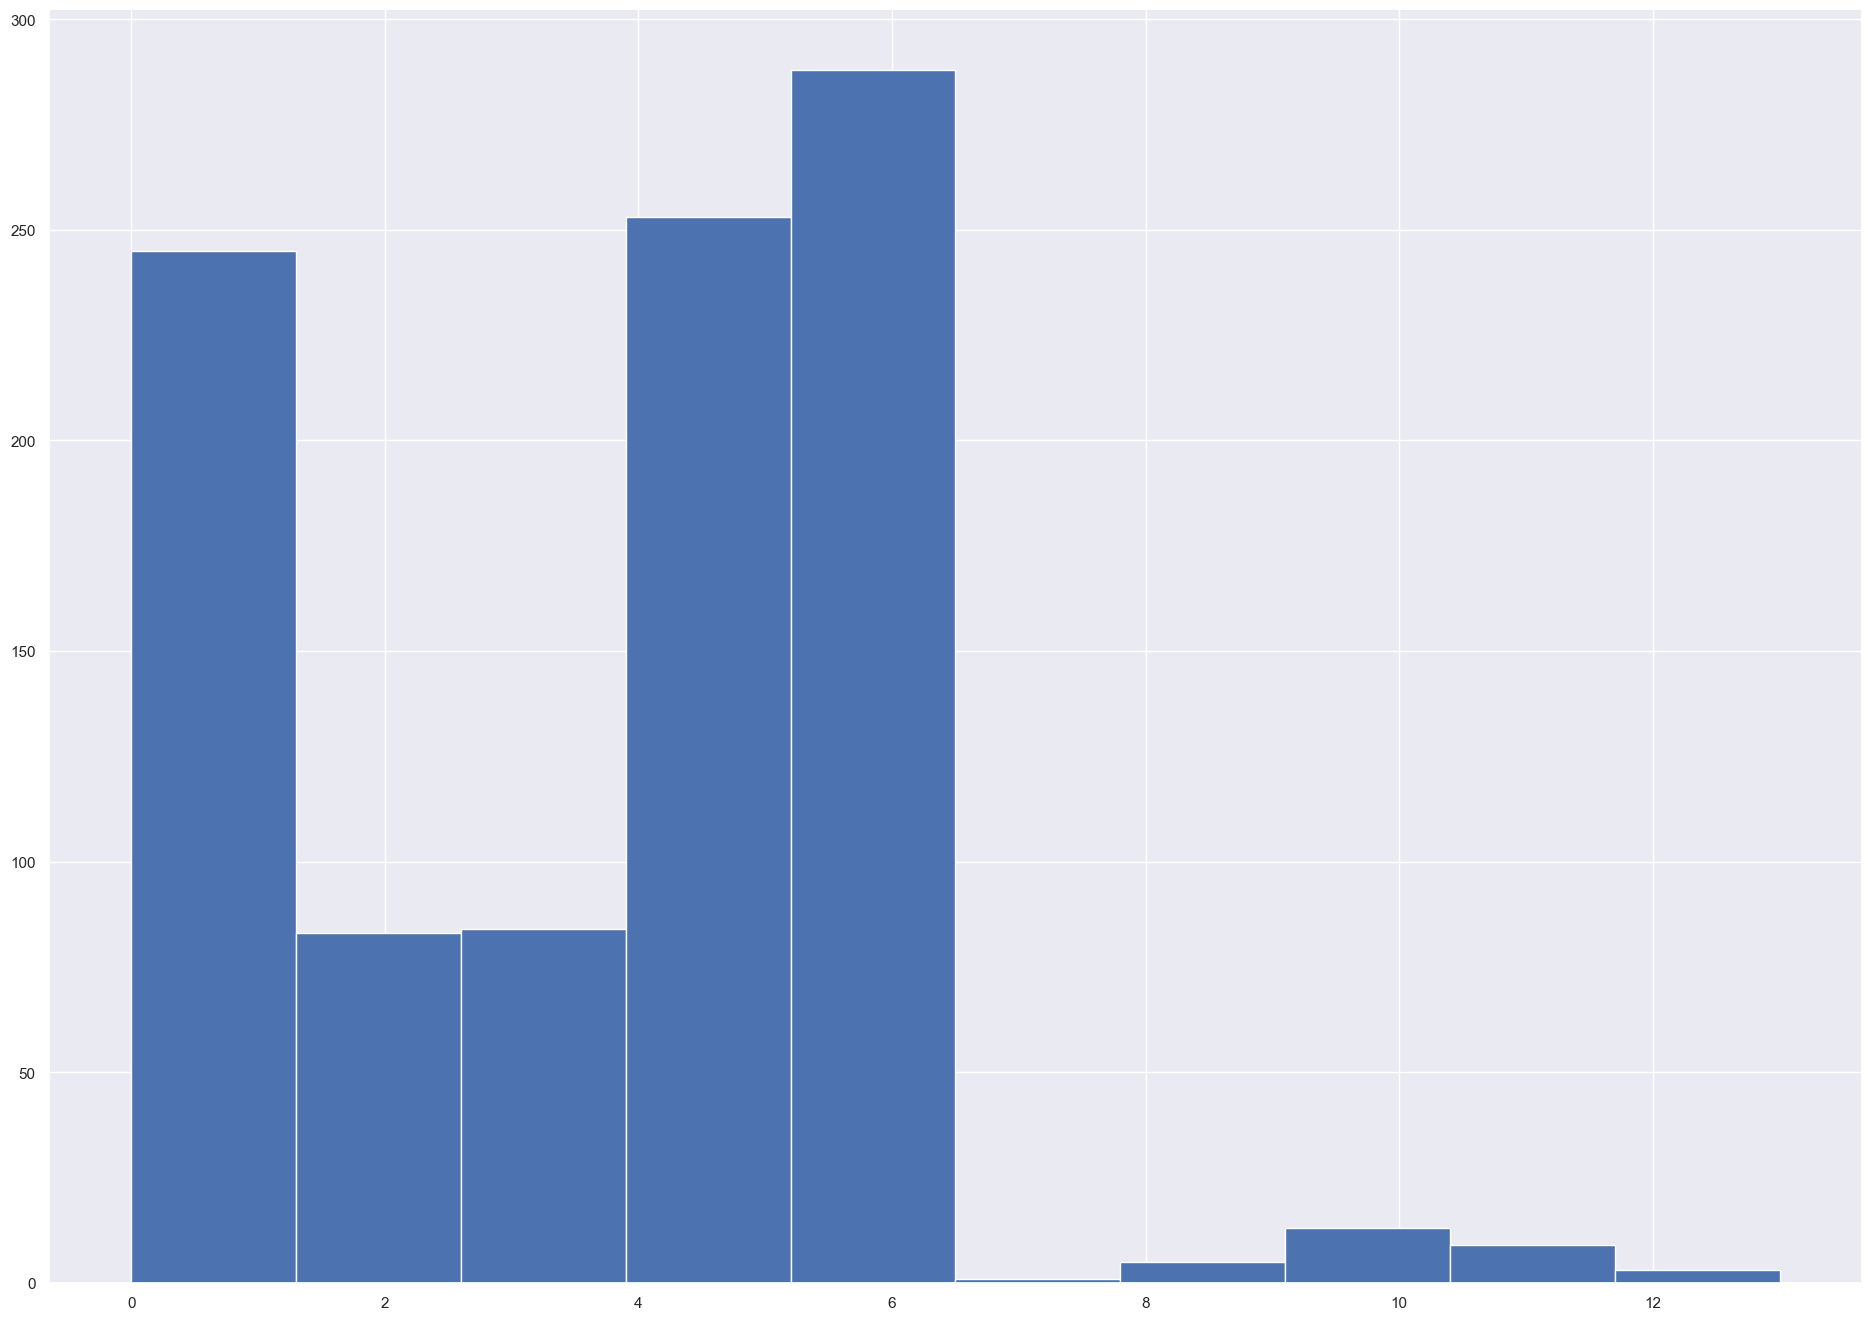

In [30]:
plt.hist(df['Genre_1'])
plt.show()

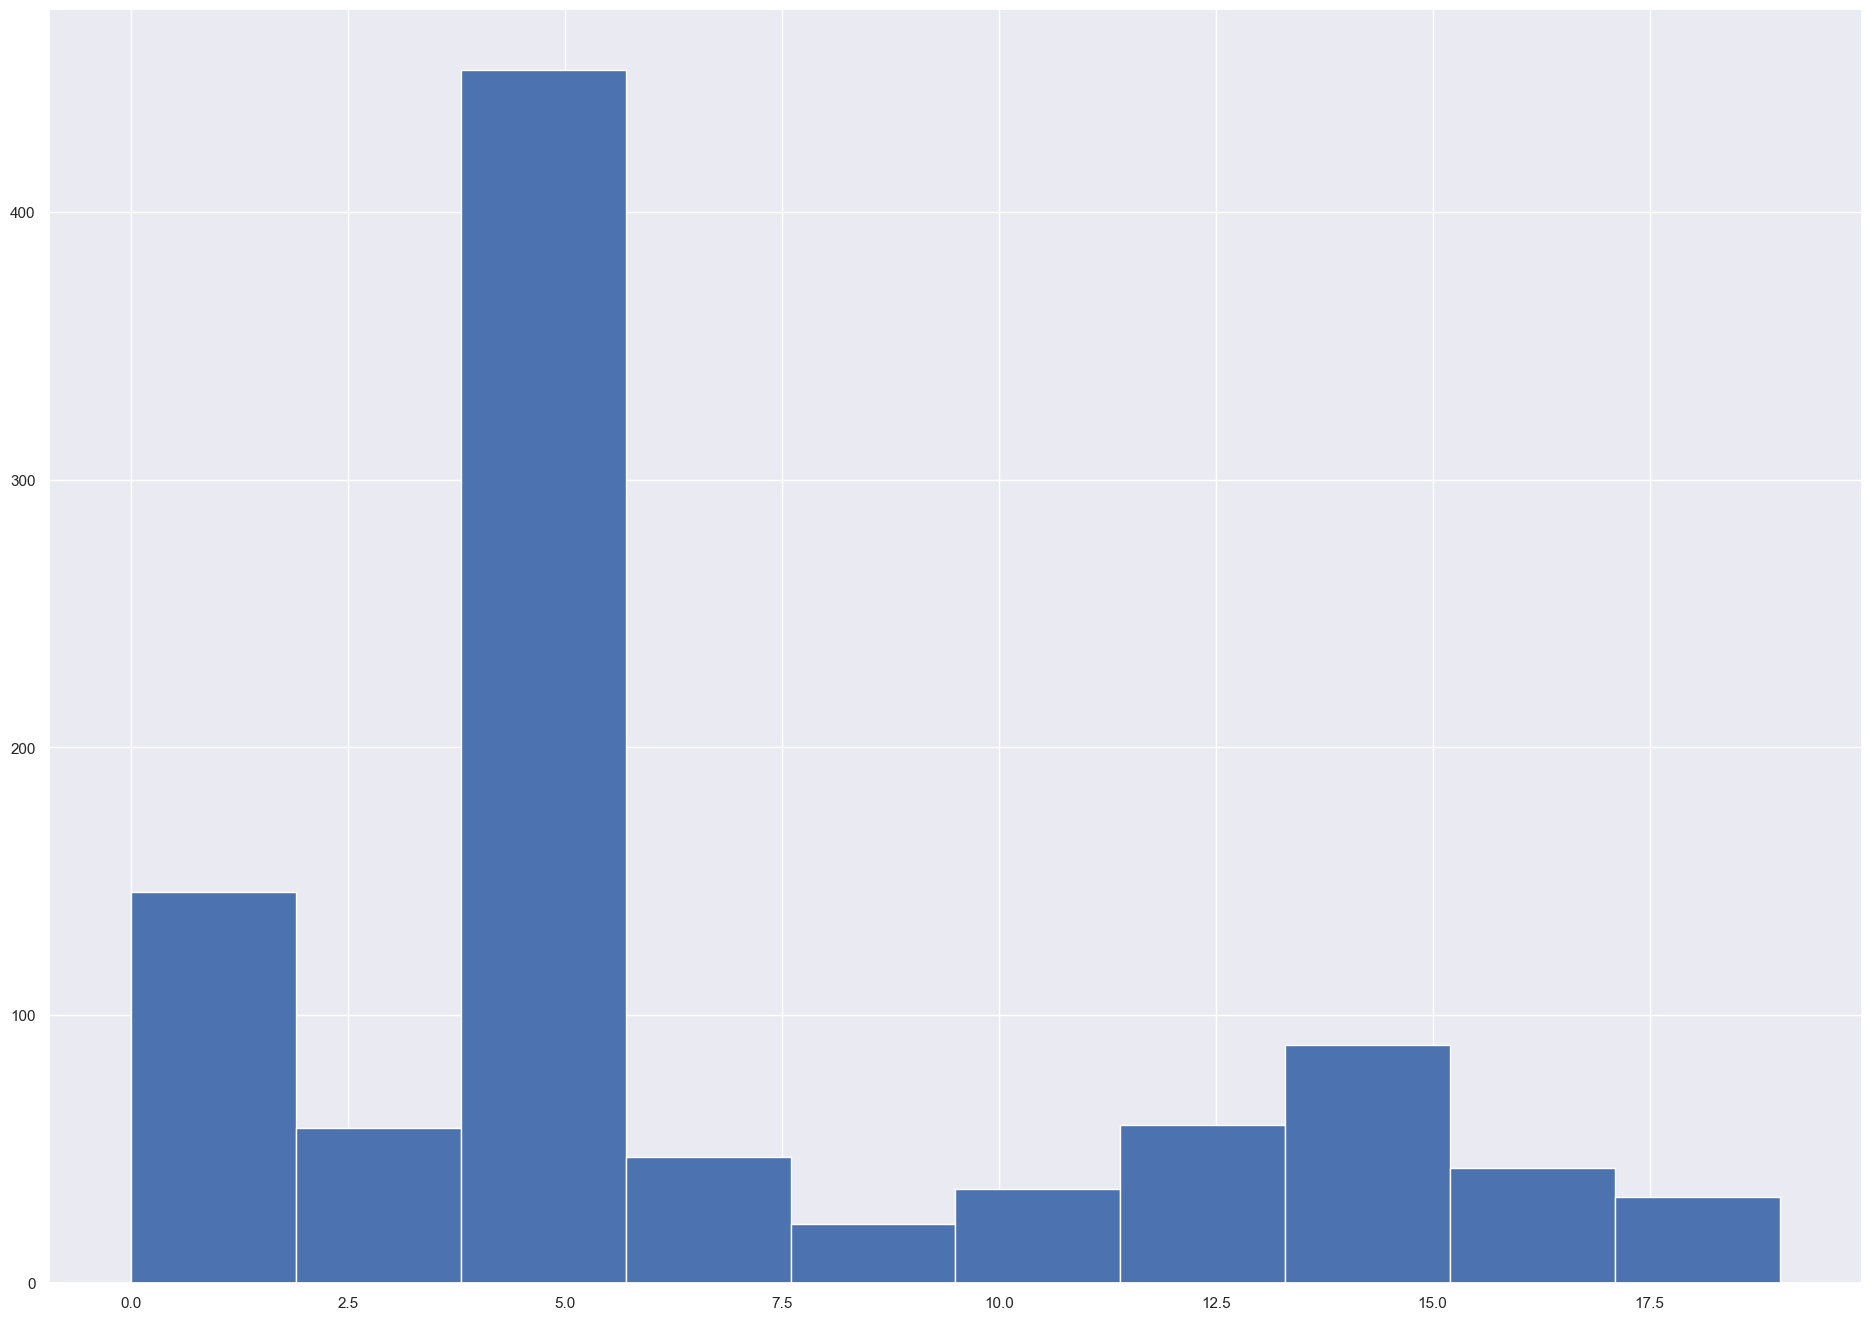

In [31]:
plt.hist(df['Genre_2'])
plt.show()

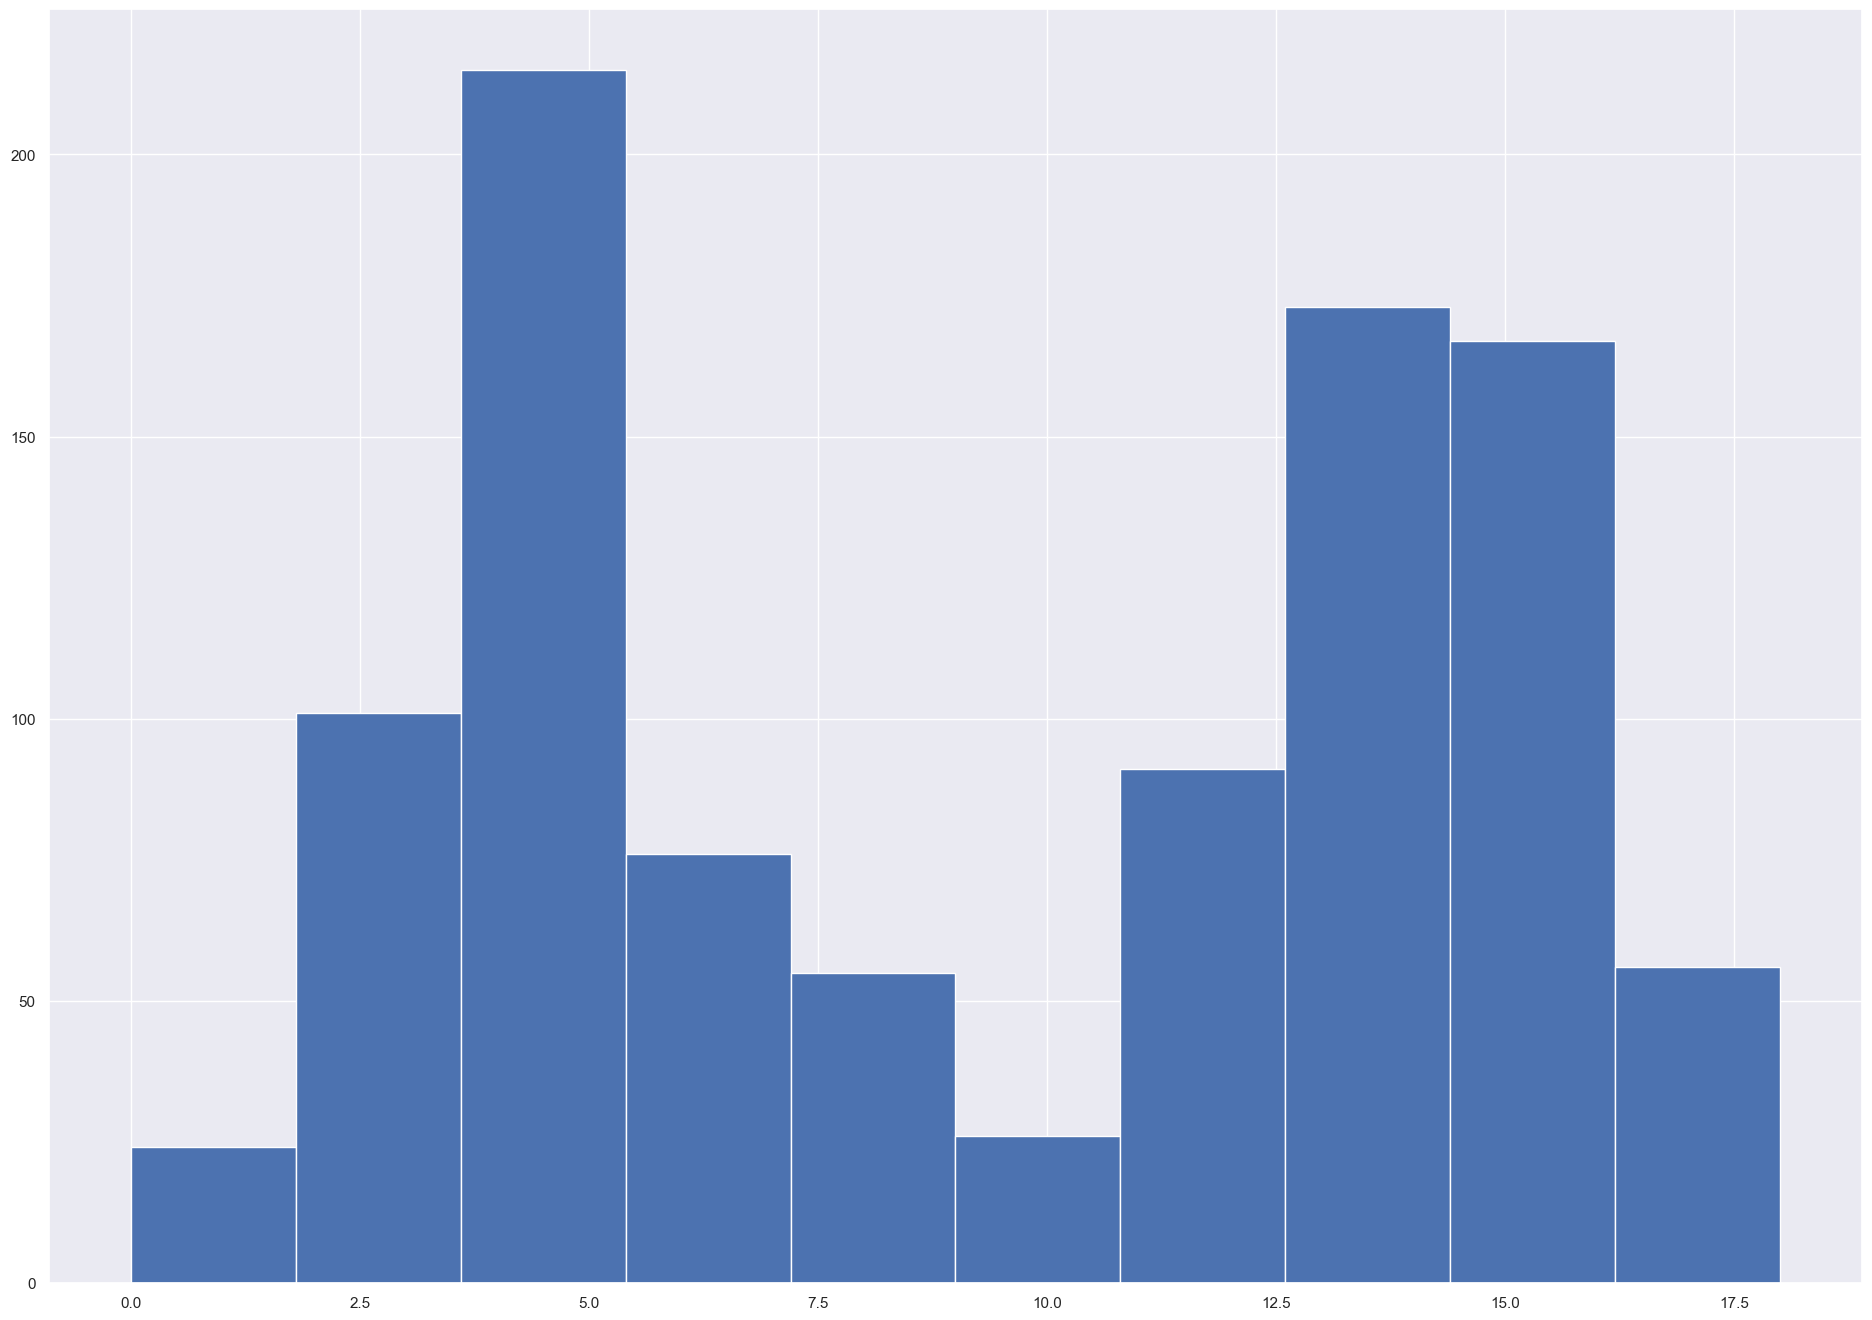

In [32]:
plt.hist(df['Genre_3'])
plt.show()

### 5. Outliers

In [33]:
df_outliers = df.copy()

#### Watch Time

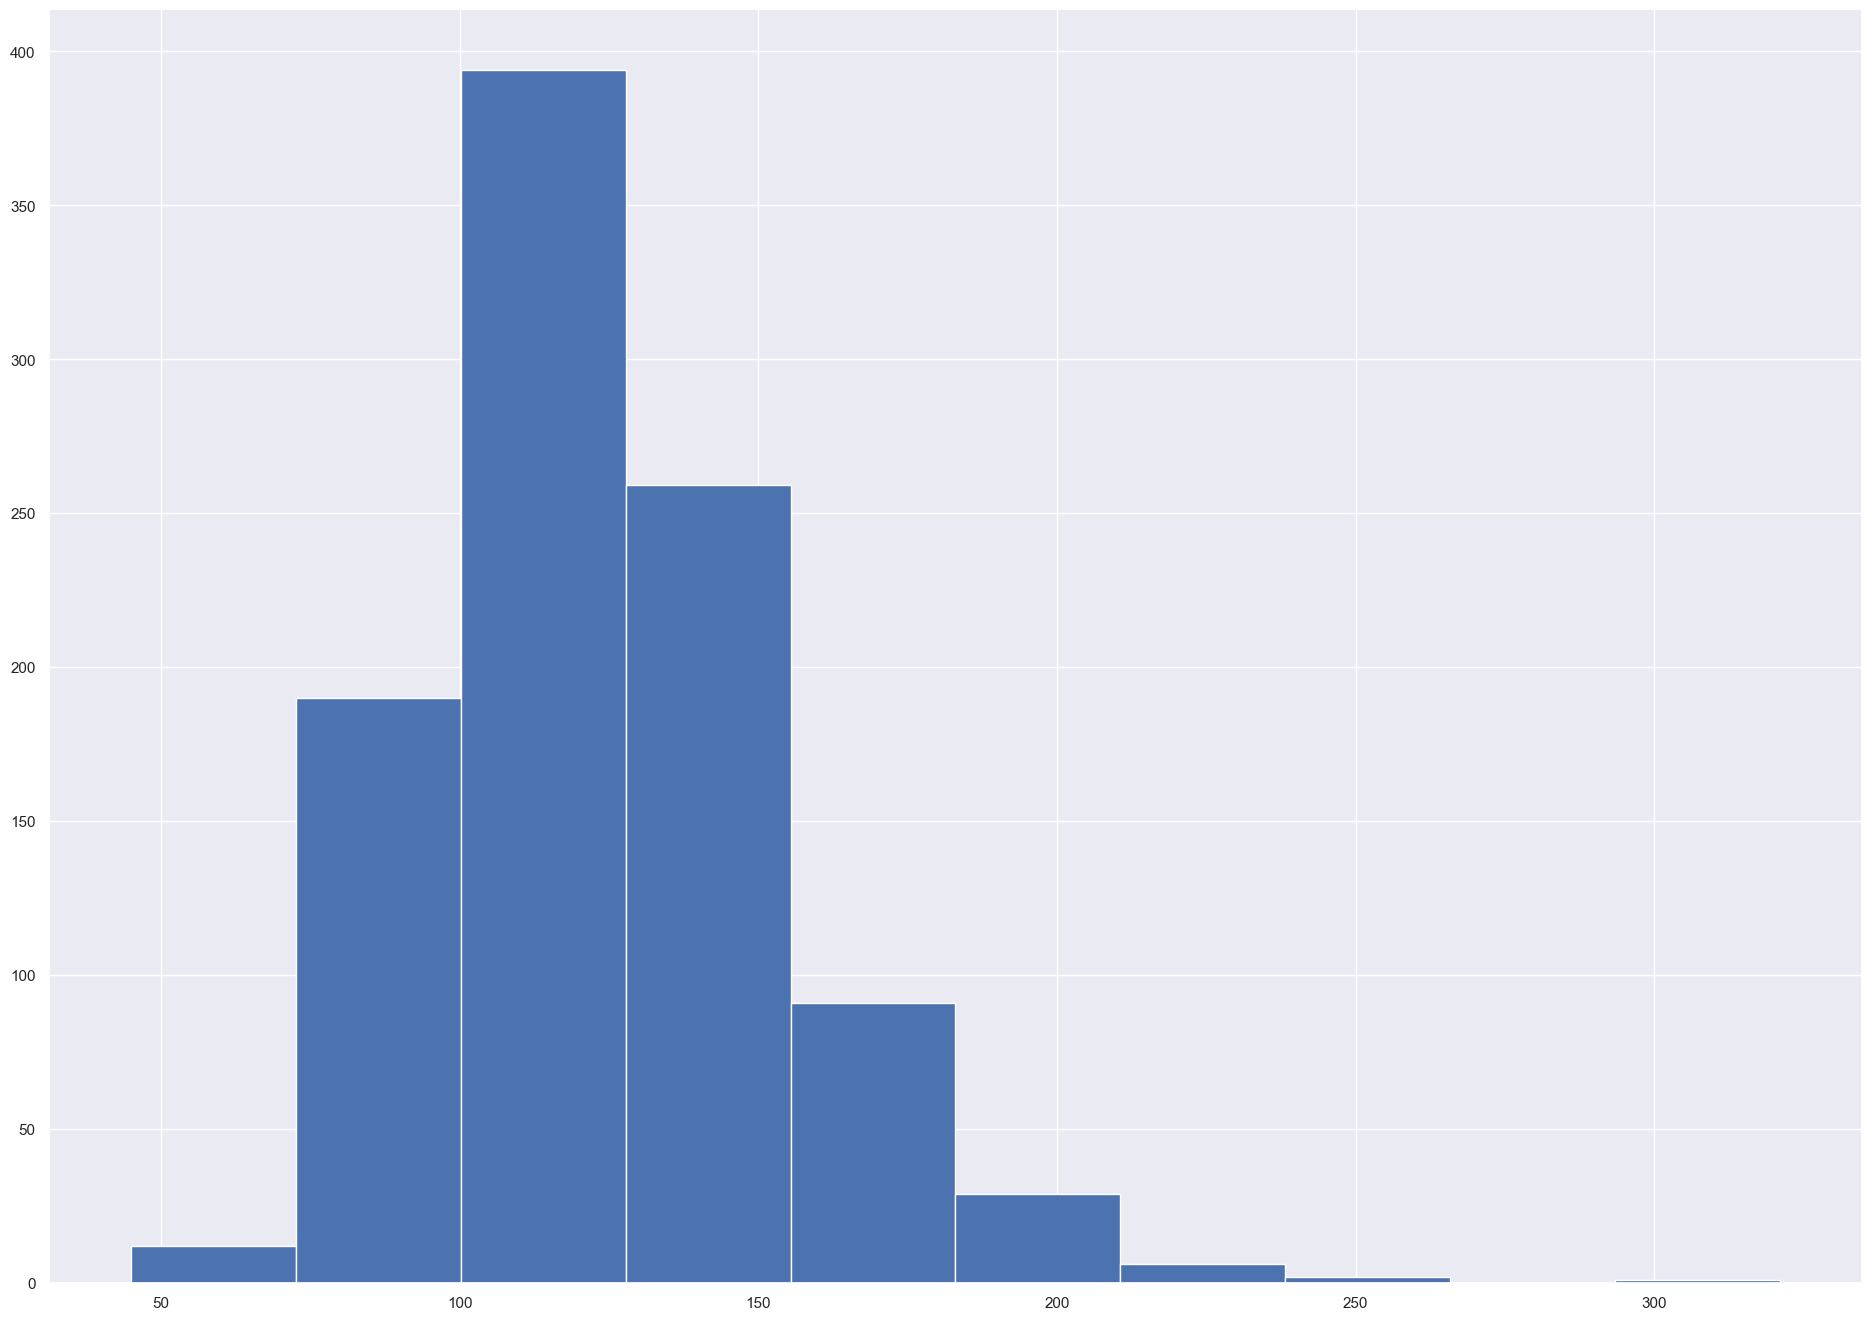

In [34]:
plt.hist(df['Watch_Time_(min)'])
plt.show()

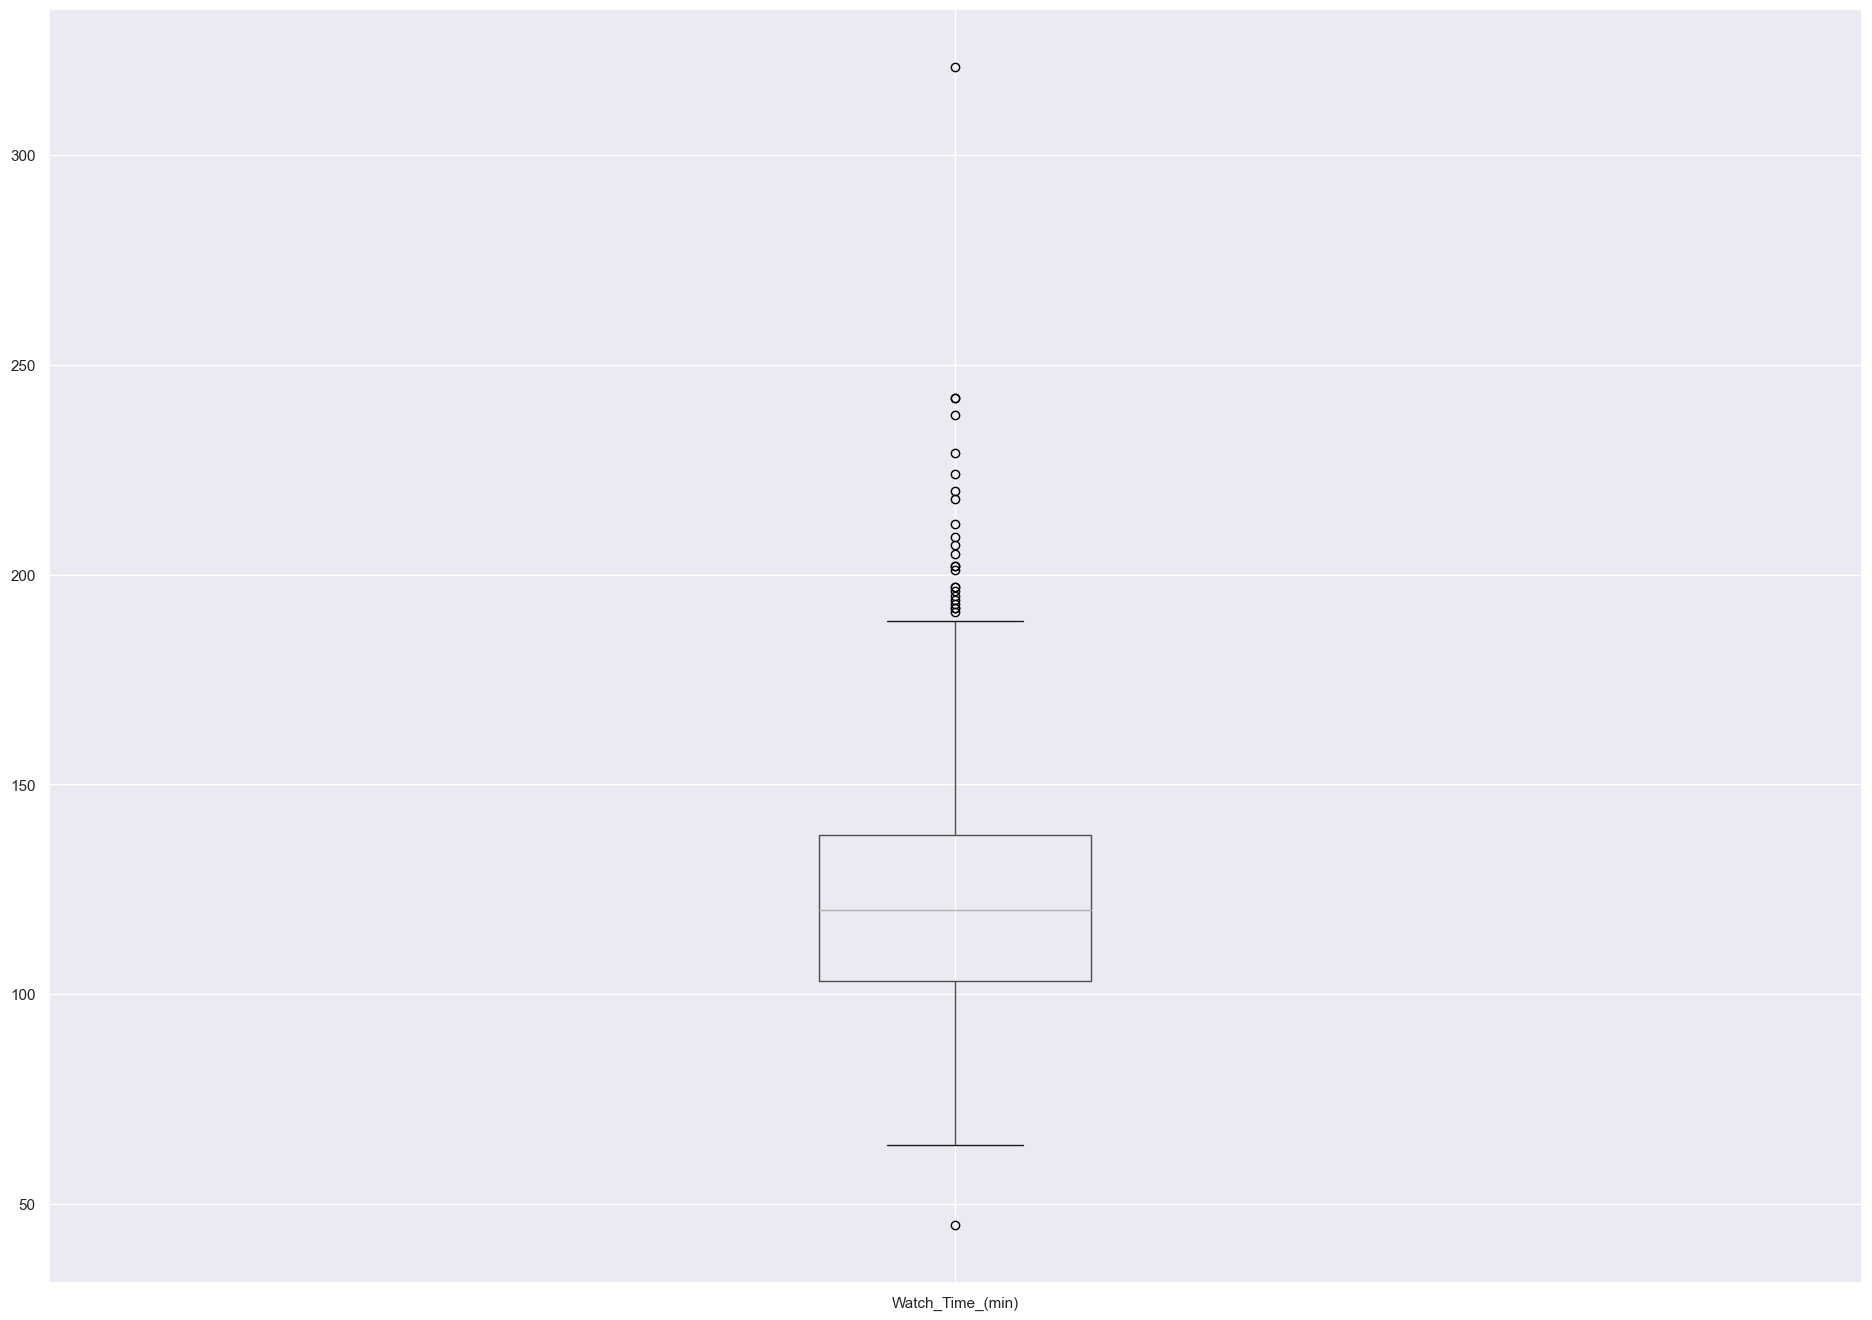

In [35]:
figure=df.boxplot(column="Watch_Time_(min)")

In [36]:
uppper_boundary=df_outliers['Watch_Time_(min)'].mean() + 3* df_outliers['Watch_Time_(min)'].std()
lower_boundary=df_outliers['Watch_Time_(min)'].mean() - 3* df_outliers['Watch_Time_(min)'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Watch_Time_(min)']>=uppper_boundary, 'Watch_Time_(min)']=uppper_boundary
df_outliers.loc[df_outliers['Watch_Time_(min)']<=lower_boundary, 'Watch_Time_(min)']=lower_boundary

37.89089597410302
210.04609589581568


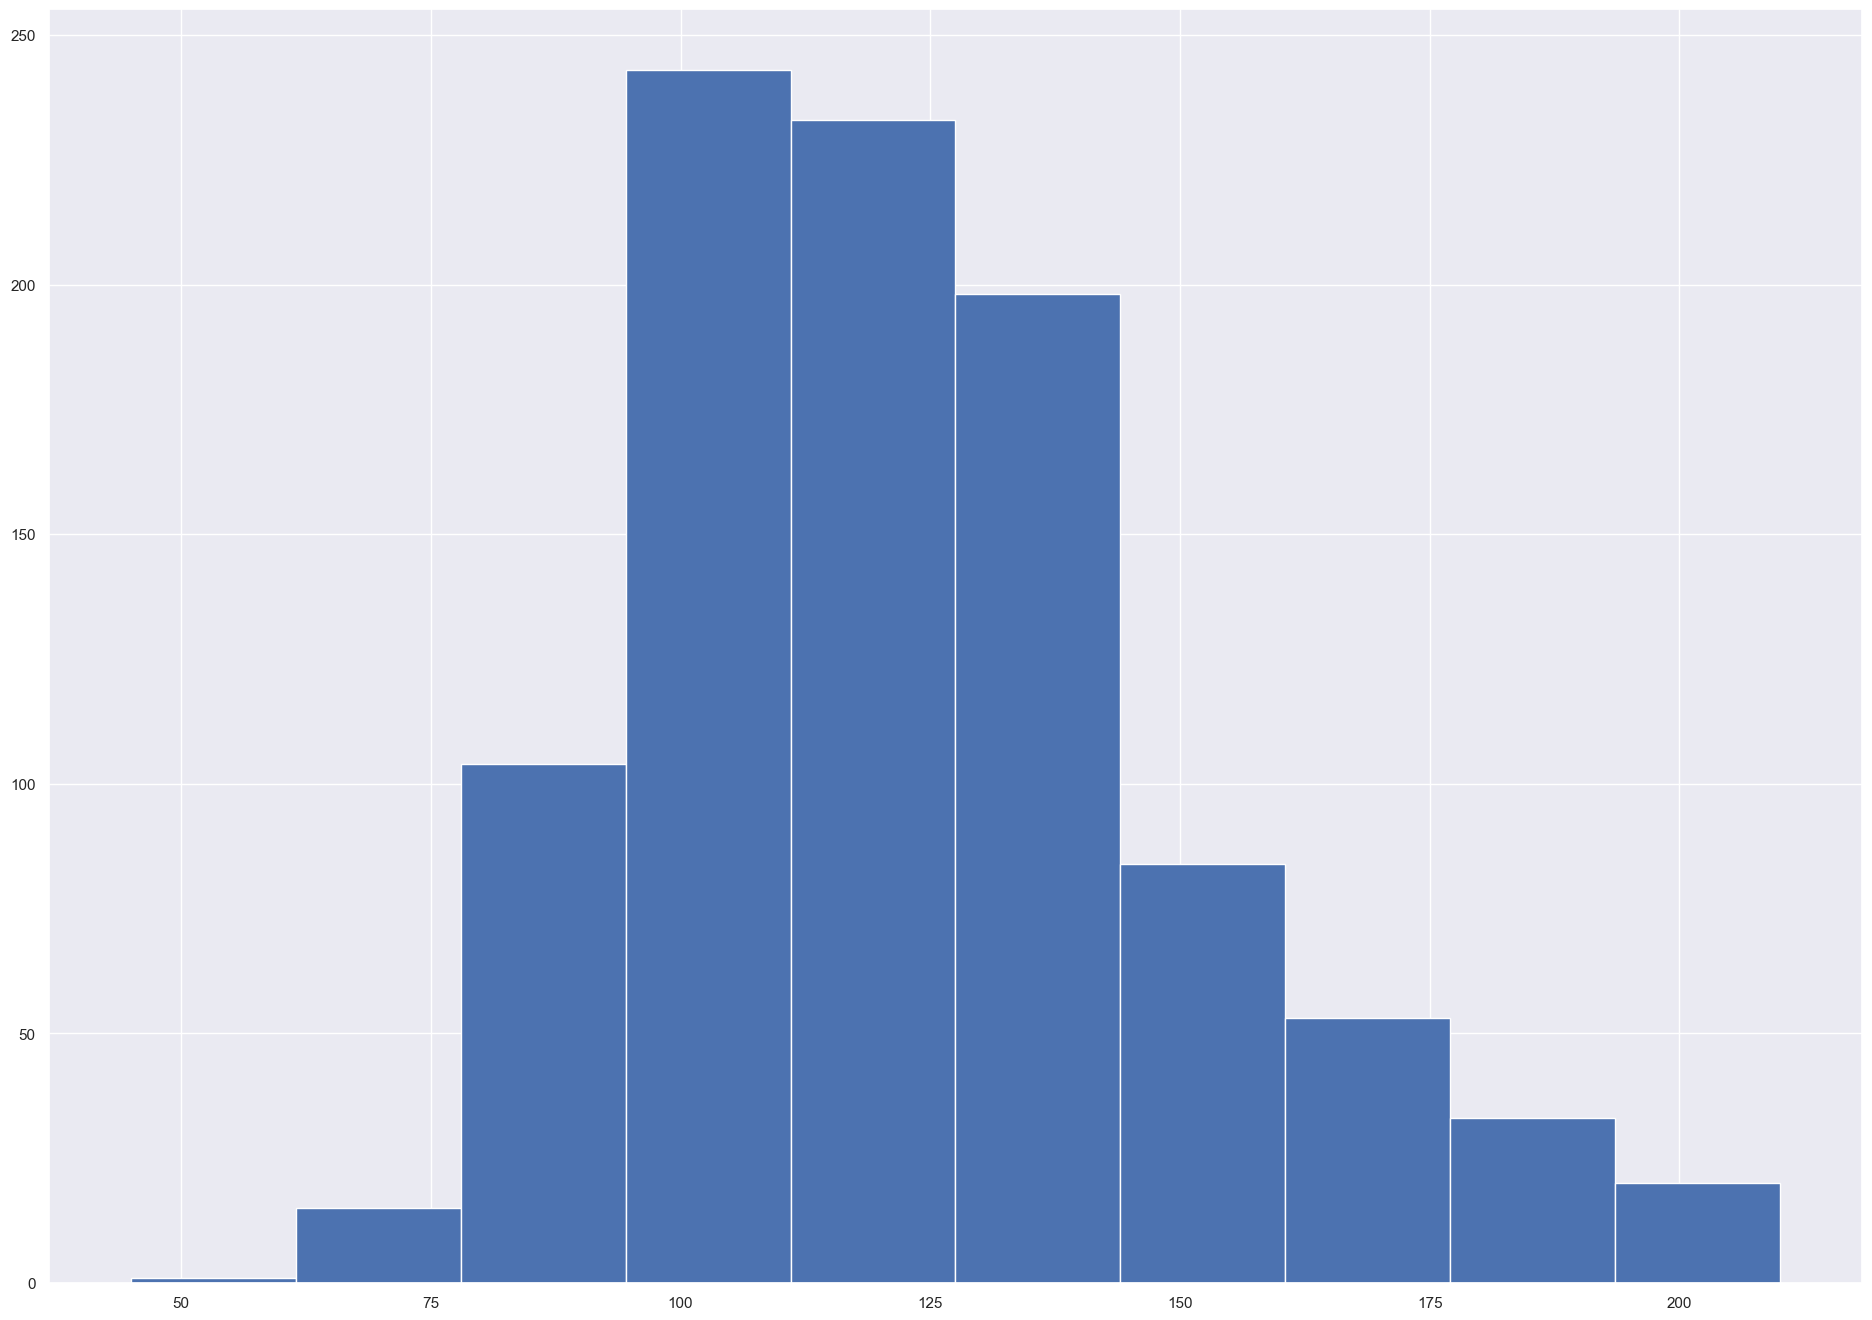

In [37]:
plt.hist(df_outliers['Watch_Time_(min)'])
plt.show()

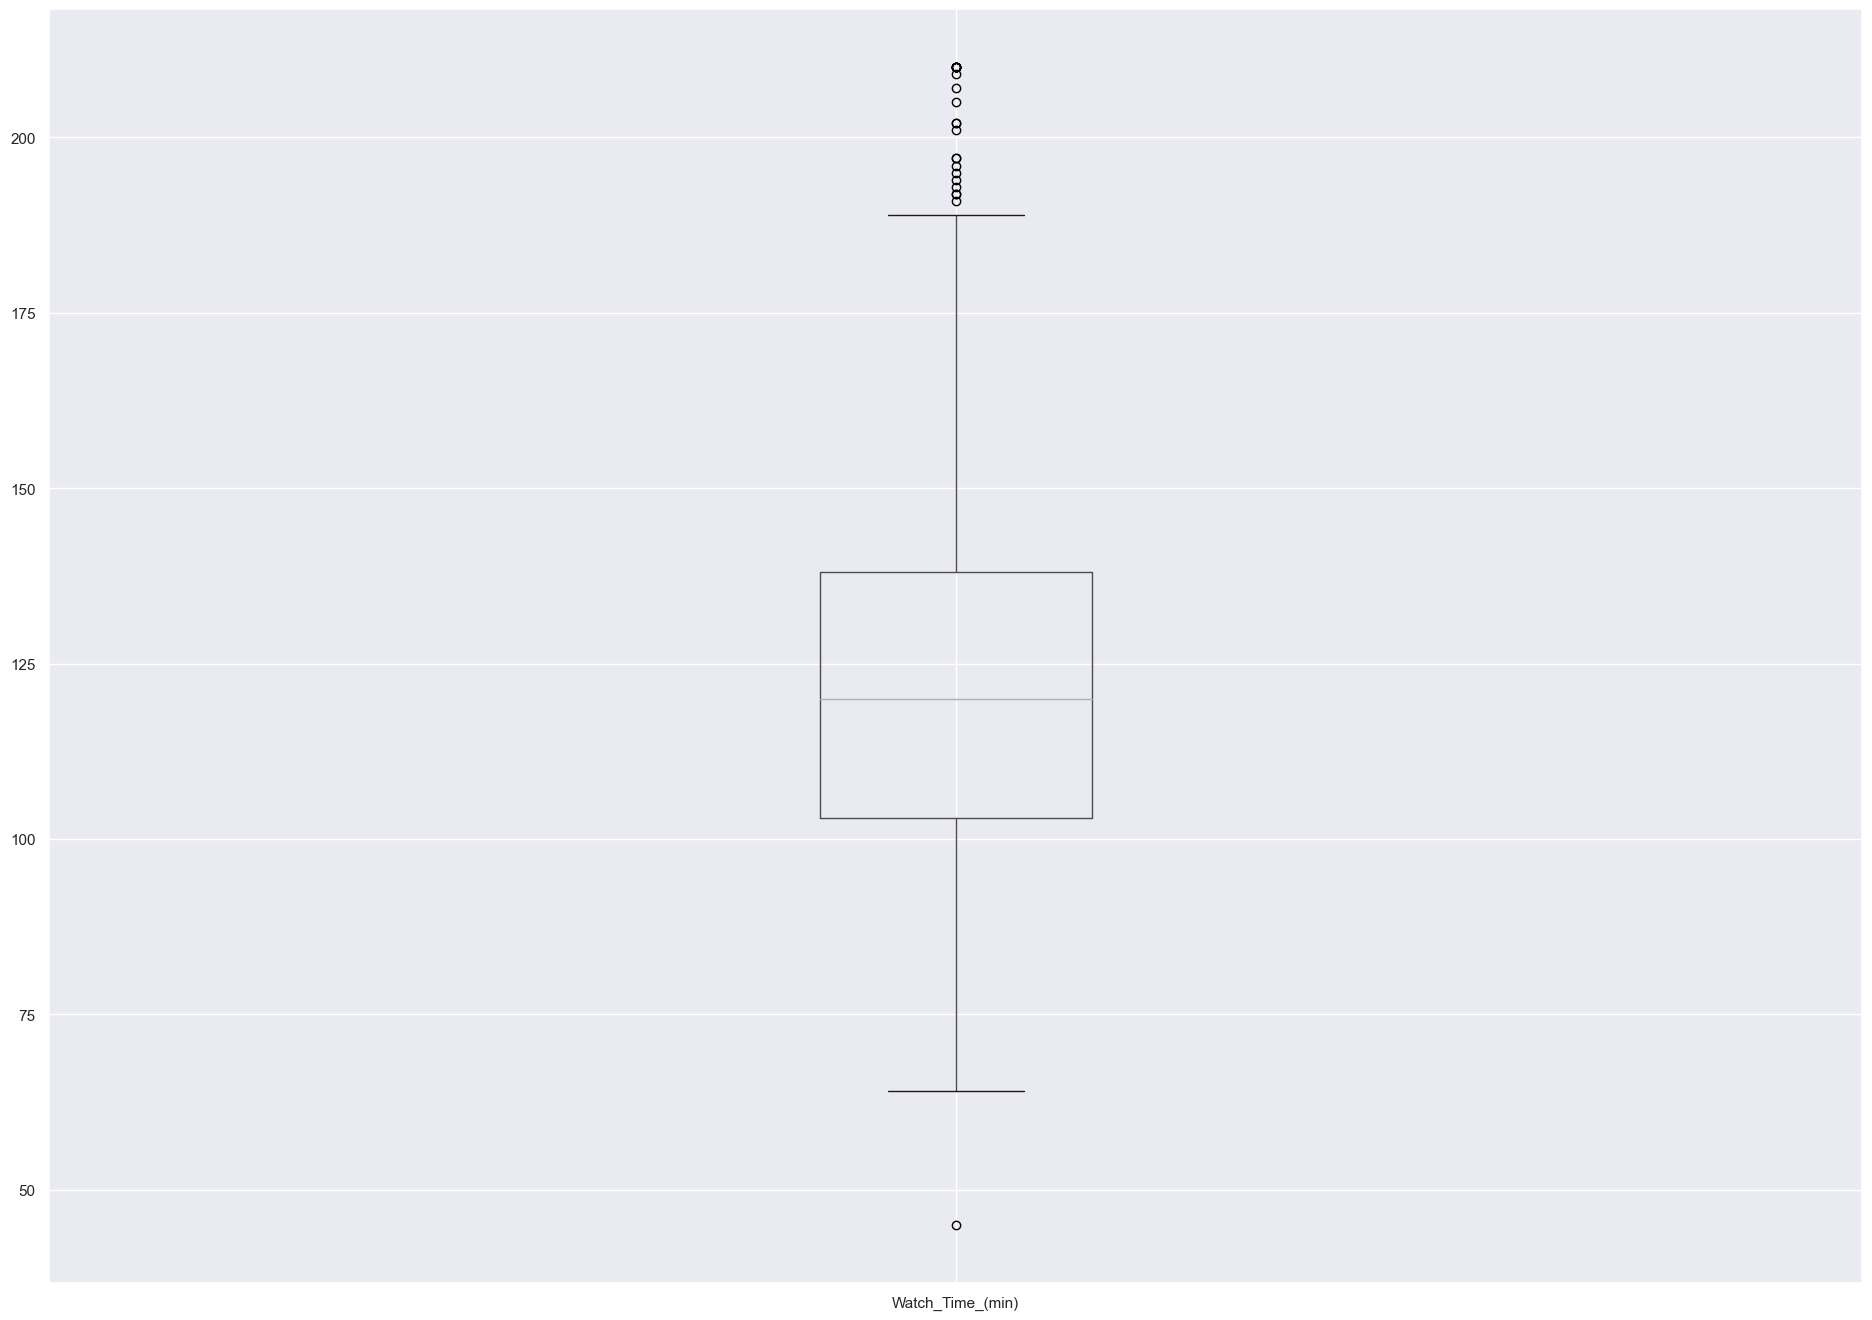

In [38]:
figure=df_outliers.boxplot(column="Watch_Time_(min)")

#### Votes

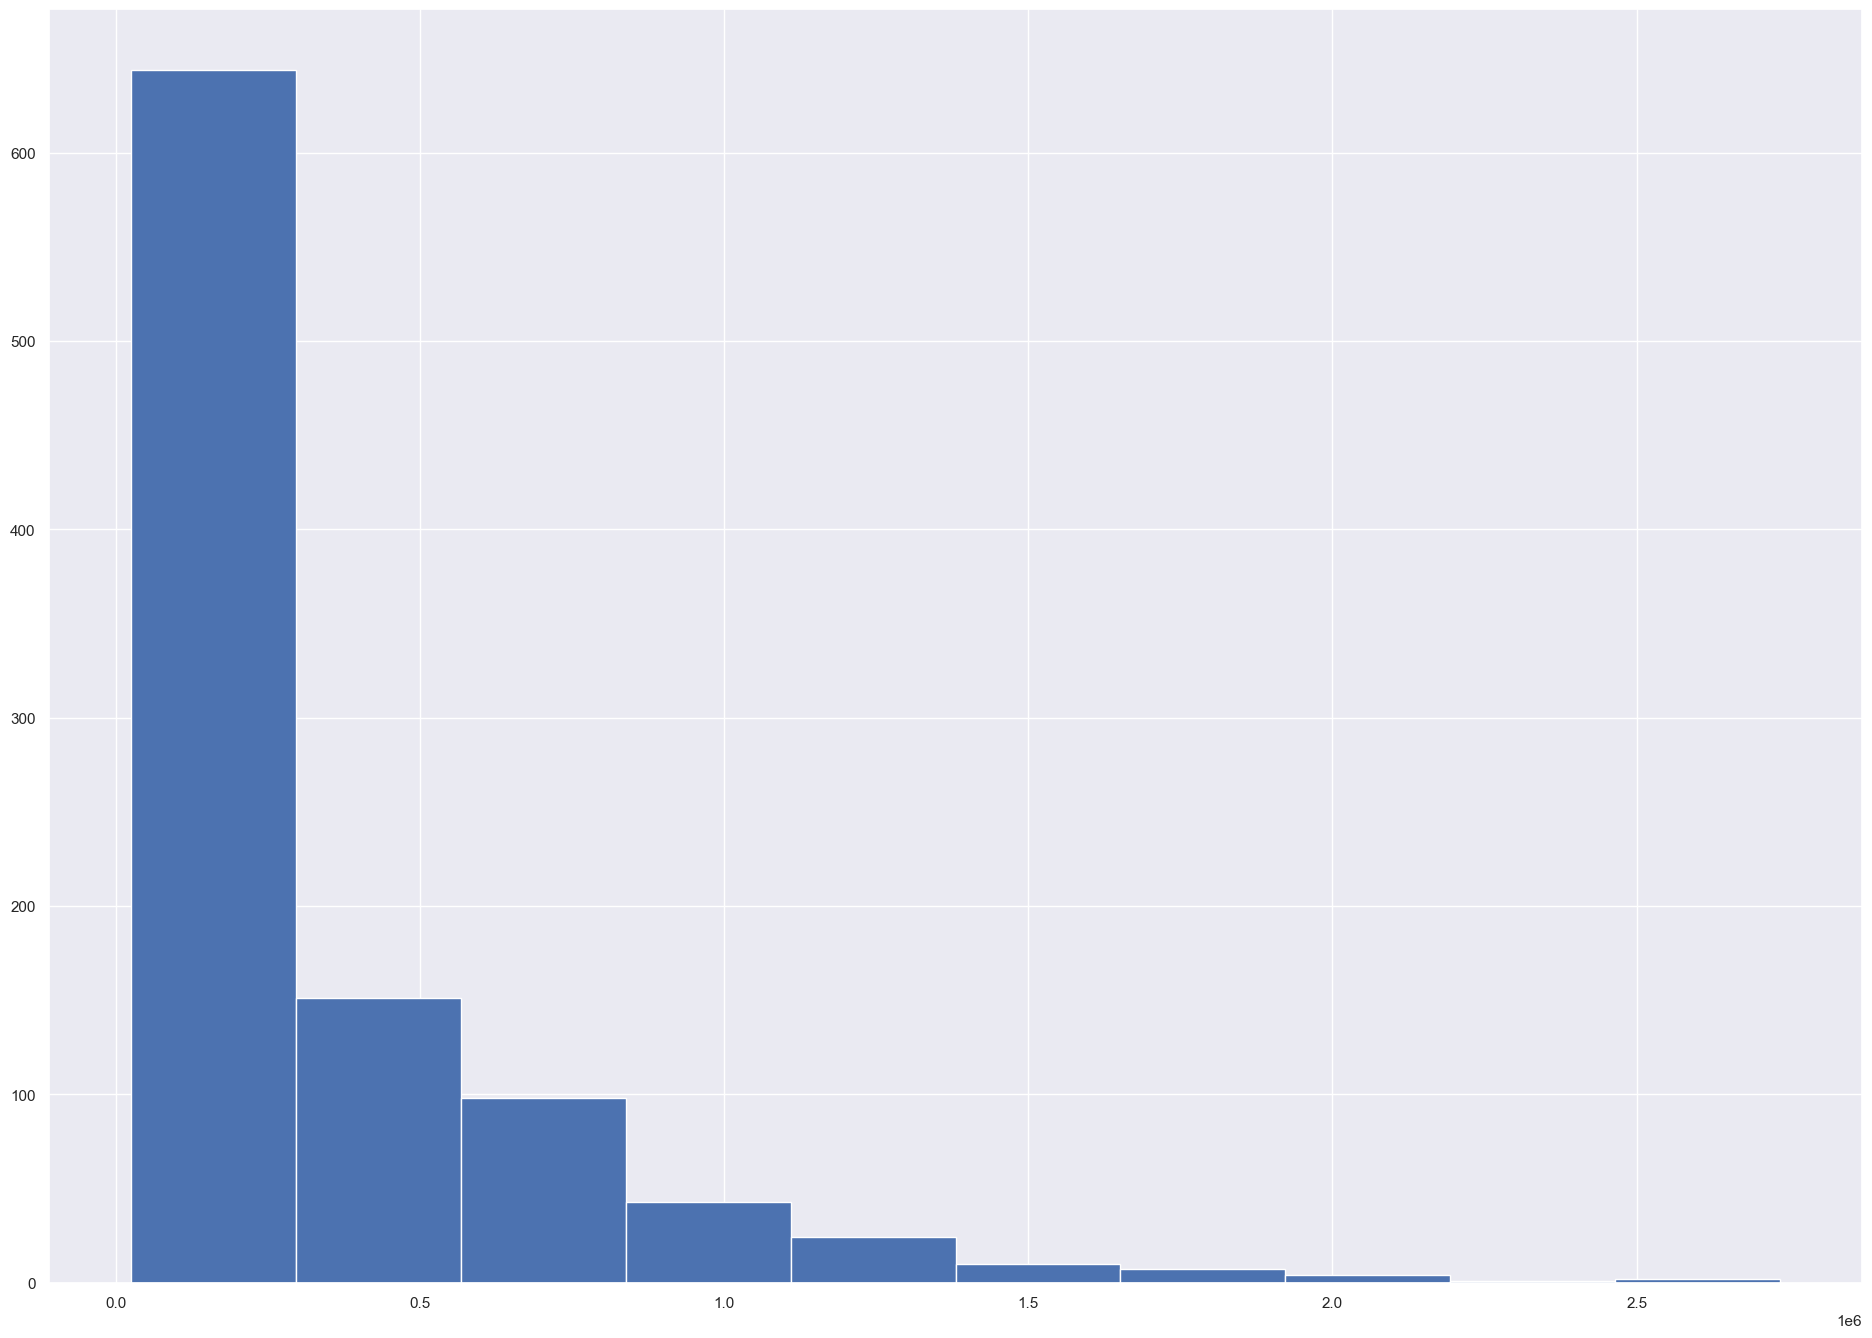

In [39]:
plt.hist(df['Votes'])
plt.show()

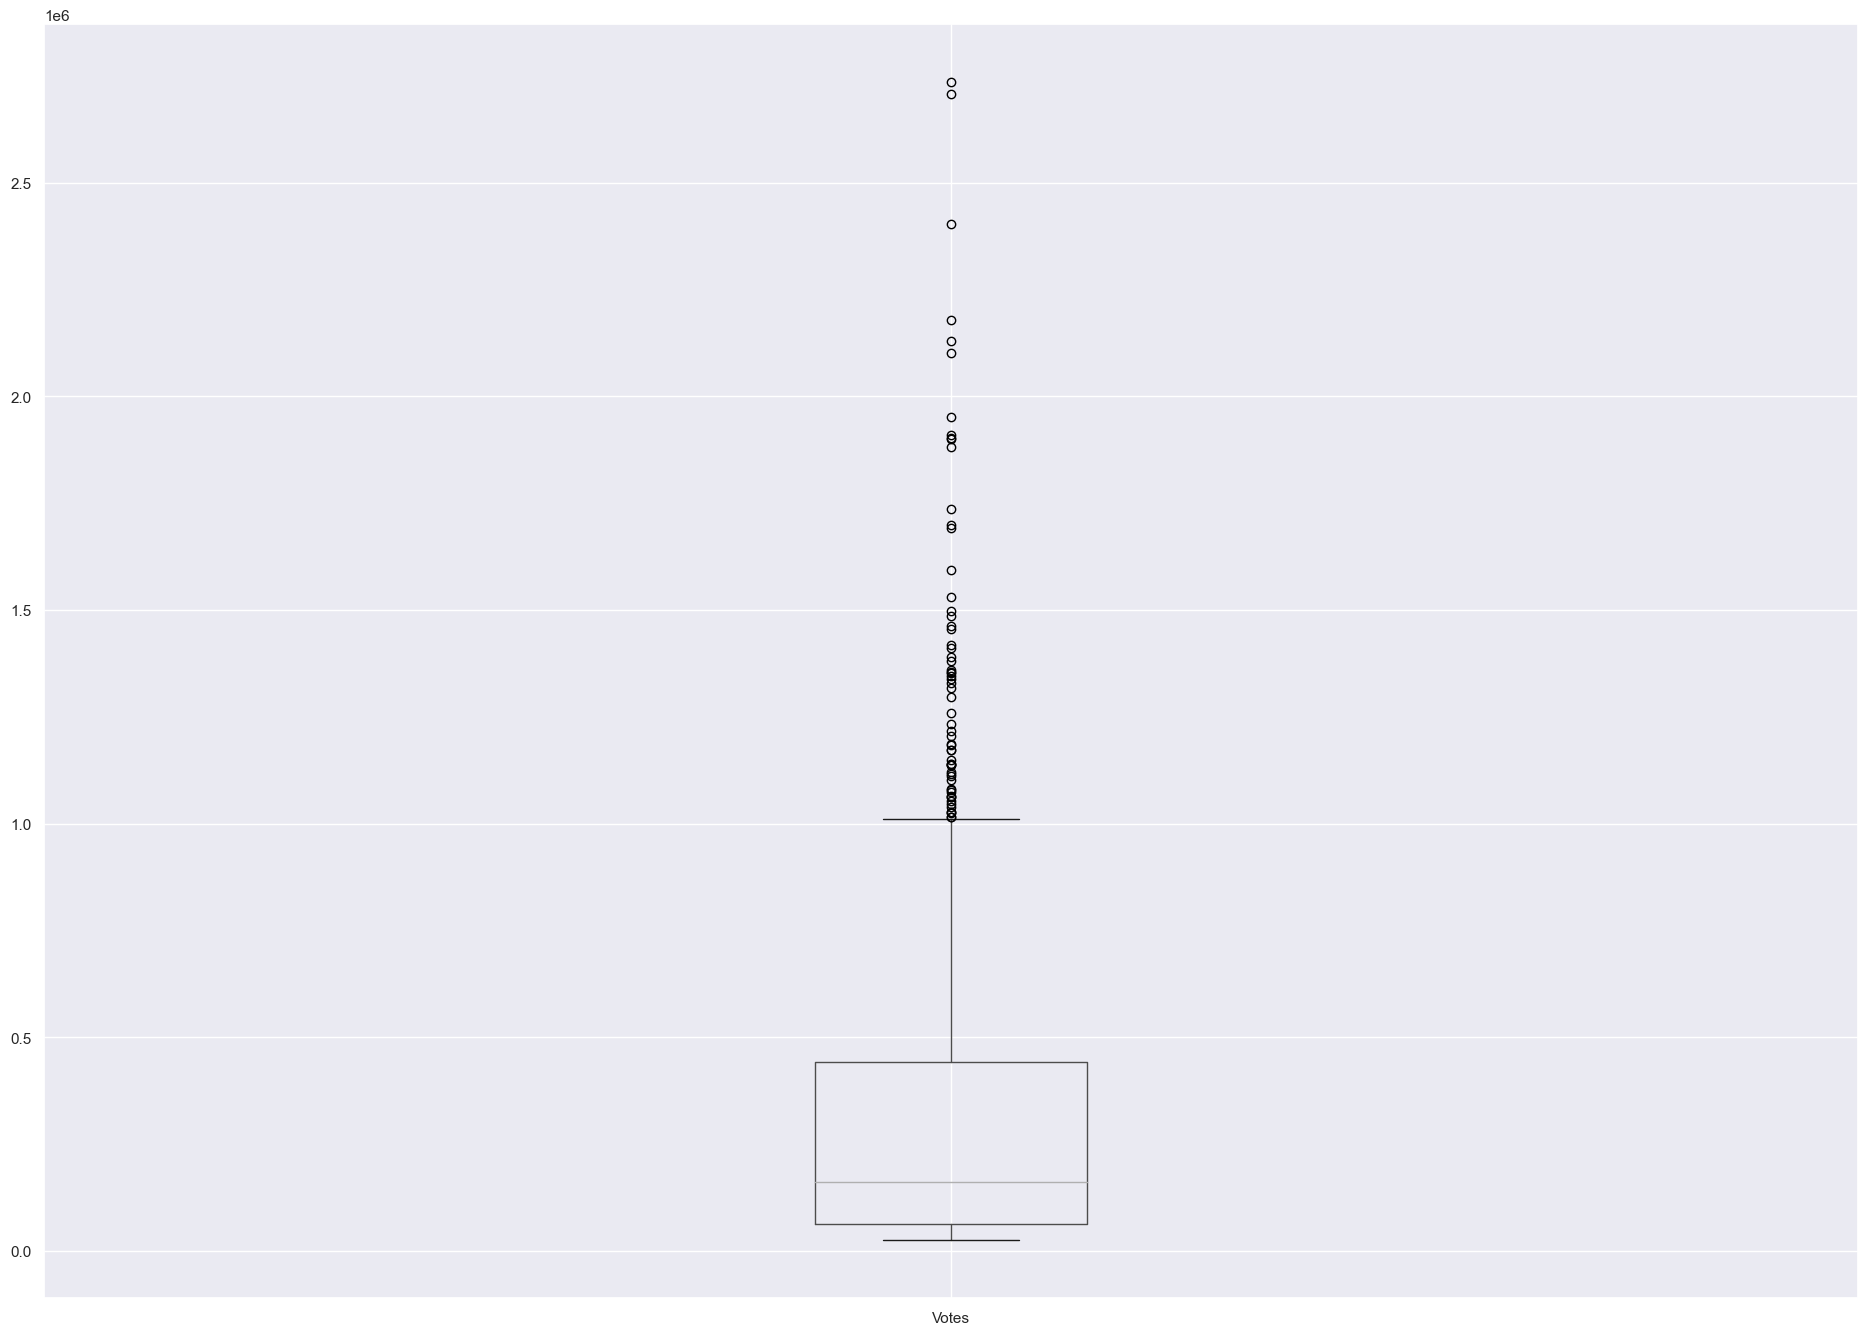

In [40]:
figure=df.boxplot(column="Votes")

In [41]:
IQR=df_outliers.Votes.quantile(0.75)-df_outliers.Votes.quantile(0.25)
lower_bridge=df_outliers['Votes'].quantile(0.25)-(IQR*3)
upper_bridge=df_outliers['Votes'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

df_outliers.loc[df_outliers['Votes']>=upper_bridge,'Votes']=upper_bridge
df_outliers.loc[df_outliers['Votes']<=lower_bridge,'Votes']=lower_bridge

-1075309.25
1580713.0


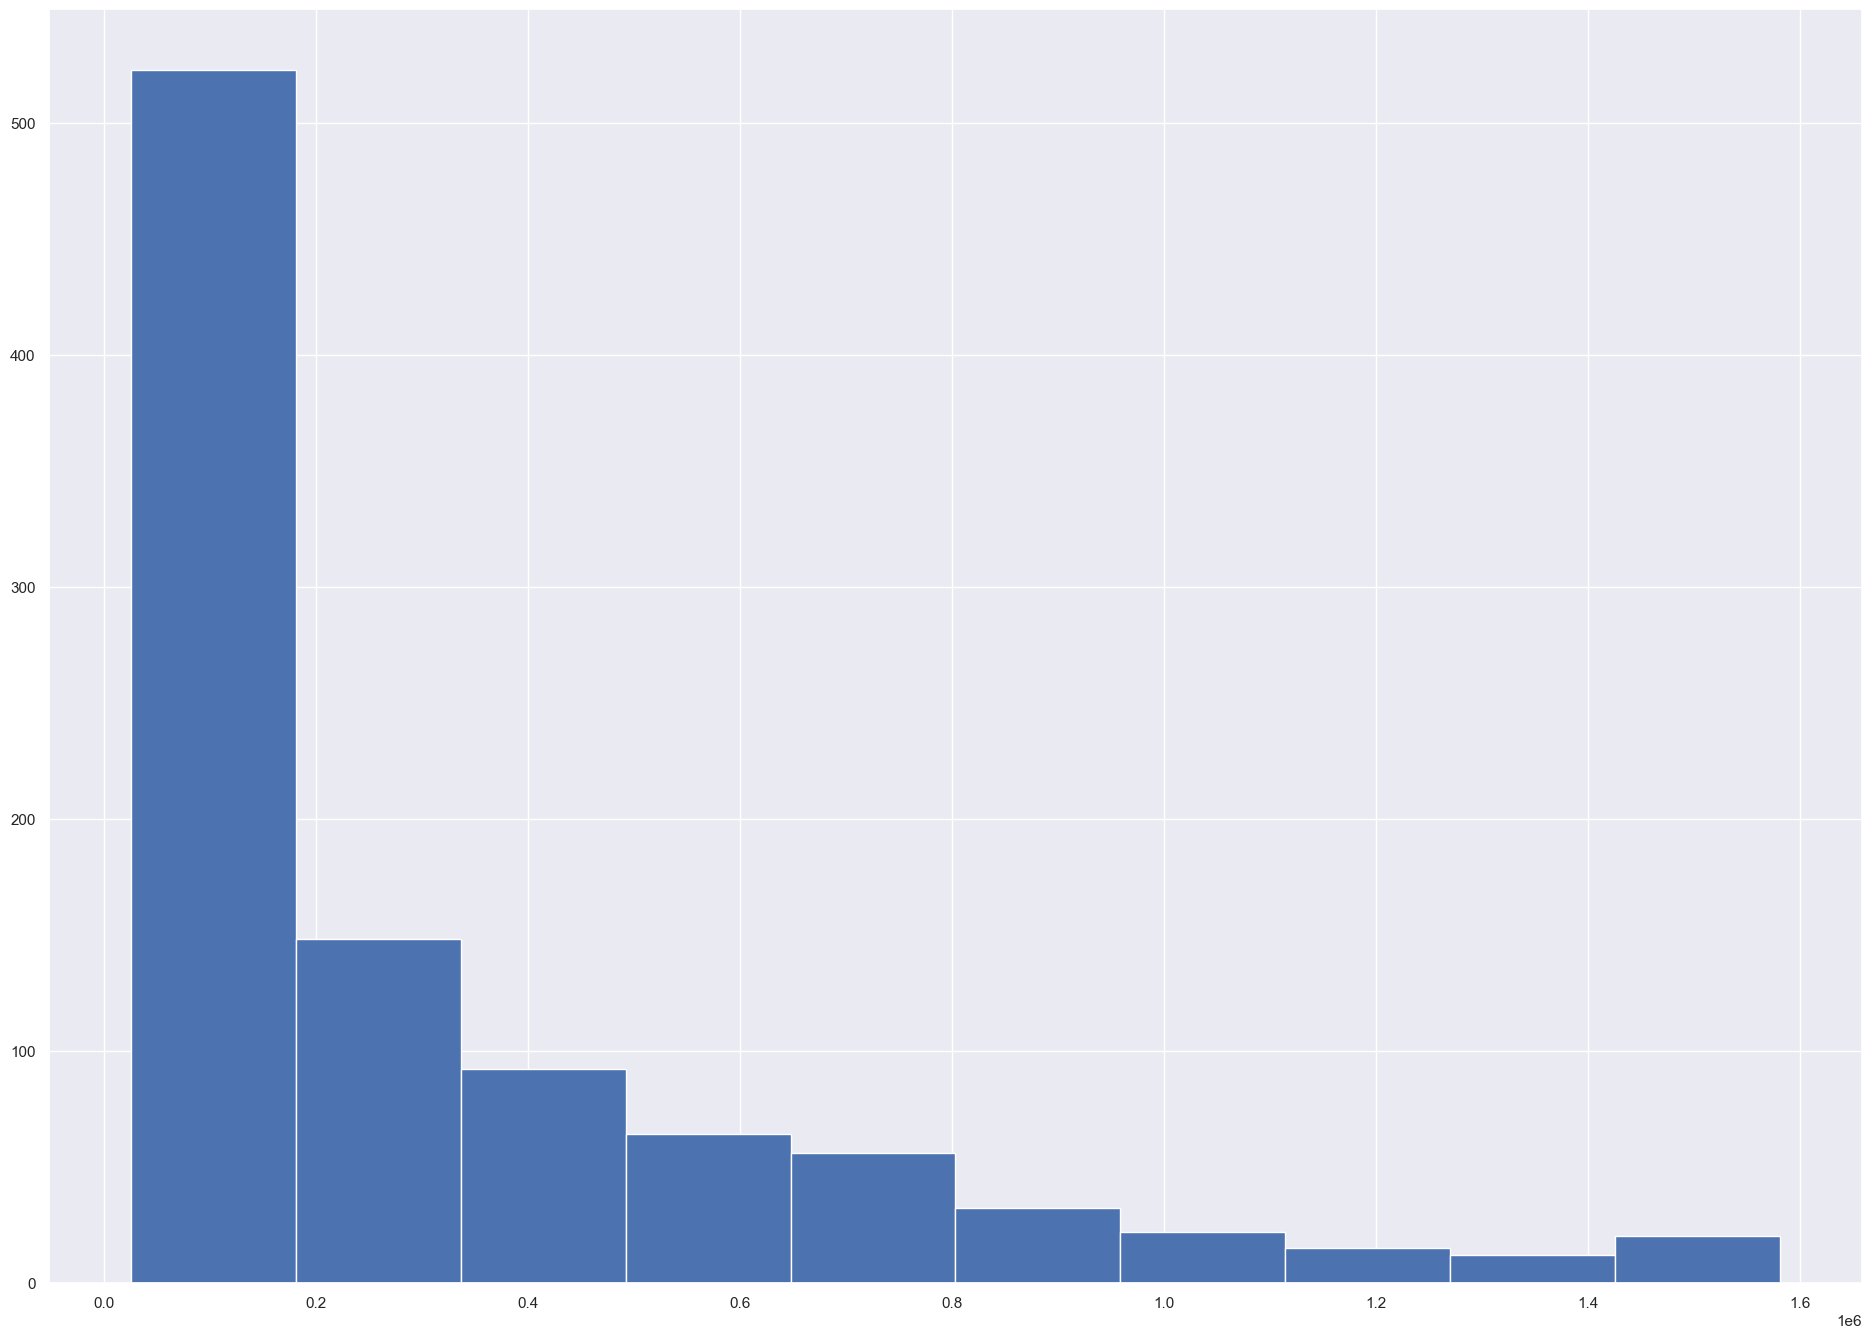

In [42]:
plt.hist(df_outliers['Votes'])
plt.show()

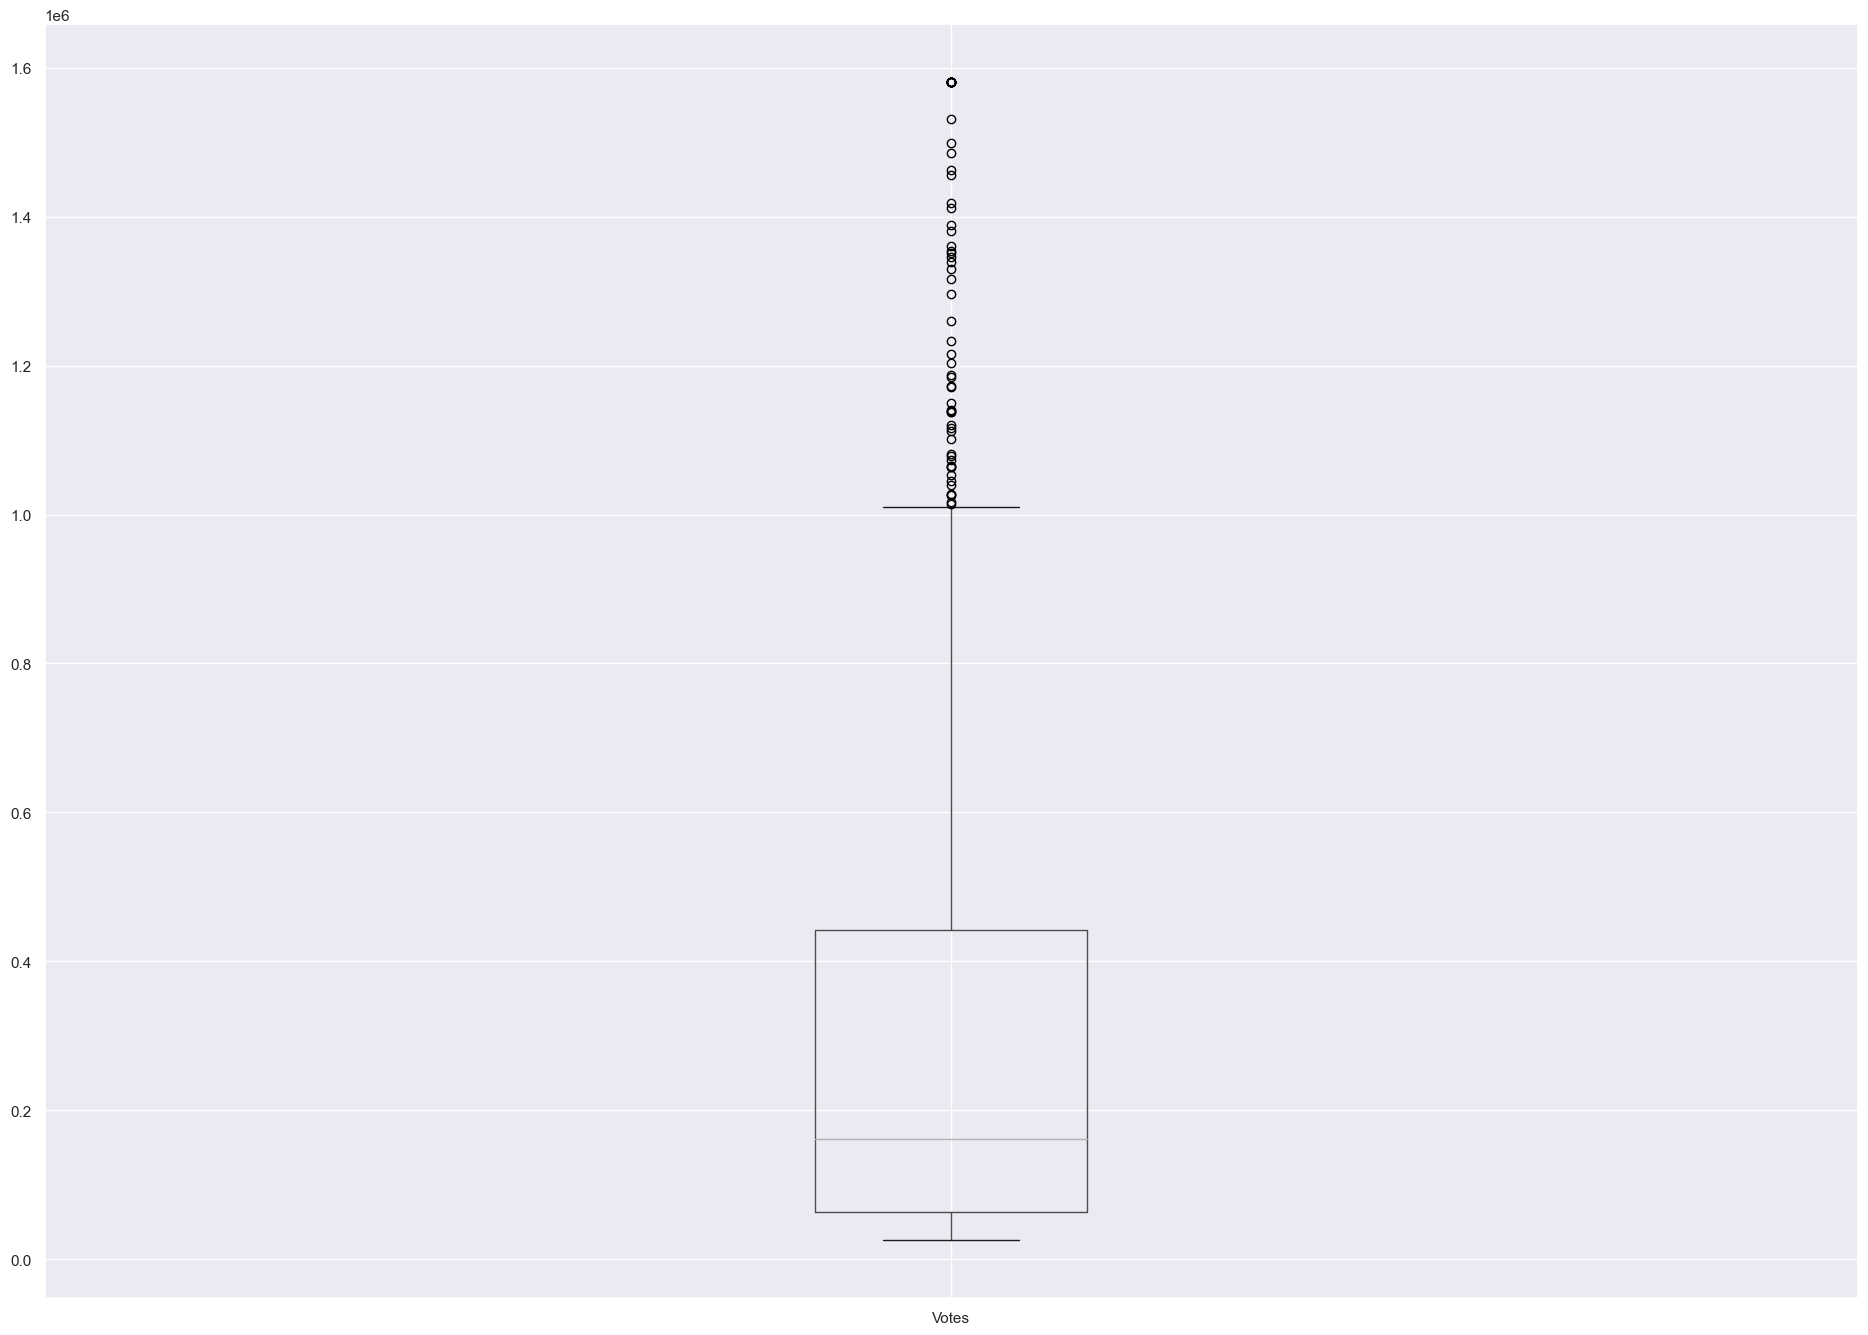

In [43]:
figure=df_outliers.boxplot(column="Votes")

#### Gross

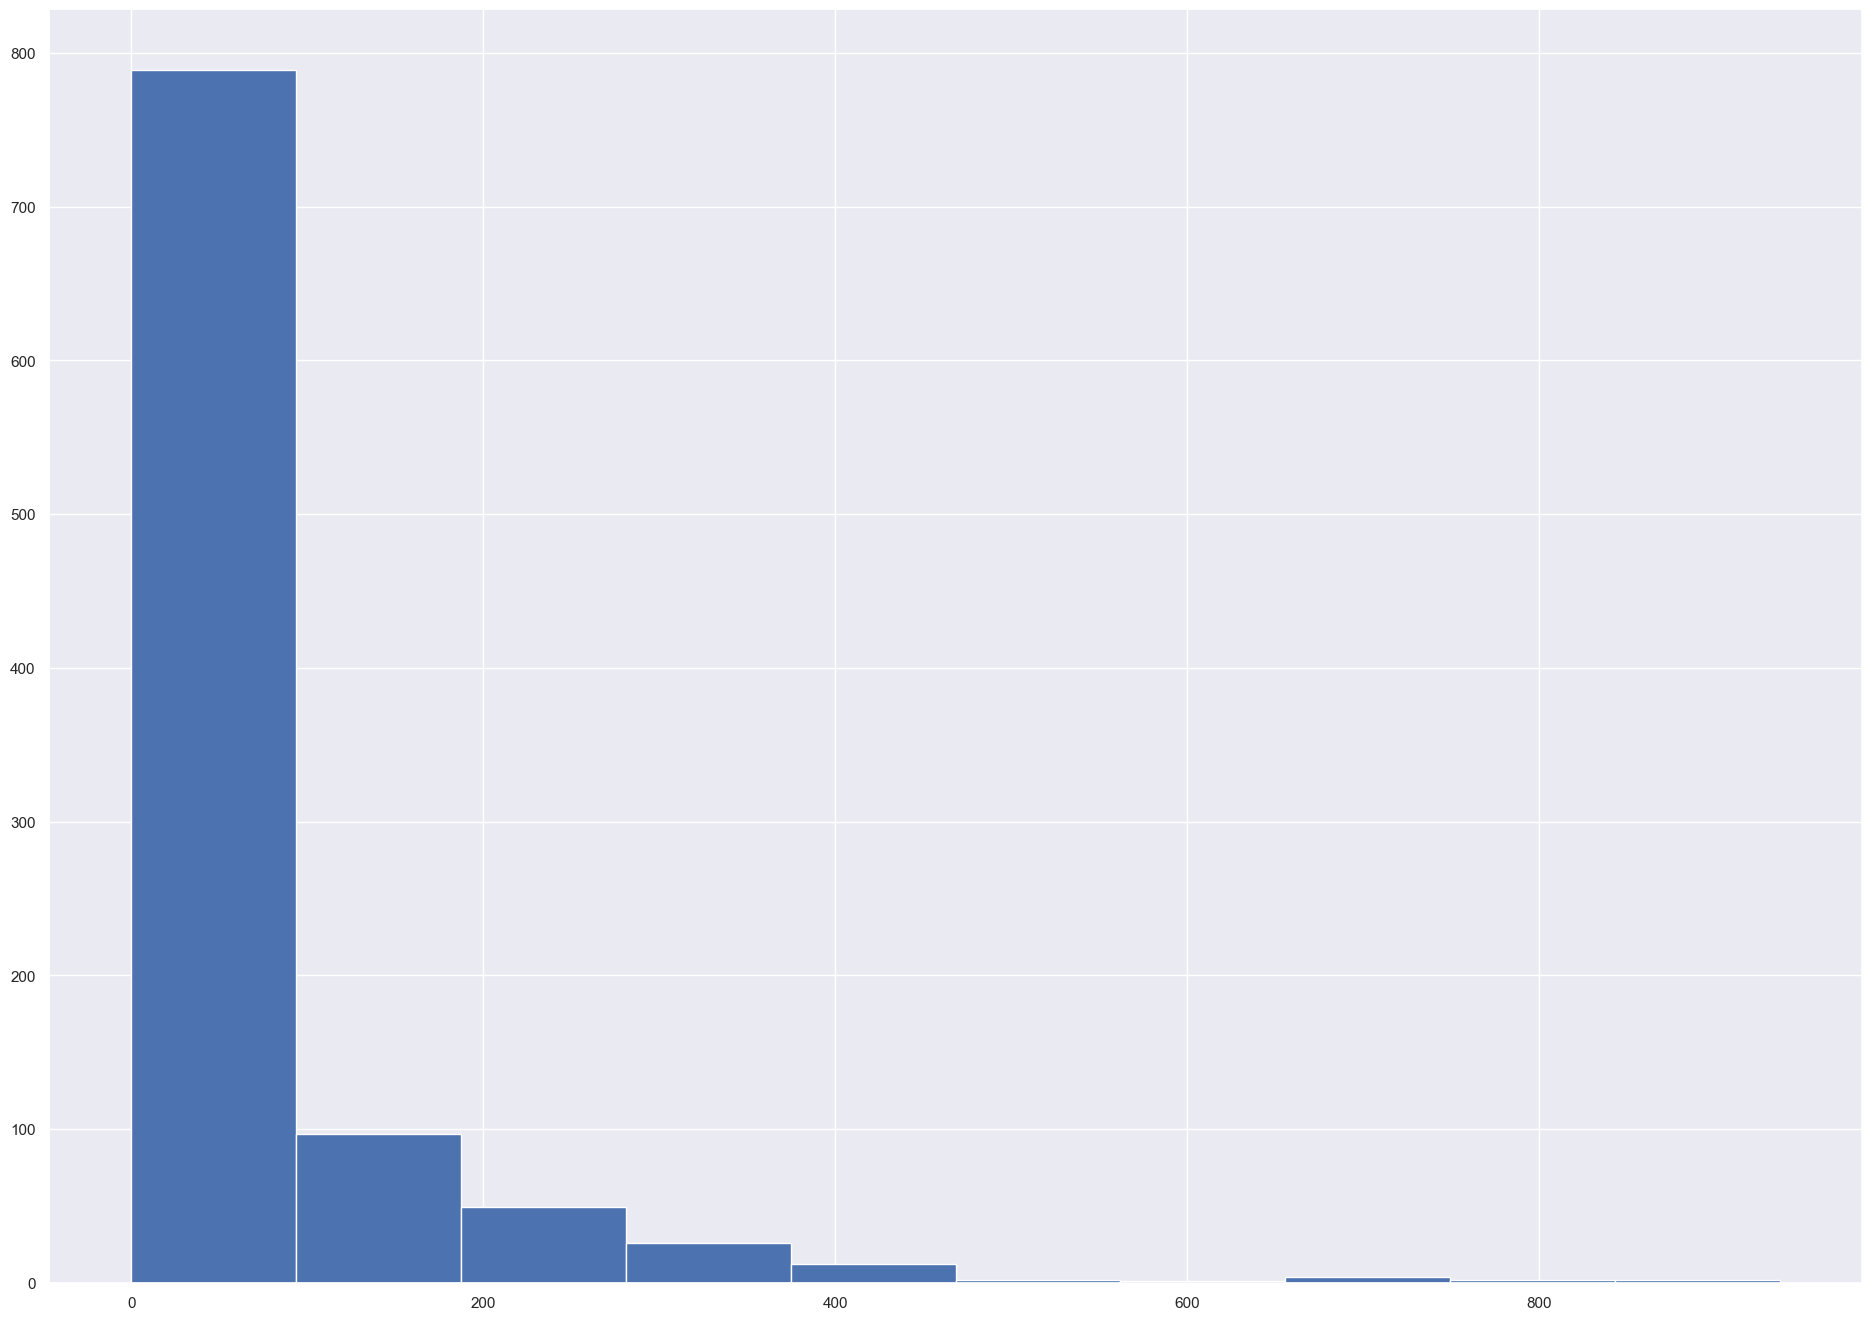

In [44]:
plt.hist(df['Gross_($M)'])
plt.show()

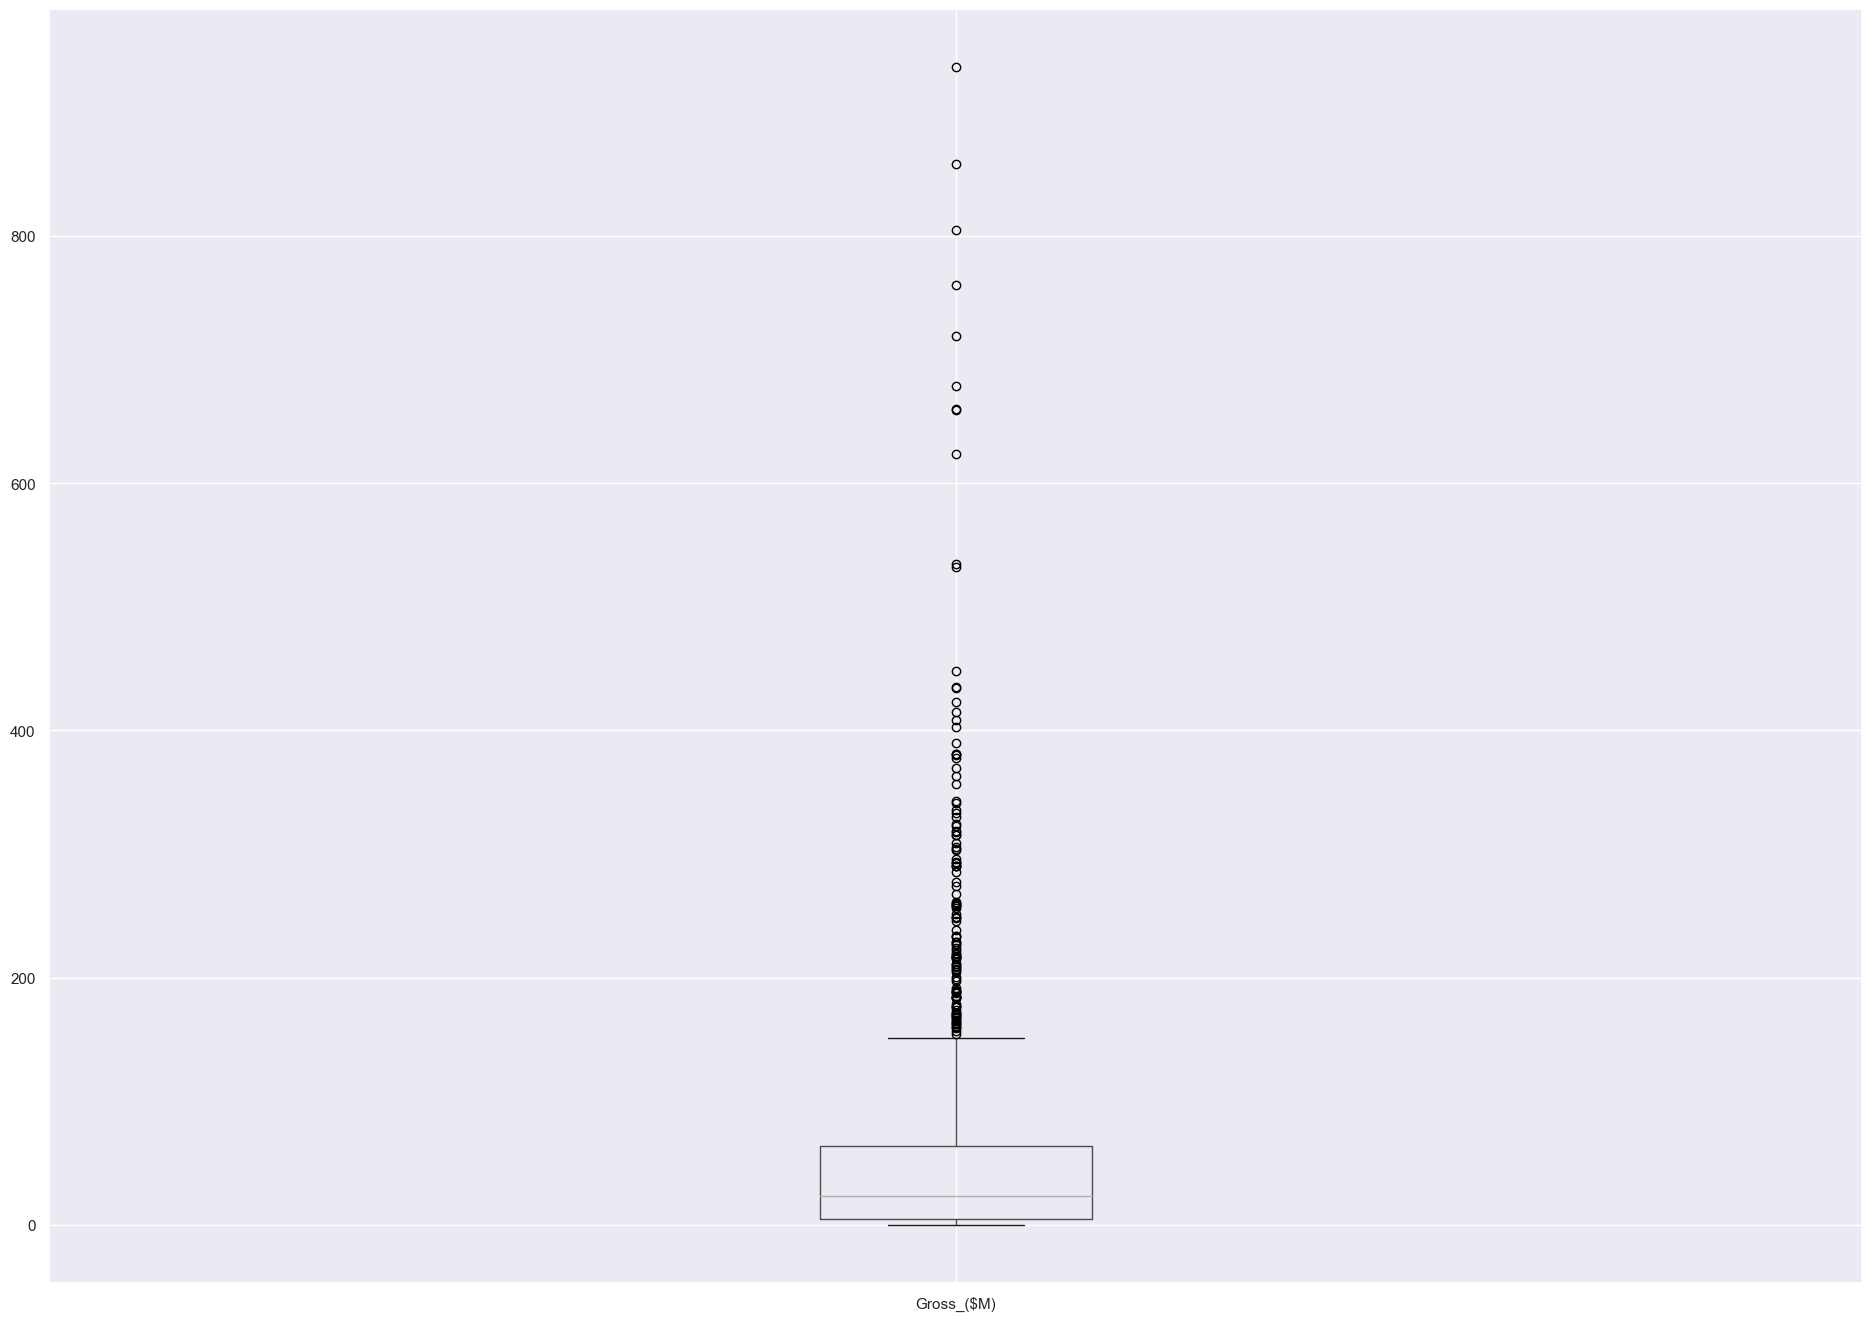

In [45]:
figure=df.boxplot(column="Gross_($M)")

In [46]:
IQR=df_outliers['Gross_($M)'].quantile(0.75)-df_outliers['Gross_($M)'].quantile(0.25)
lower_bridge=df_outliers['Gross_($M)'].quantile(0.25)-(IQR*3)
upper_bridge=df_outliers['Gross_($M)'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

df_outliers.loc[df_outliers['Gross_($M)']>=upper_bridge,'Gross_($M)']=upper_bridge
df_outliers.loc[df_outliers['Gross_($M)']<=lower_bridge,'Gross_($M)']=lower_bridge

-171.04
239.6325


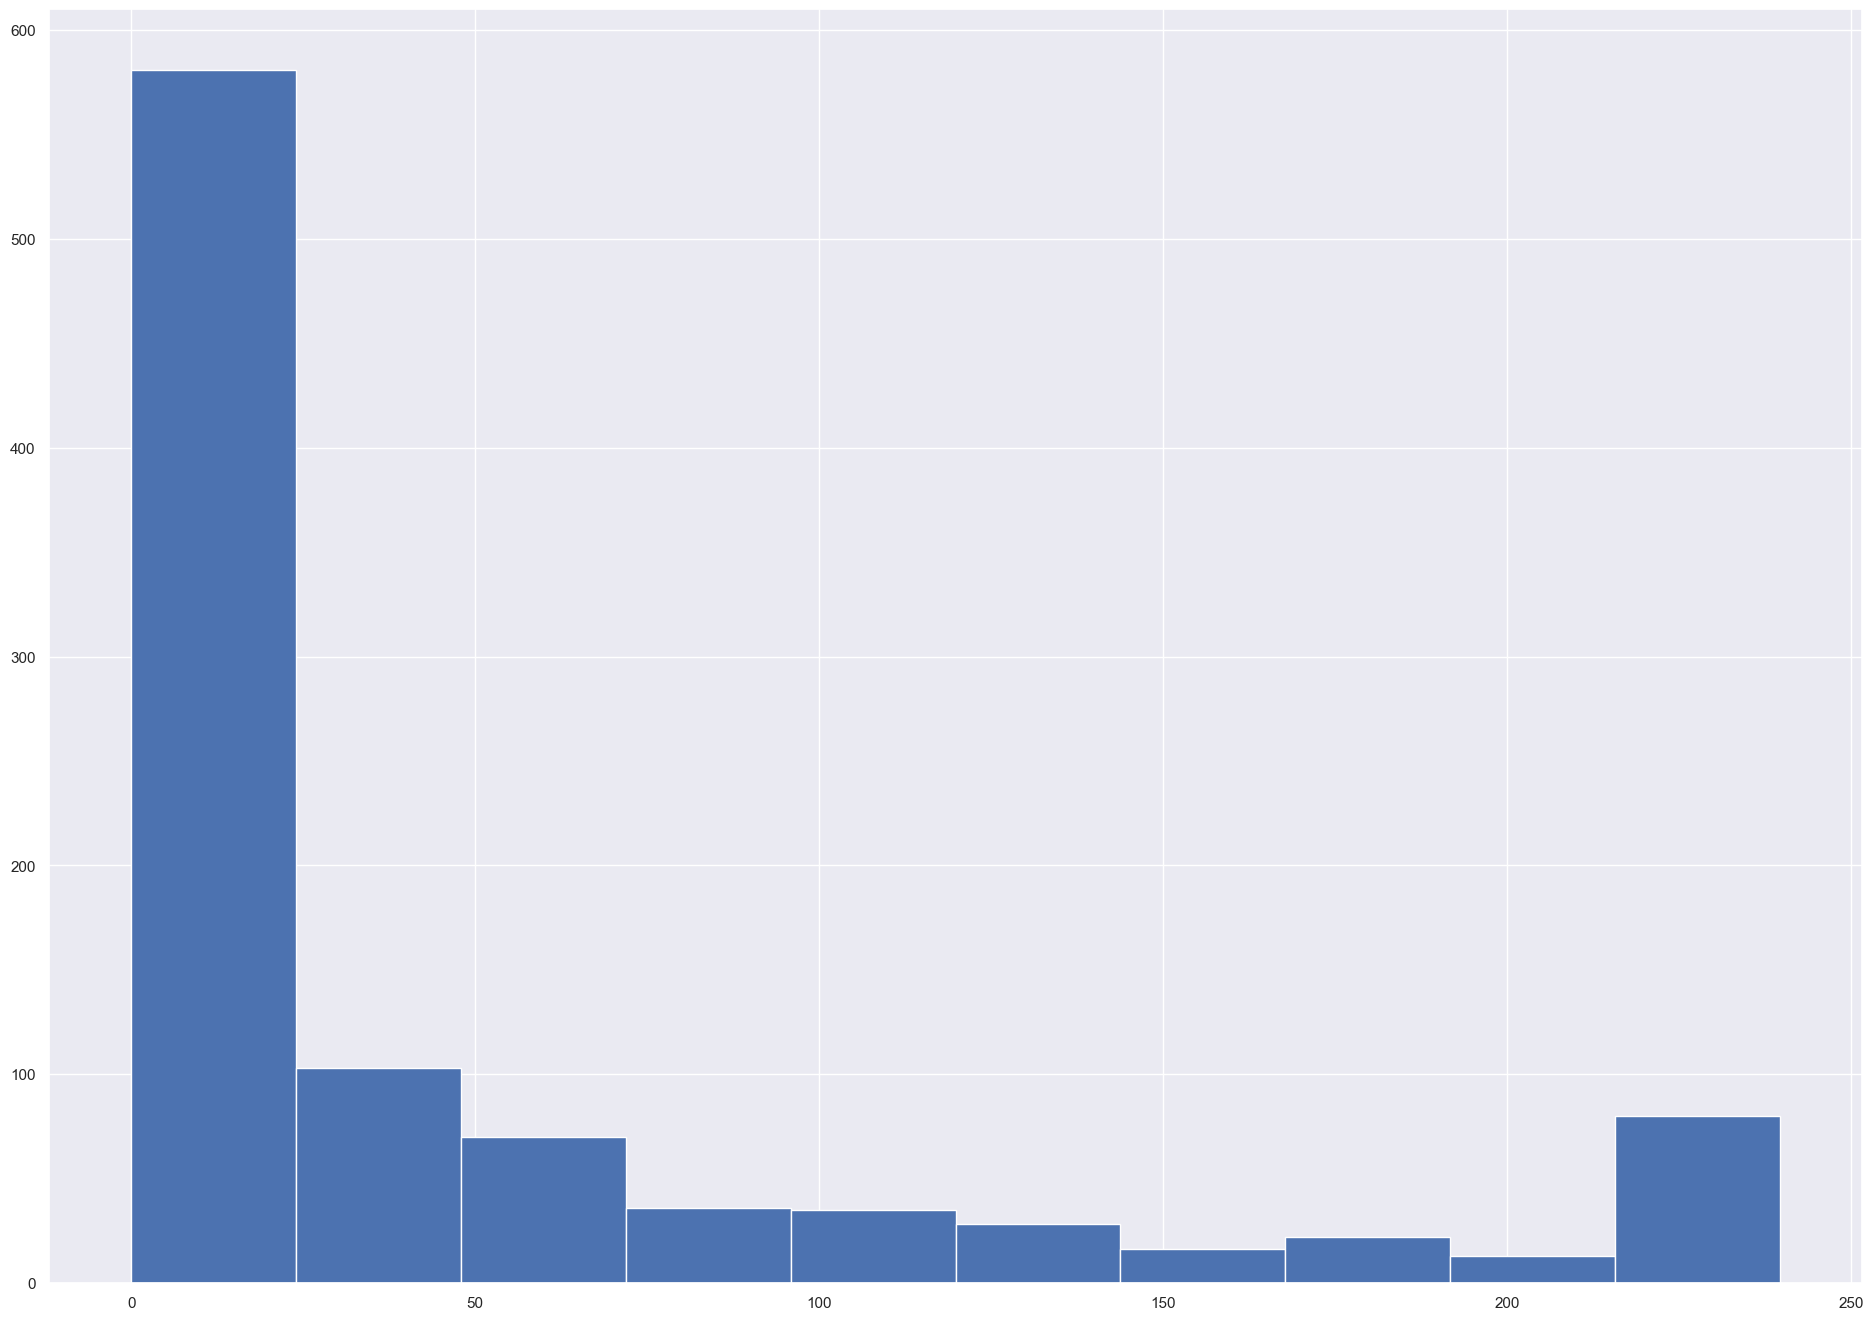

In [47]:
plt.hist(df_outliers['Gross_($M)'])
plt.show()

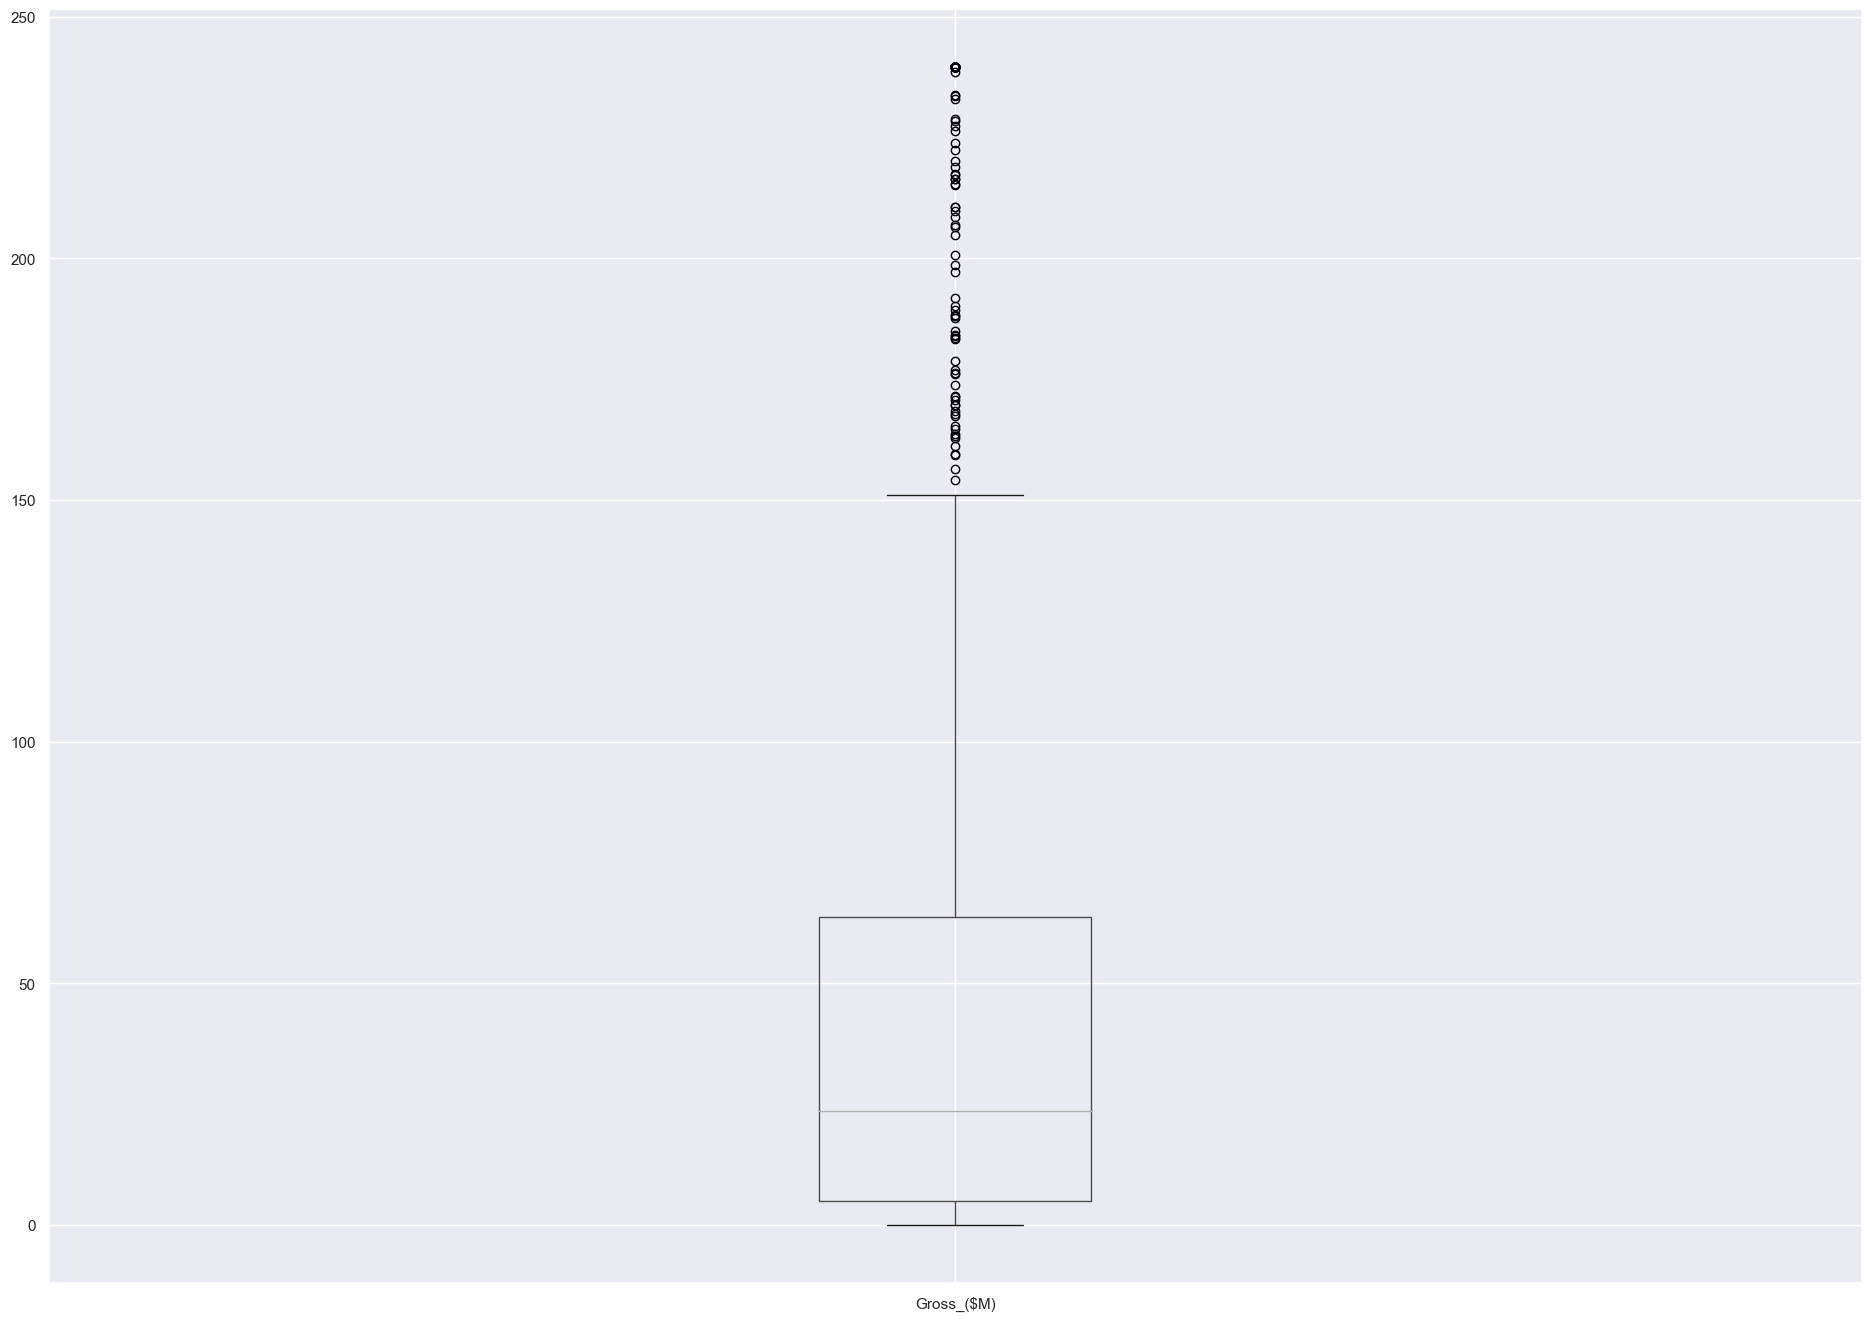

In [48]:
figure=df_outliers.boxplot(column="Gross_($M)")

### 6. Feature selection

In [49]:
features = ['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre' , 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_1', 'Genre_2', 'Genre_3']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k='all').fit(X, y)
selector.scores_.round(0)

array([  0.,   9.,   9.,  77.,   0.,   1., 284.,   6.,   2.,   0.,   1.,
         0.])

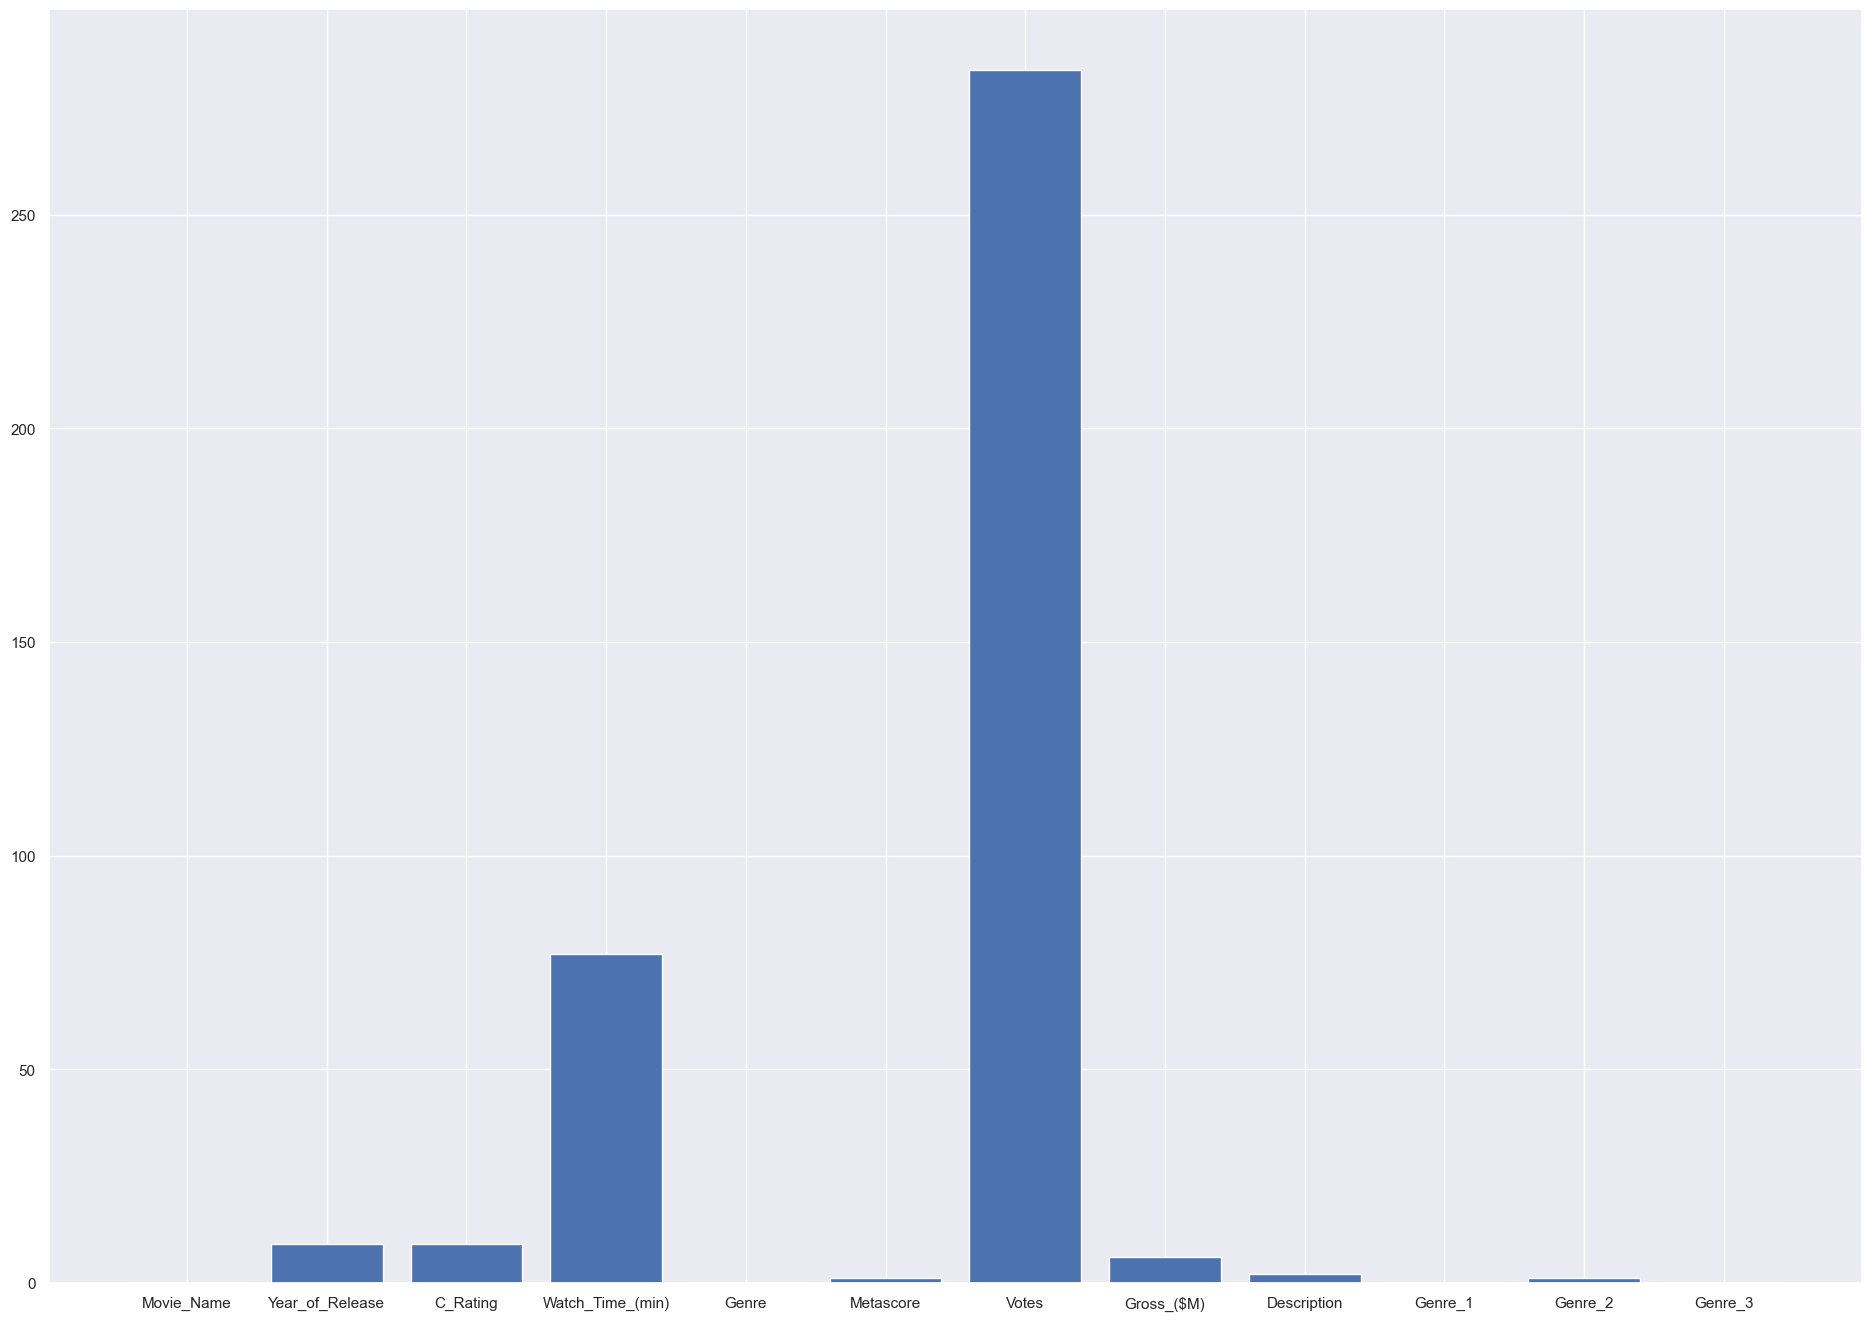

In [51]:
x = np.array(['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre' , 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_1', 'Genre_2', 'Genre_3'])
y = np.array([0.,   9.,   9.,  77.,   0.,   1., 284.,   6.,   2.,   0.,   1., 0.])

plt.bar(x,y)
plt.show()

In [52]:
features = ['Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_2']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

### 7. Feature Scaling

In [53]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scale = scaler.fit_transform(X)
X_scale

array([[-0.14285714,  0.5       ,  0.62857143, ...,  0.08326586,
         0.48524924,  0.        ],
       [-0.77142857,  0.5       ,  1.57142857, ...,  1.90079686,
         0.58697864,  0.        ],
       [ 0.25714286,  0.        ,  0.91428571, ...,  3.68479141,
         0.94710071, -0.16666667],
       ...,
       [-0.08571429,  0.        , -0.42857143, ...,  0.2105936 ,
         0.49542218,  0.        ],
       [ 0.22857143,  0.5       ,  0.05714286, ..., -0.38496612,
        -0.56459817,  0.        ],
       [-1.88571429,  1.25      , -1.4       , ...,  0.        ,
        -0.50559512,  1.66666667]])

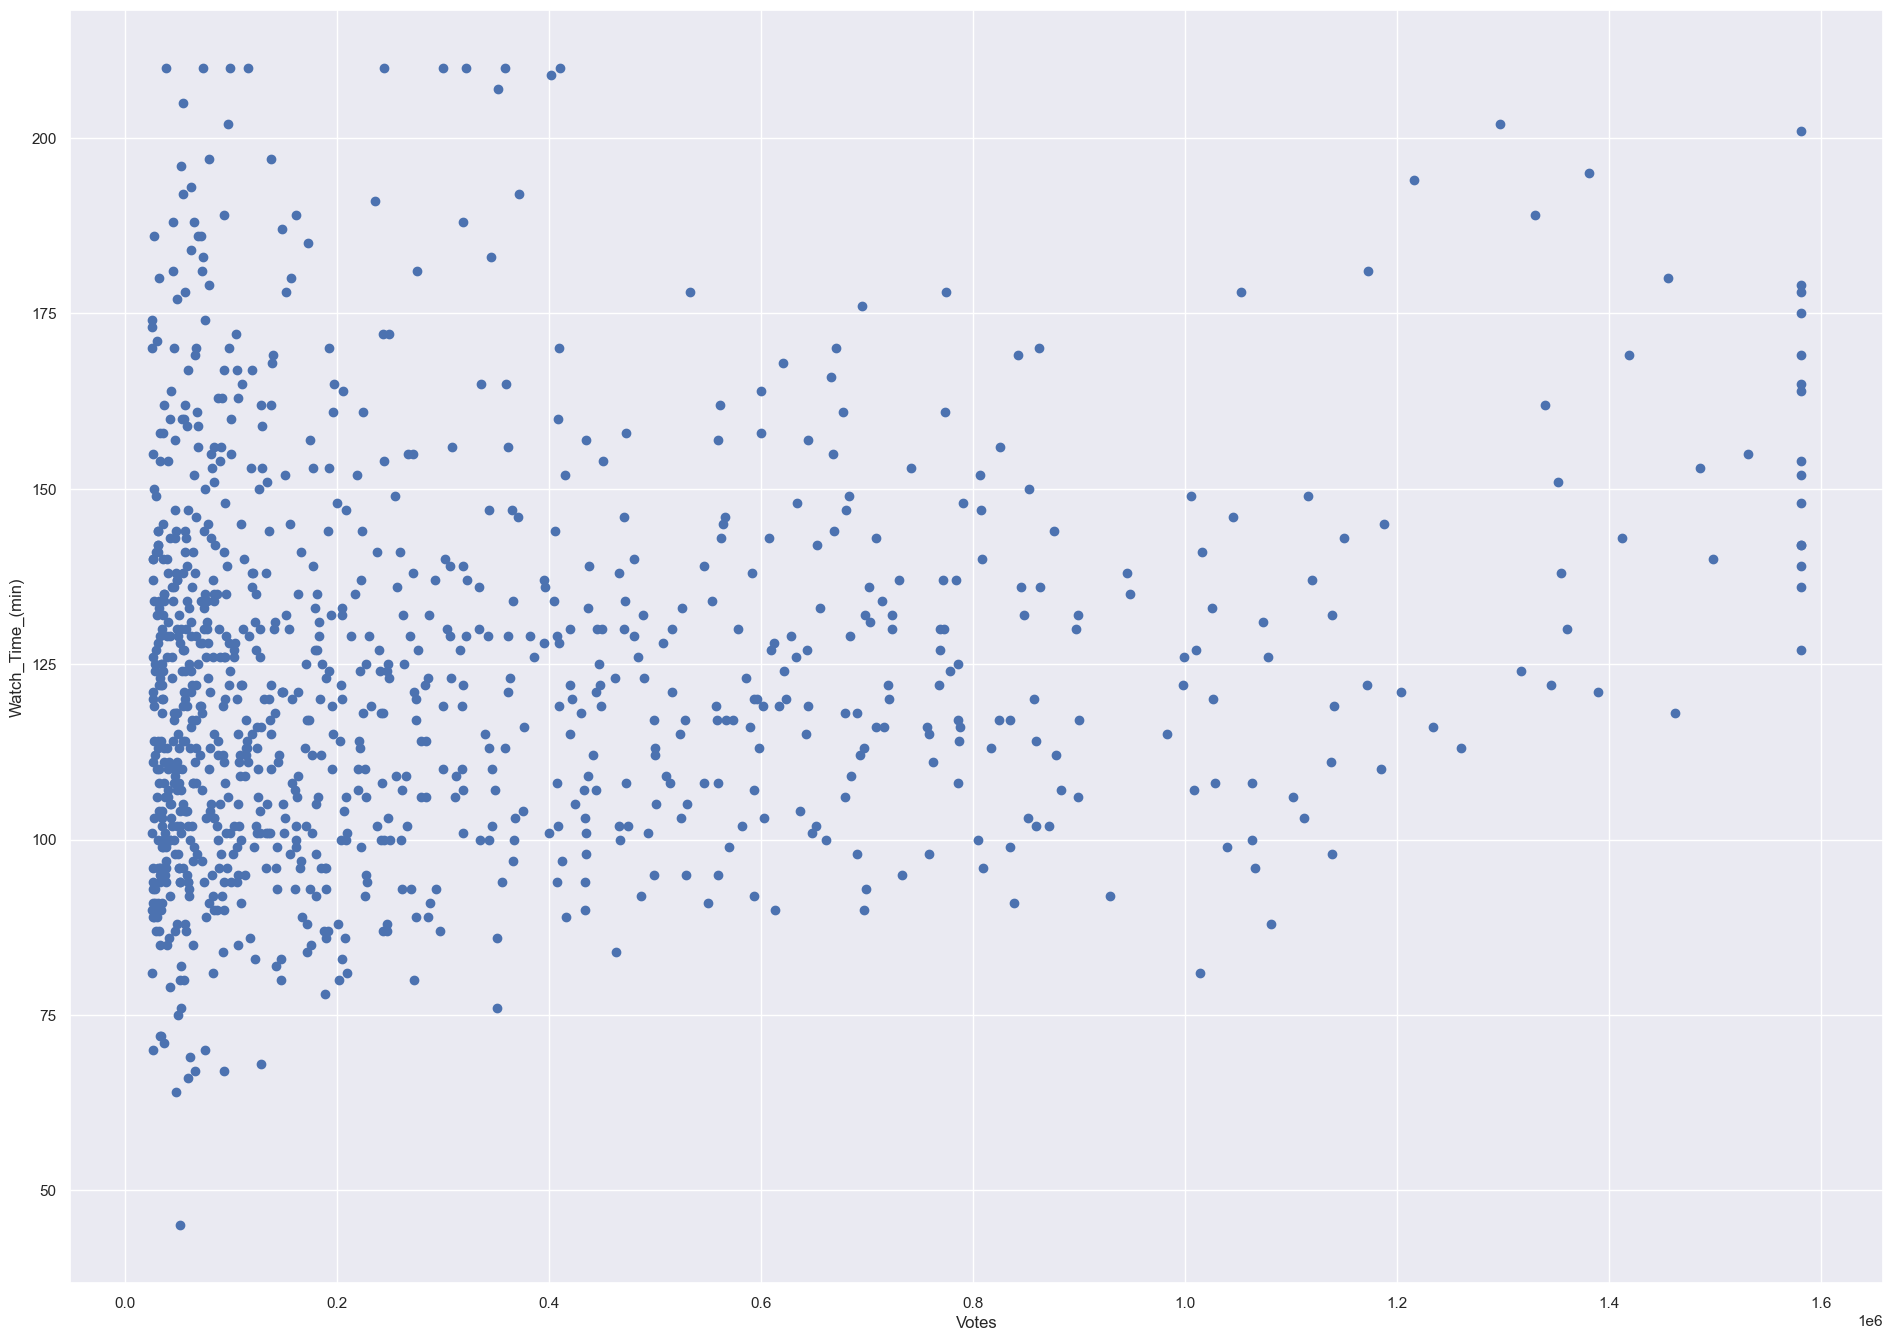

In [54]:
plt.scatter(X['Votes'], X['Watch_Time_(min)'])
plt.xlabel('Votes')
plt.ylabel('Watch_Time_(min)')
plt.show()

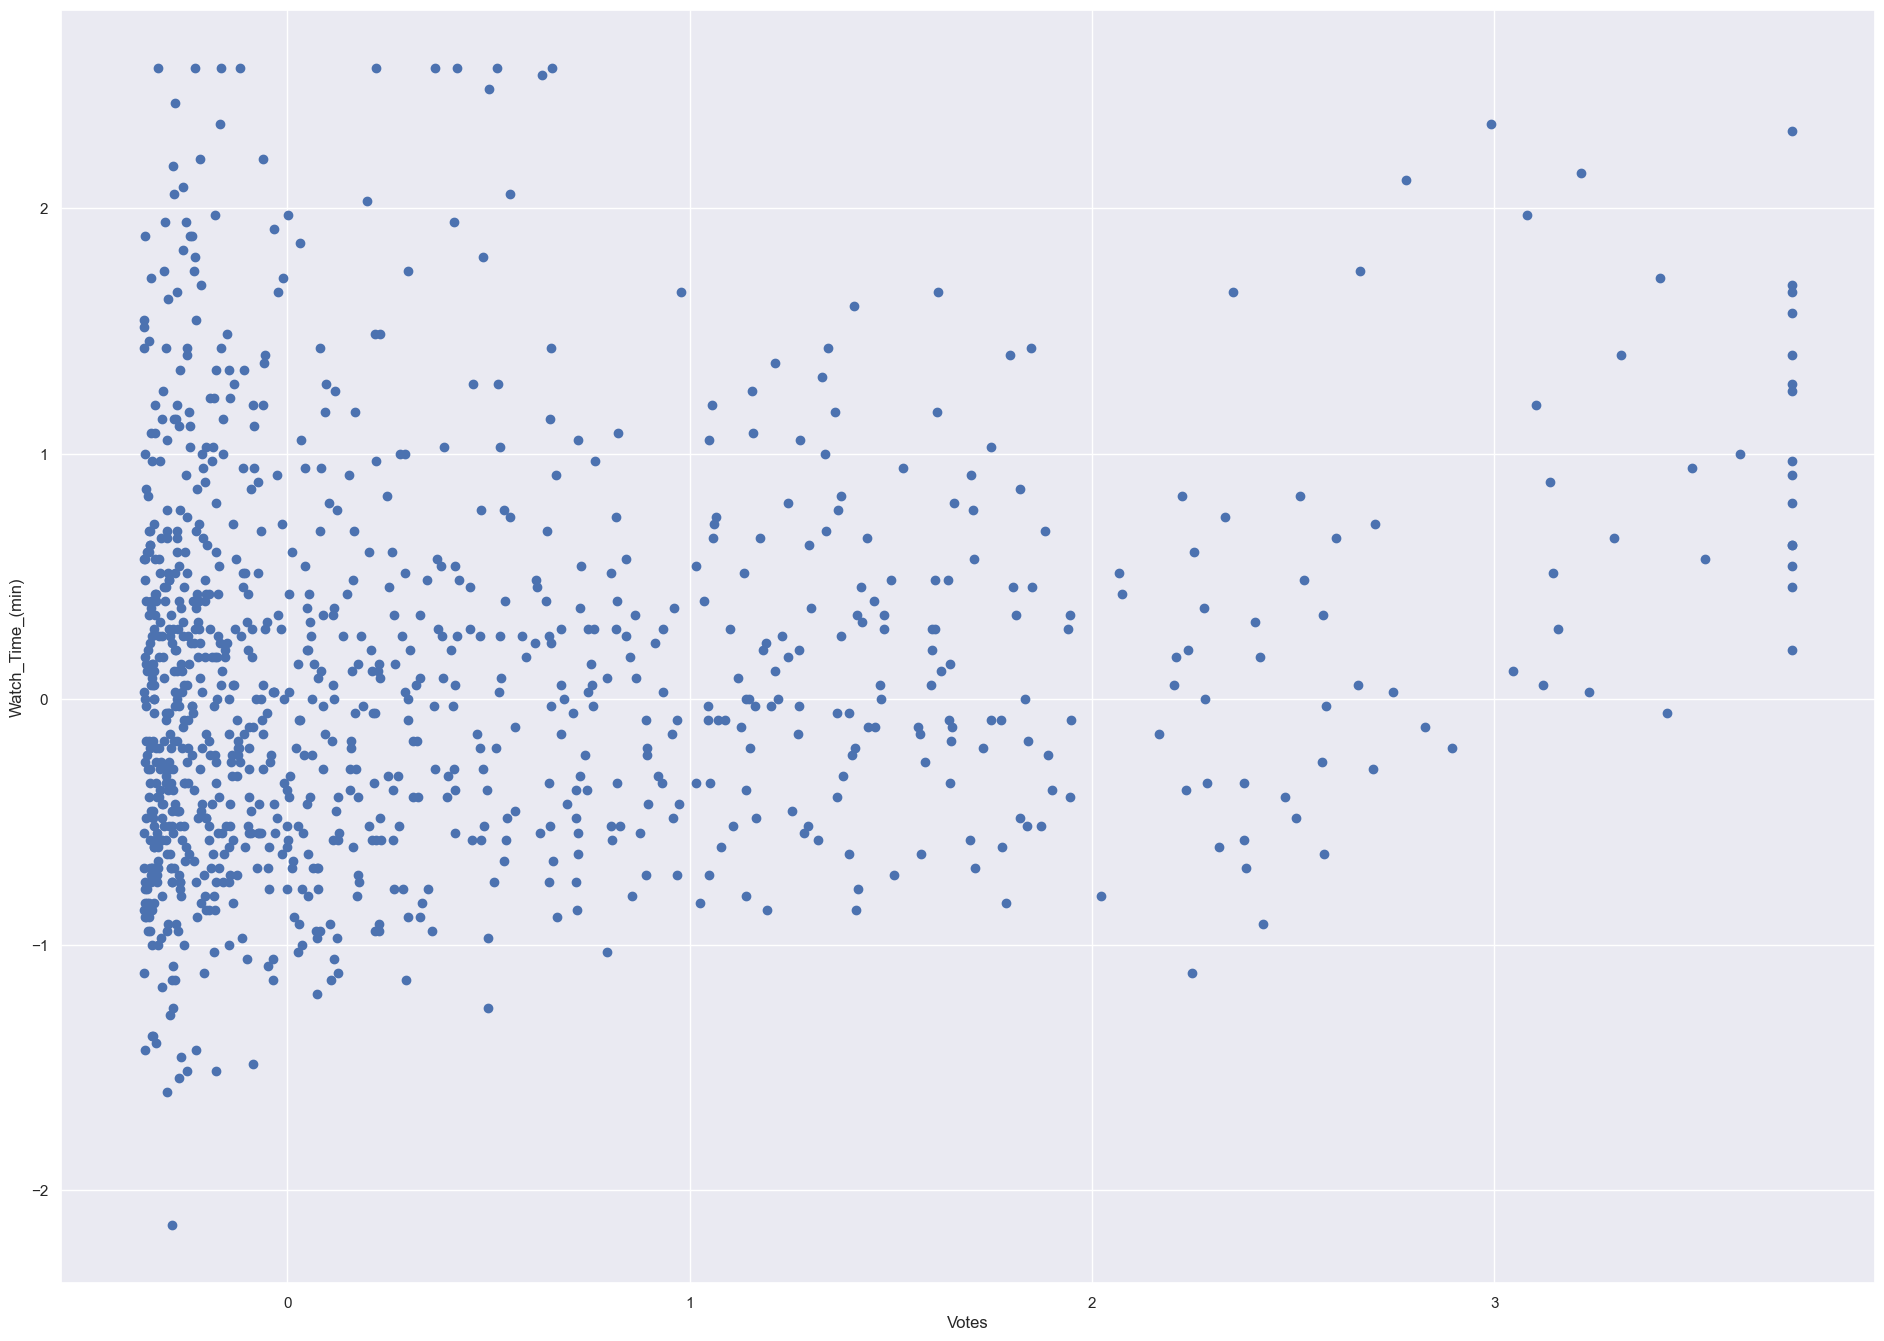

In [55]:
plt.scatter(X_scale[: ,4], X_scale[: ,2])
plt.xlabel('Votes')
plt.ylabel('Watch_Time_(min)')
plt.show()

## III. Data Visualization

In [56]:
df_outliers.head(20)

,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description,Genre_1,Genre_2,Genre_3
0,854,1994,9,142.0,133,9.3,82.0,1580713.0,28.3400,730,6,5,13
1,746,1972,9,175.0,120,9.2,100.0,1580713.0,134.9700,780,5,5,6
2,718,2008,7,152.0,20,9.0,84.0,1580713.0,239.6325,957,0,4,4
3,599,1993,9,195.0,84,9.0,95.0,1380843.0,96.9000,623,3,5,8
4,800,2003,7,201.0,4,9.0,94.0,1580713.0,239.6325,585,0,1,4
5,0,1957,0,96.0,120,9.0,97.0,809518.0,4.3600,801,5,5,12
6,747,1974,9,202.0,120,9.0,90.0,1296679.0,57.3000,793,5,5,17
7,554,1994,9,154.0,120,8.9,95.0,1580713.0,107.9300,812,5,5,7
8,352,2010,7,148.0,9,8.8,74.0,1580713.0,239.6325,298,0,1,14
9,258,1999,9,139.0,133,8.8,66.0,1580713.0,37.0300,471,6,17,4


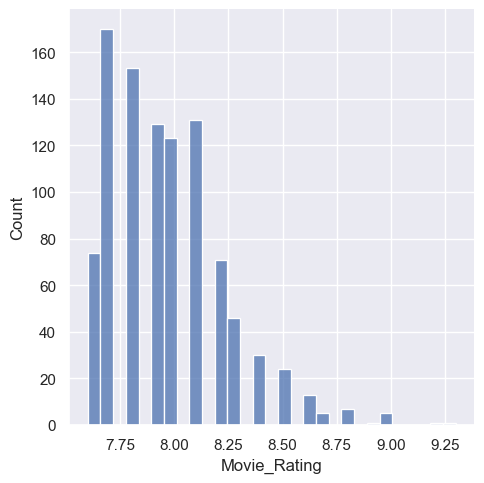

In [57]:
sns.displot(df_outliers, x="Movie_Rating")

<AxesSubplot:xlabel='Movie_Rating', ylabel='Gross_($M)'>

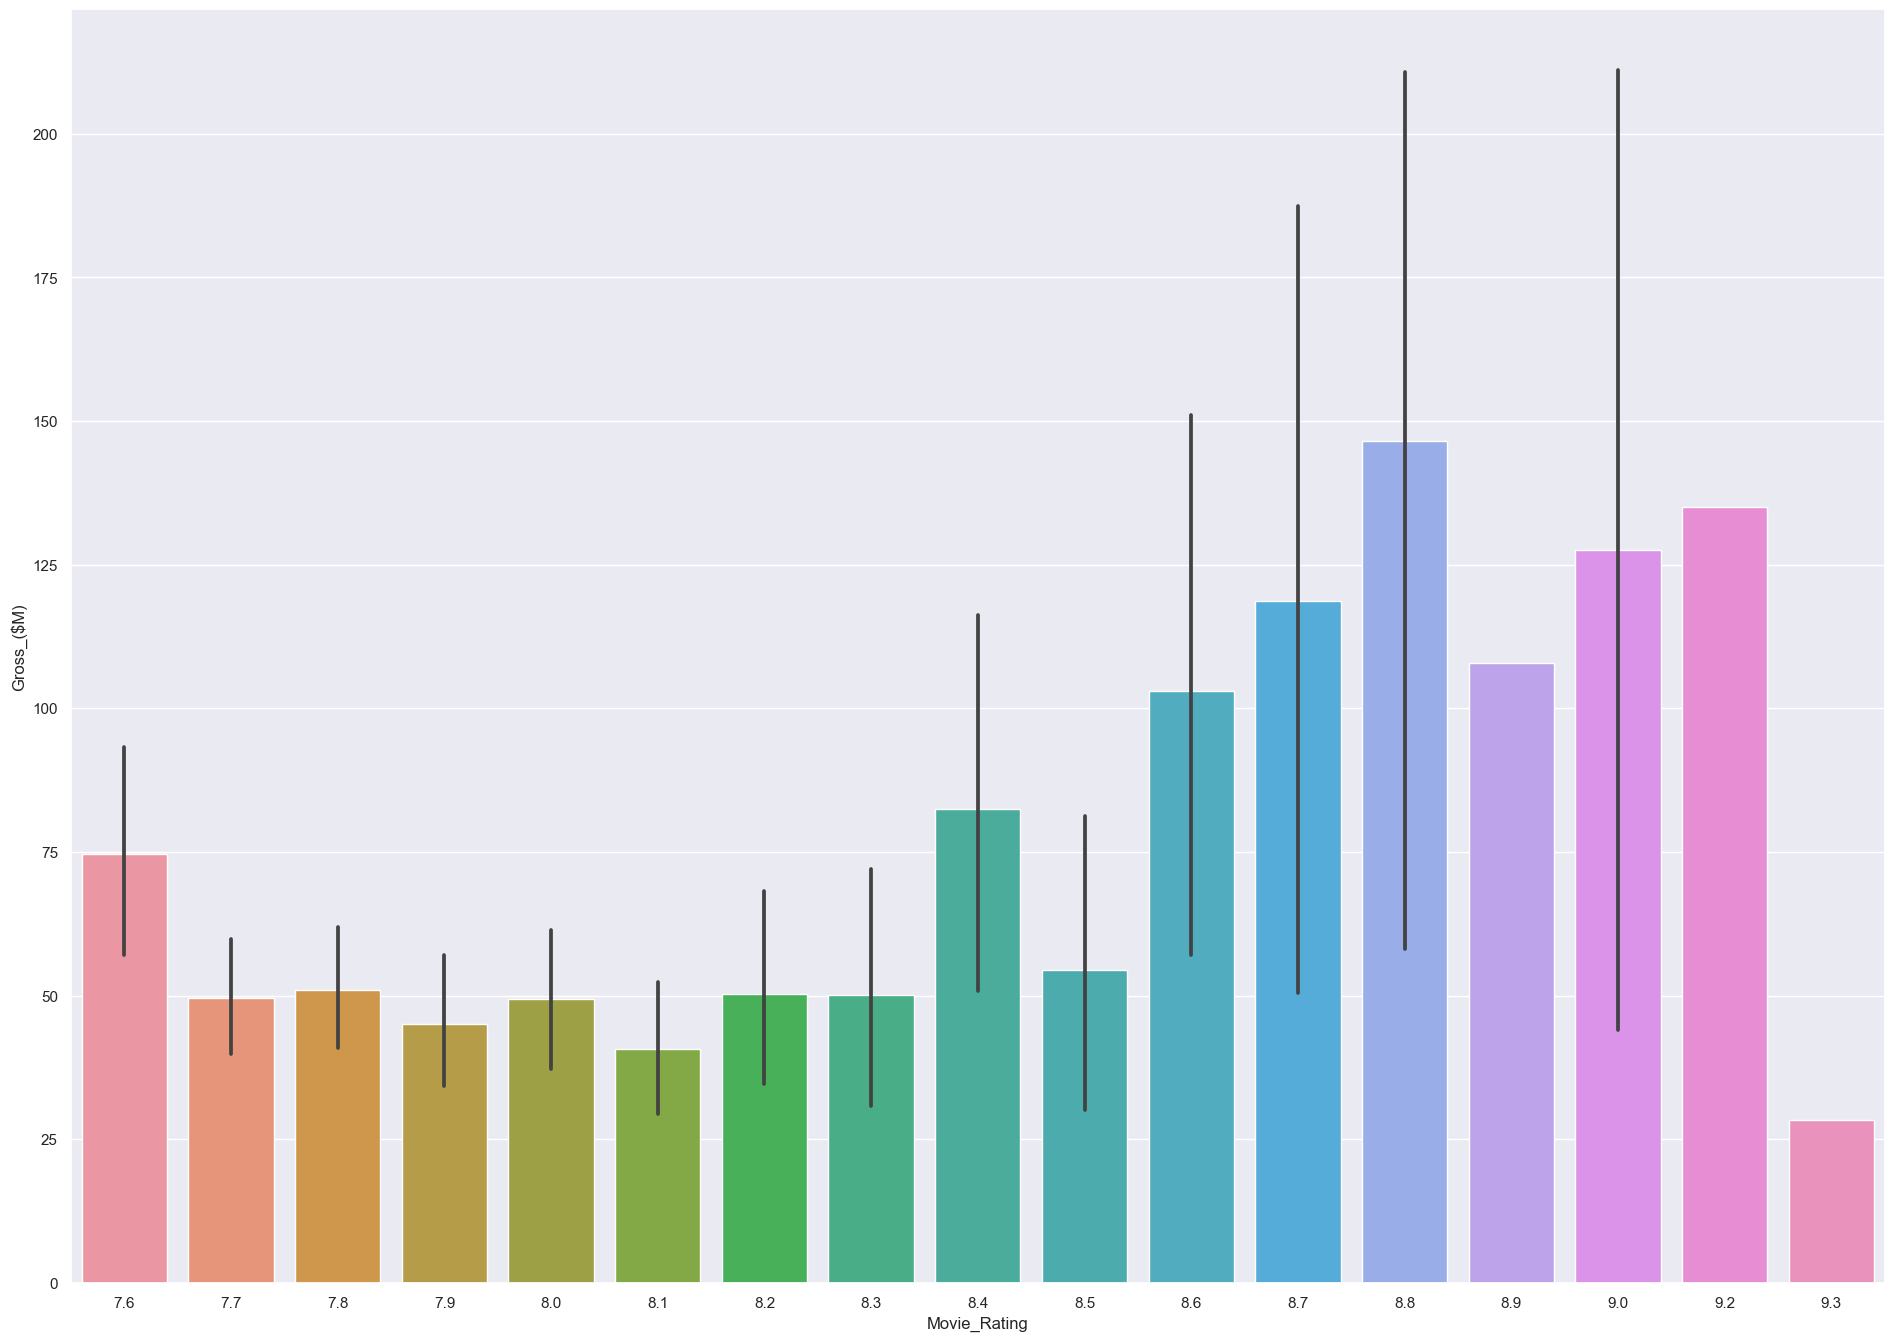

In [58]:
sns.barplot(x='Movie_Rating', y='Gross_($M)', data=df_outliers)

<AxesSubplot:xlabel='Movie_Rating', ylabel='Votes'>

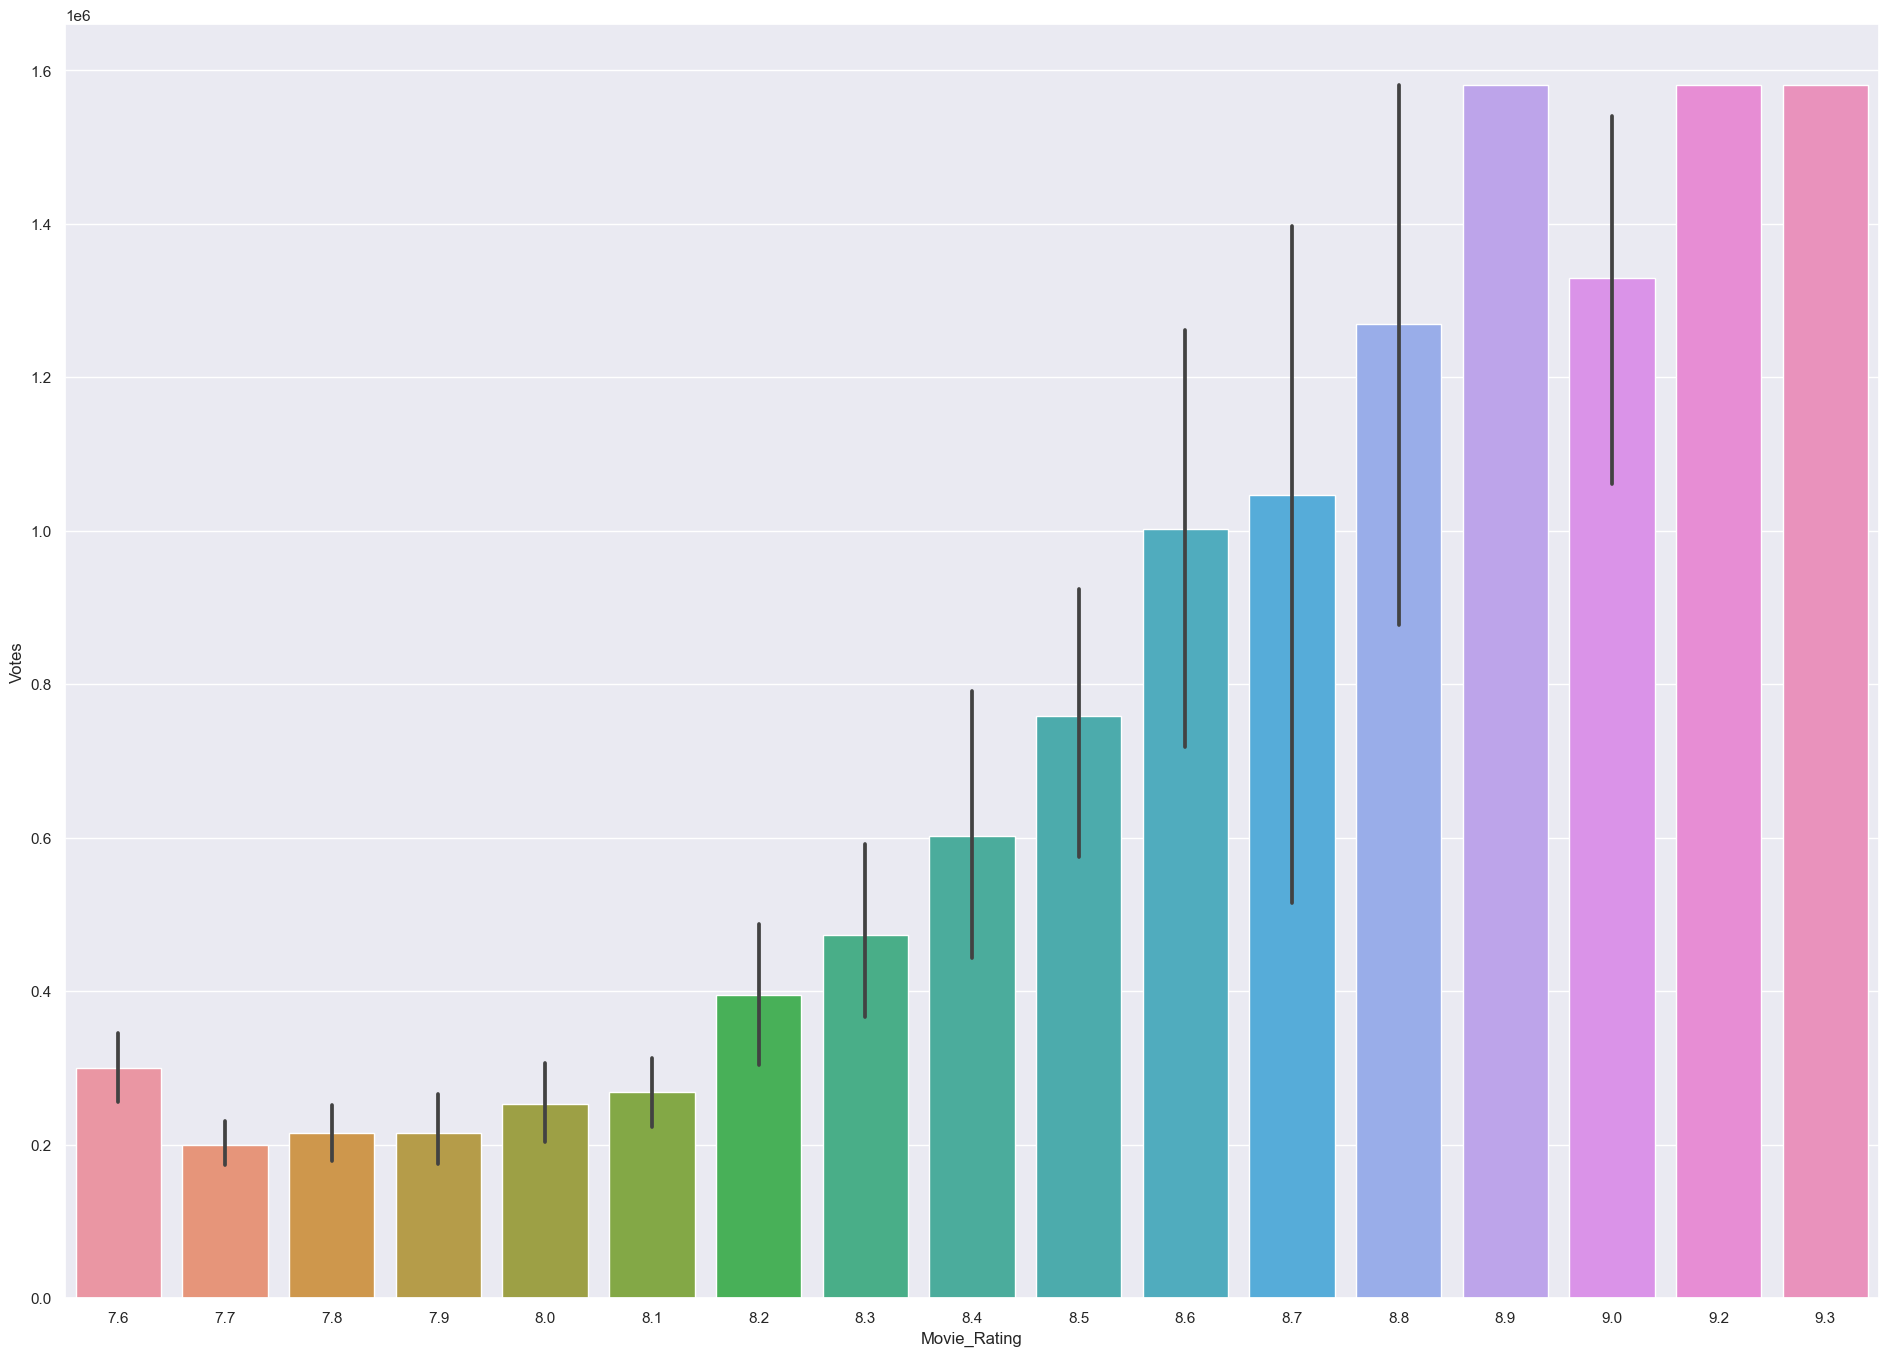

In [59]:
sns.barplot(x='Movie_Rating', y='Votes', data=df_outliers)

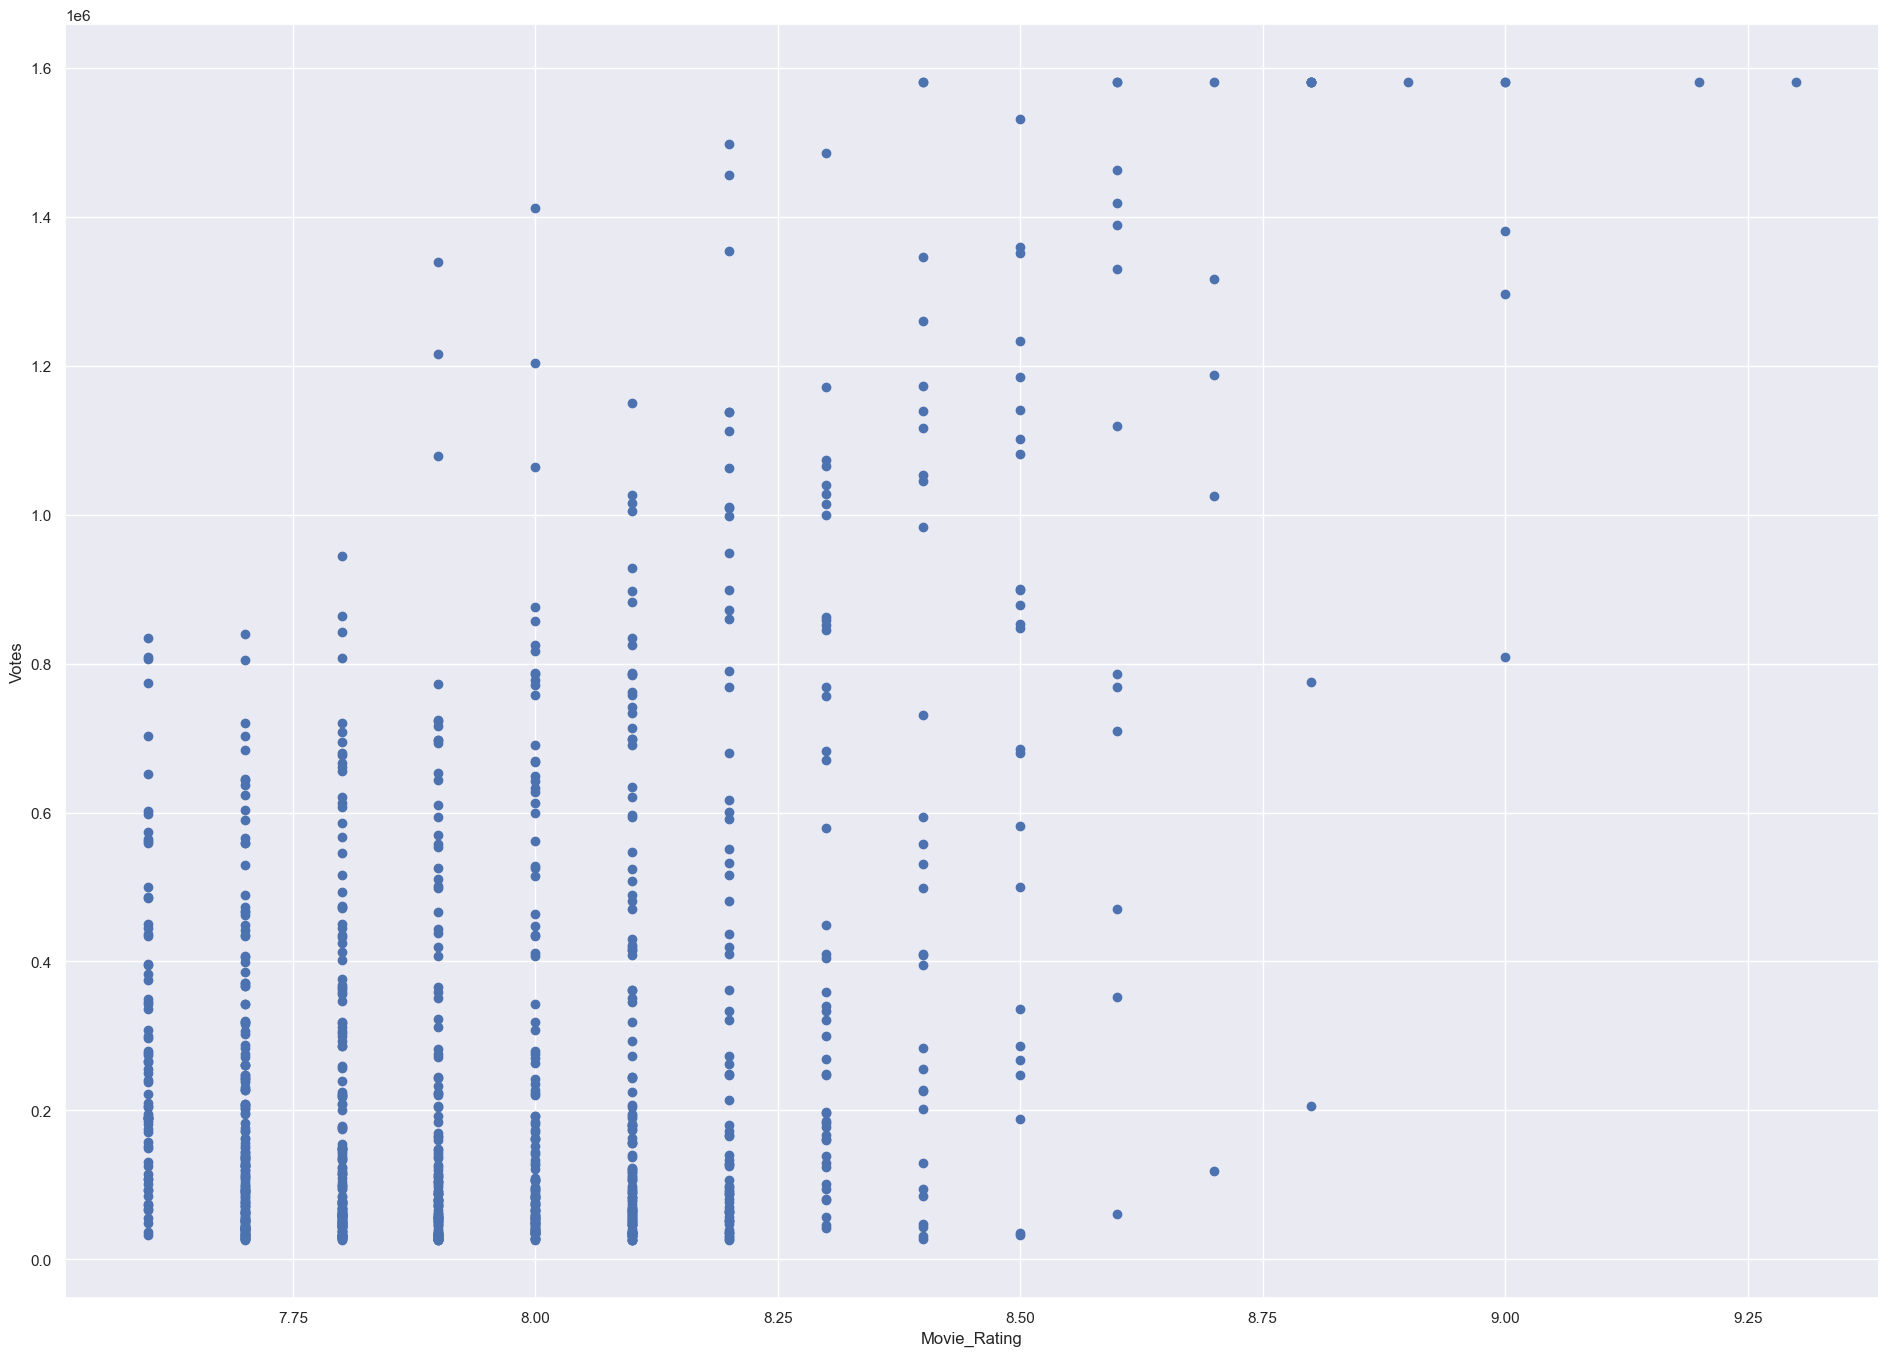

In [60]:
plt.scatter(df_outliers['Movie_Rating'], df_outliers['Votes'])
plt.xlabel("Movie_Rating")
plt.ylabel("Votes")
plt.show()

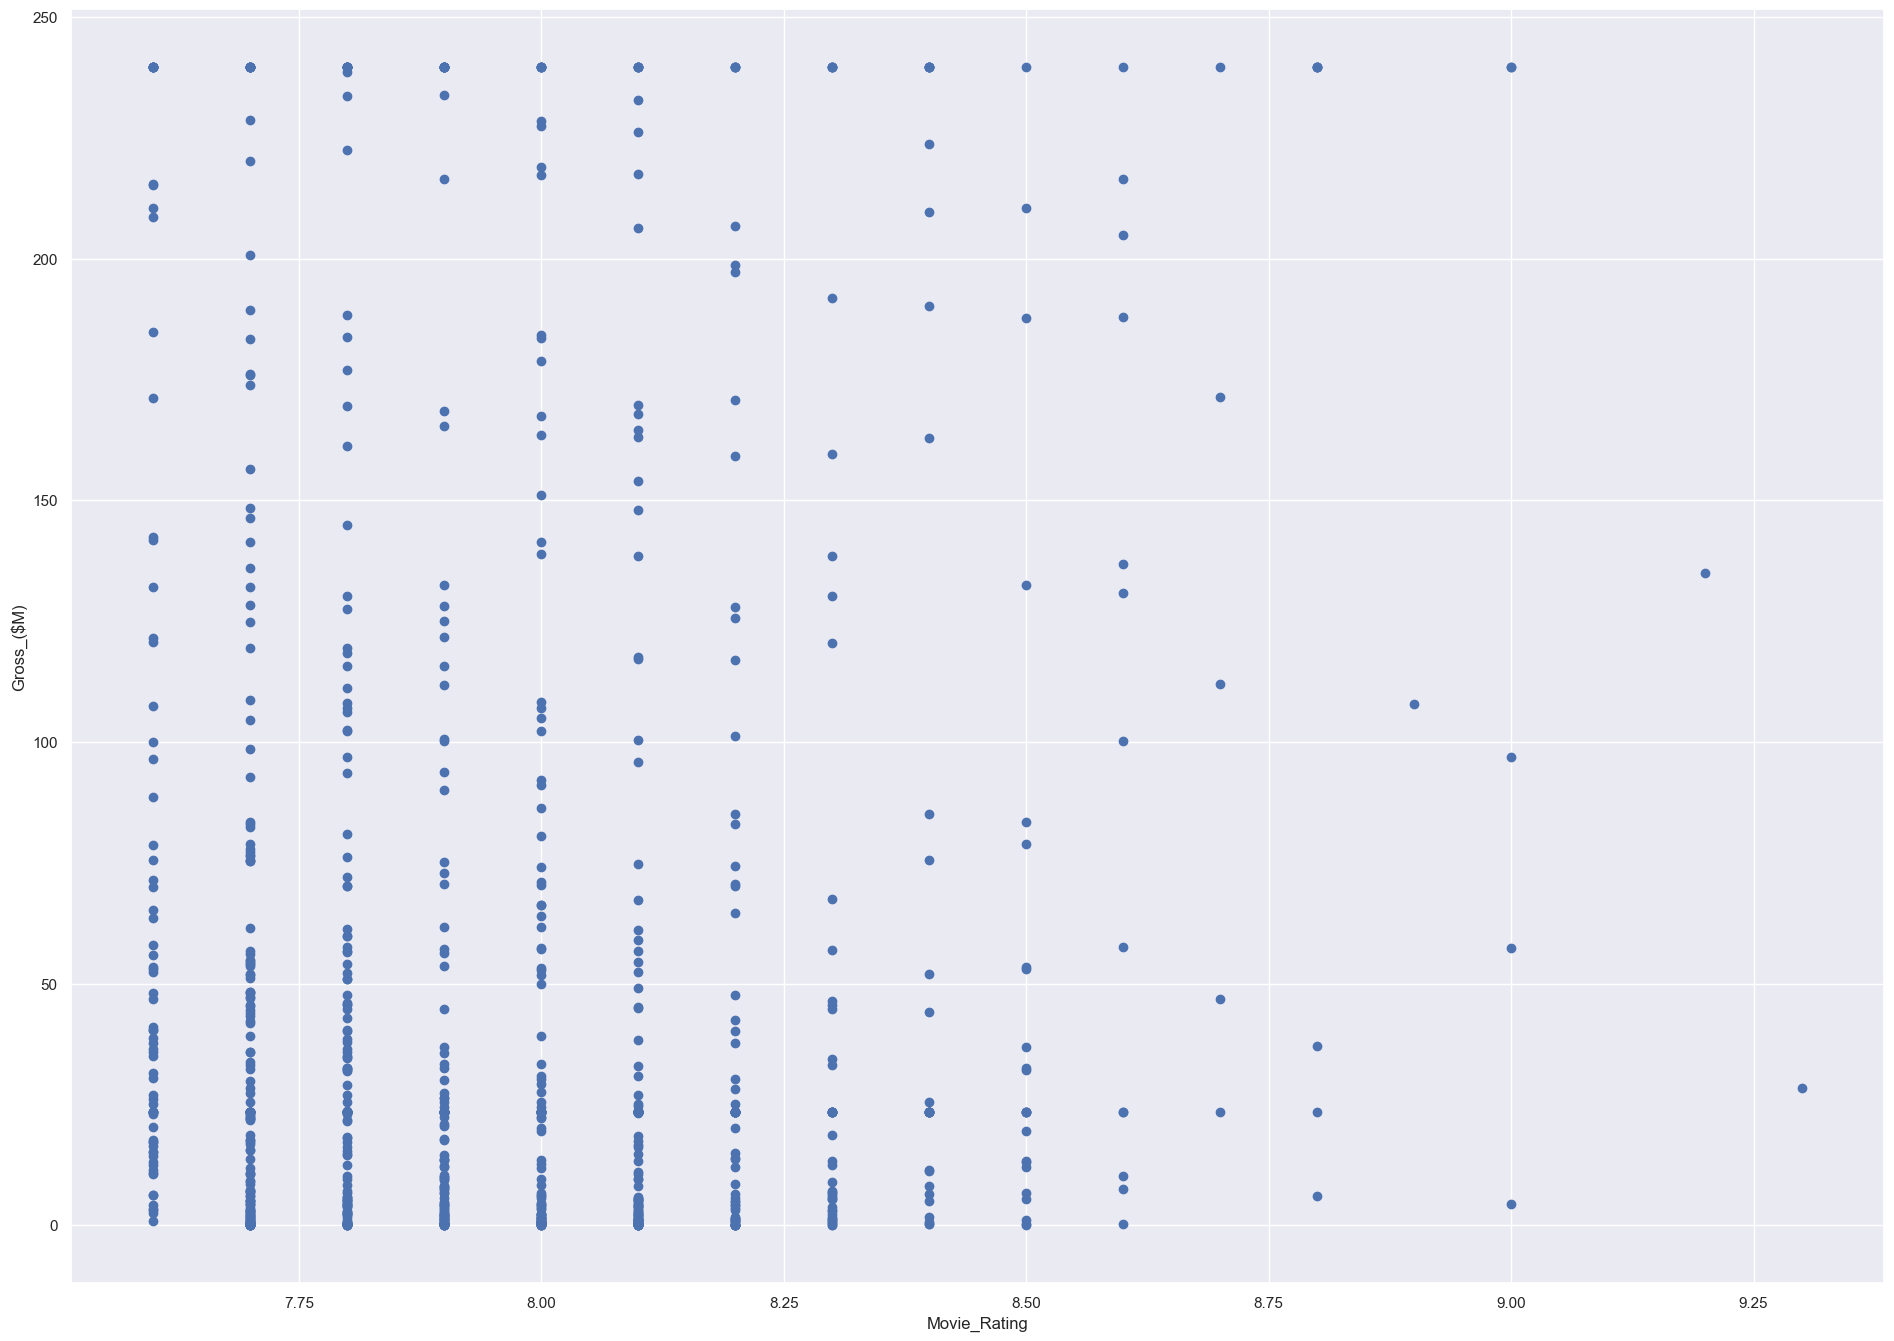

In [61]:
plt.scatter(df_outliers['Movie_Rating'], df_outliers['Gross_($M)'])
plt.xlabel("Movie_Rating")
plt.ylabel("Gross_($M)")
plt.show()

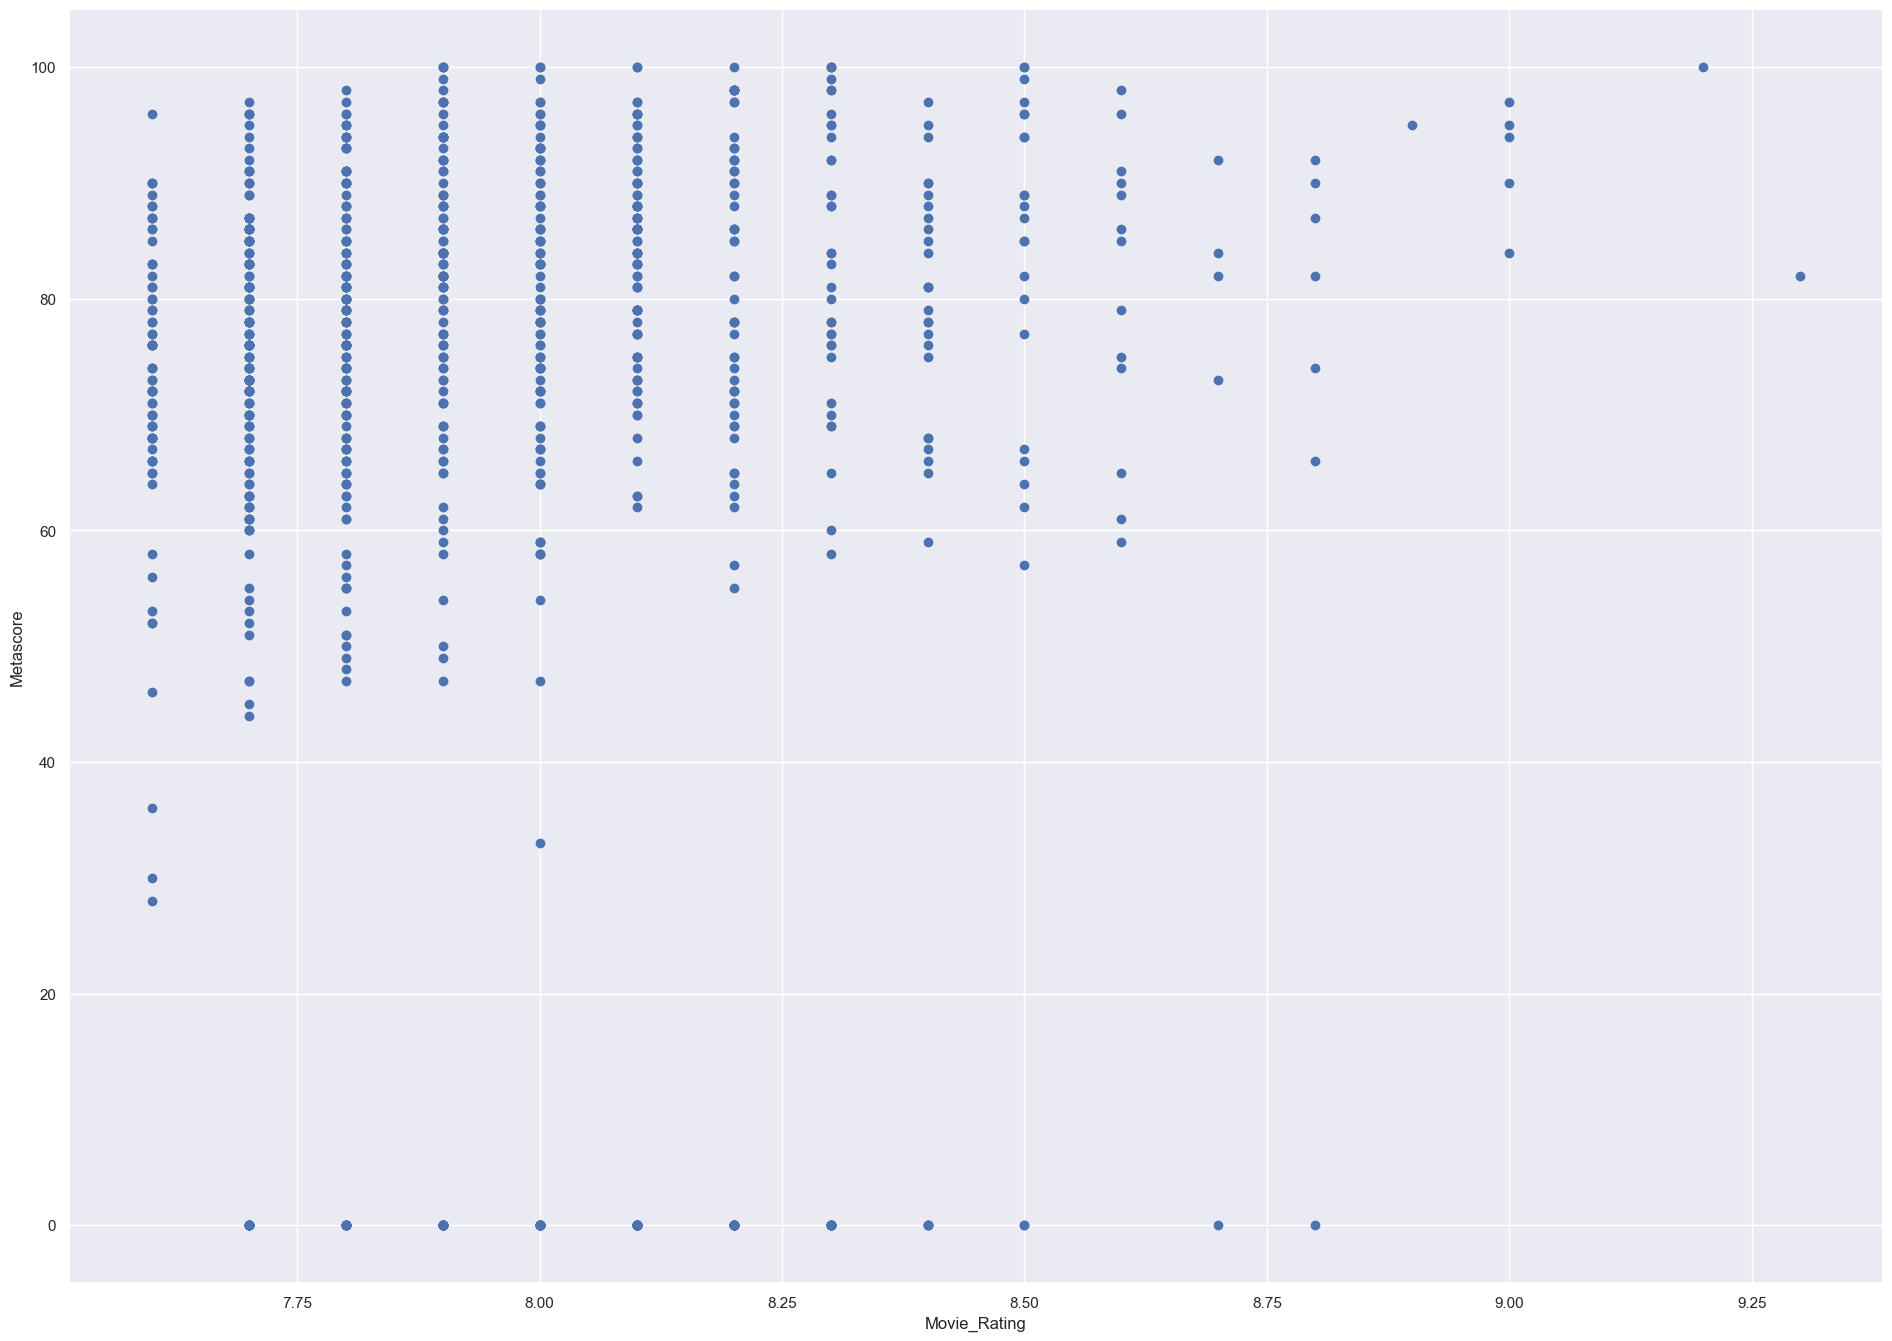

In [62]:
plt.scatter(df_outliers['Movie_Rating'], df_outliers['Metascore'])
plt.xlabel("Movie_Rating")
plt.ylabel("Metascore")
plt.show()

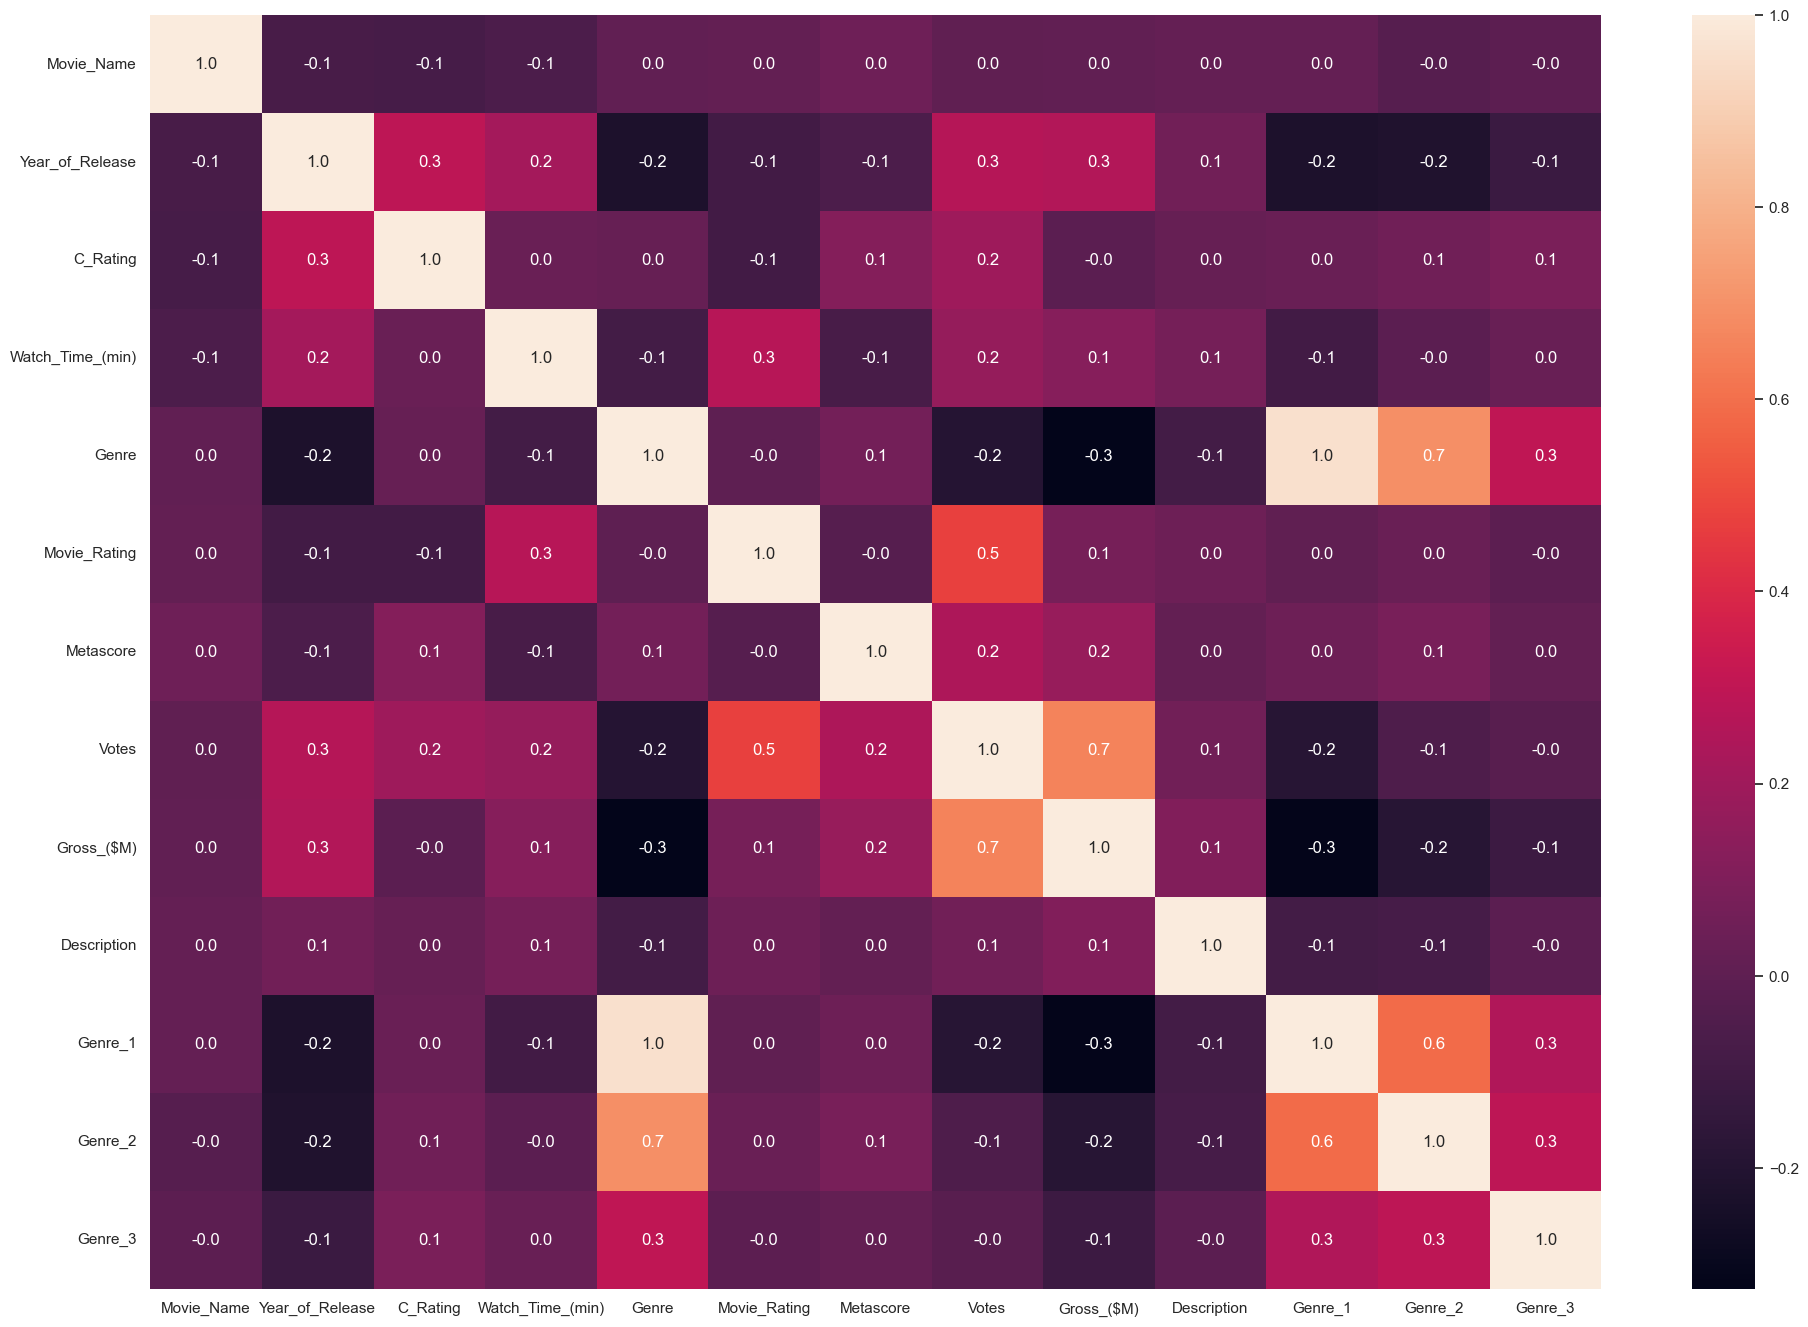

In [63]:
sns.heatmap(df_outliers.corr(), annot=True ,fmt=".1f")
plt.show()

## IV. Build models

### Split Data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3, random_state = 52)

### Random Forest

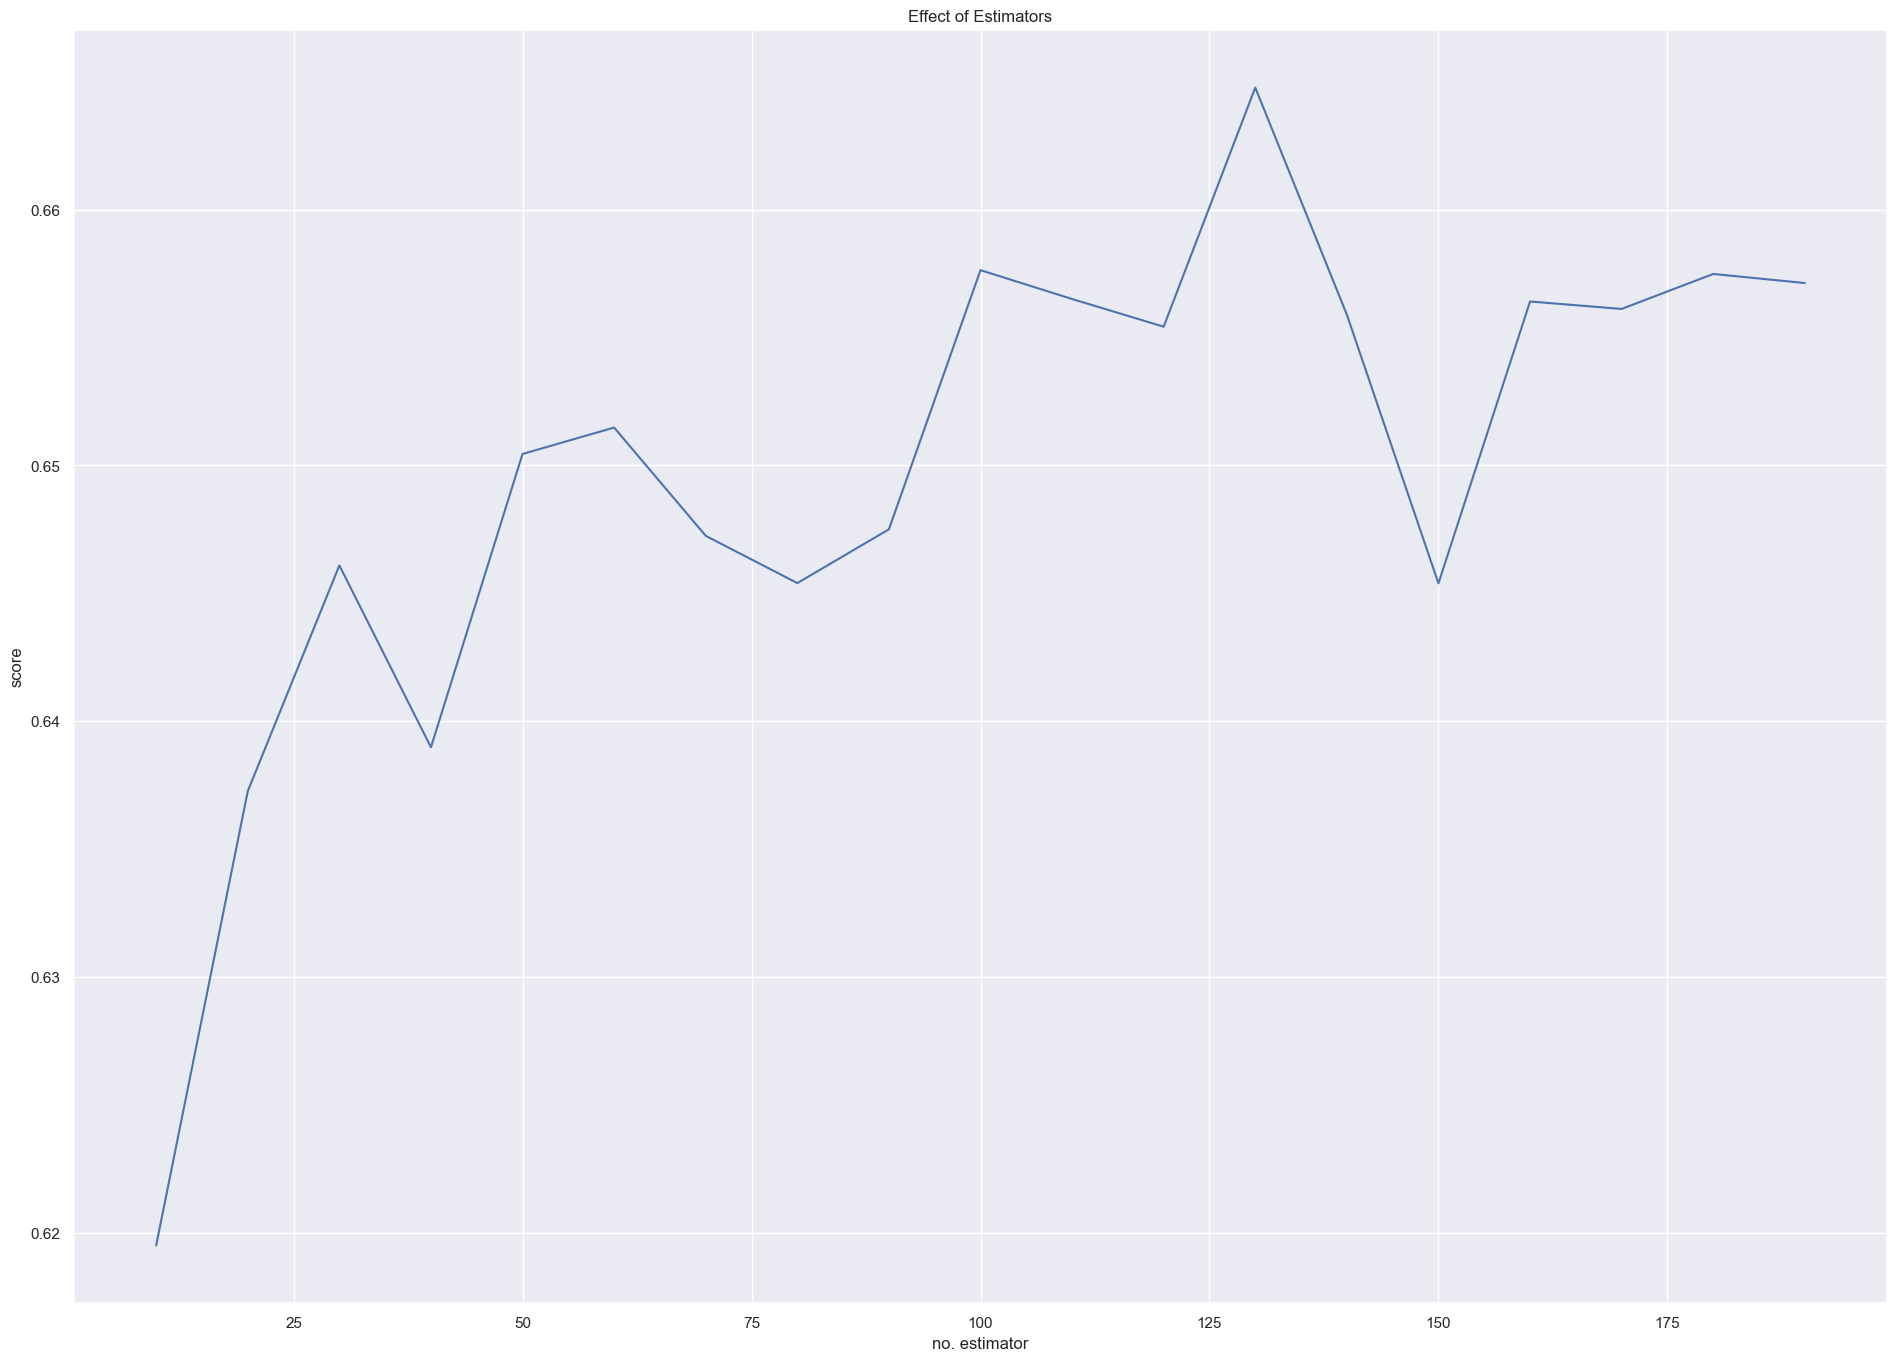

130

In [65]:
model_RF = RandomForestRegressor(n_jobs=-1)

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_RF.set_params(n_estimators=n)
    model_RF.fit(X_train, y_train)
    scores.append(model_RF.score(X_test, y_test))

plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

best_estimators = estimators[np.argmax(scores)]
estimators[np.argmax(scores)]

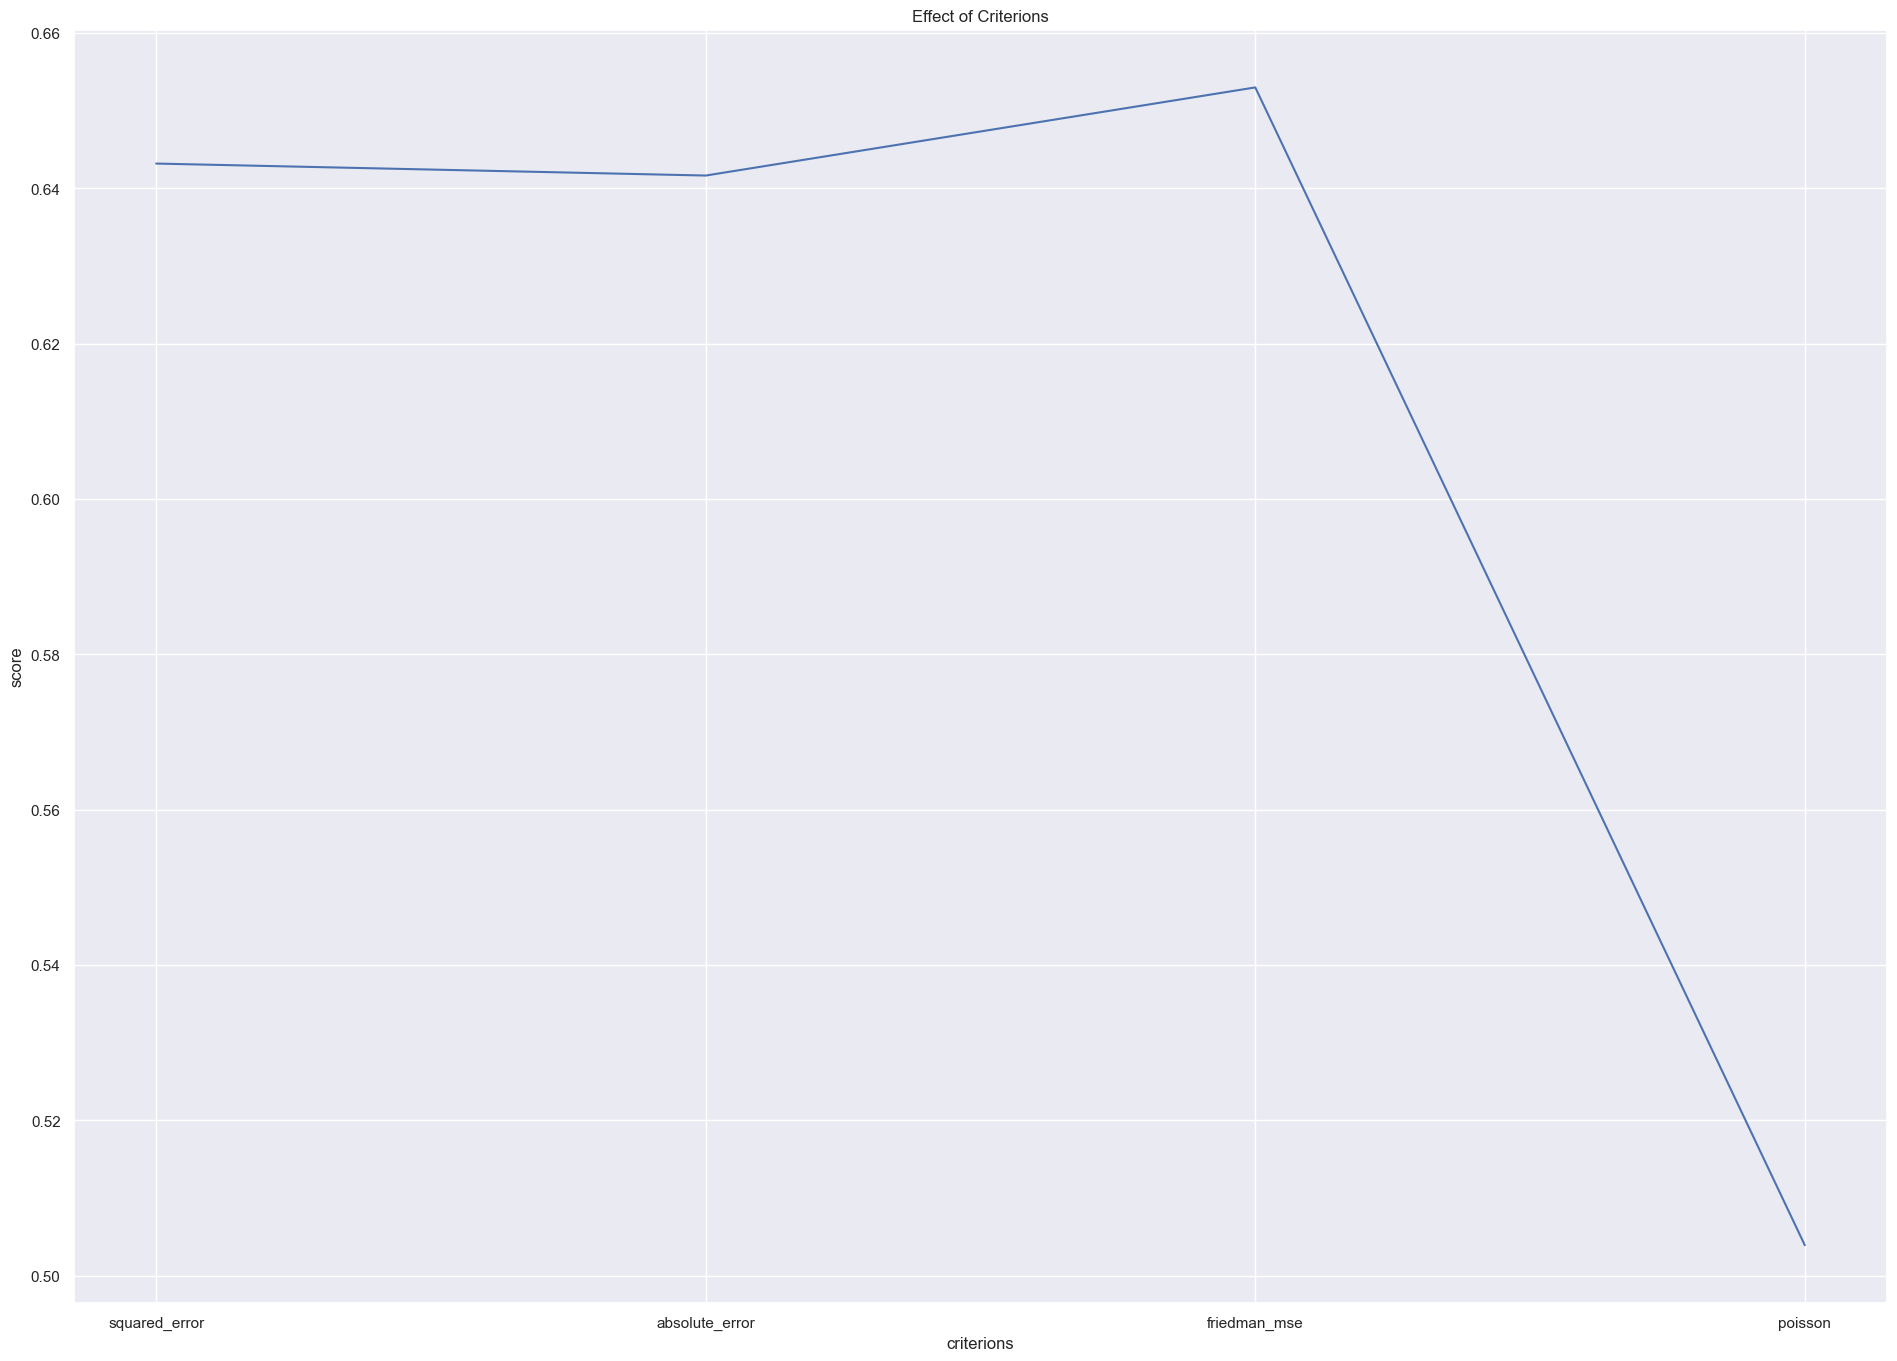

'friedman_mse'

In [66]:
criterions = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

scores = []
for criterion in criterions:
    model_RF.set_params(n_estimators=best_estimators, criterion=criterion)
    model_RF.fit(X_train, y_train)
    scores.append(model_RF.score(X_test, y_test))

plt.title("Effect of Criterions")
plt.xlabel("criterions")
plt.ylabel("score")
plt.plot(criterions, scores)
plt.show()

best_criterion = criterions[np.argmax(scores)]
criterions[np.argmax(scores)]

### K-Nearest Neighbors

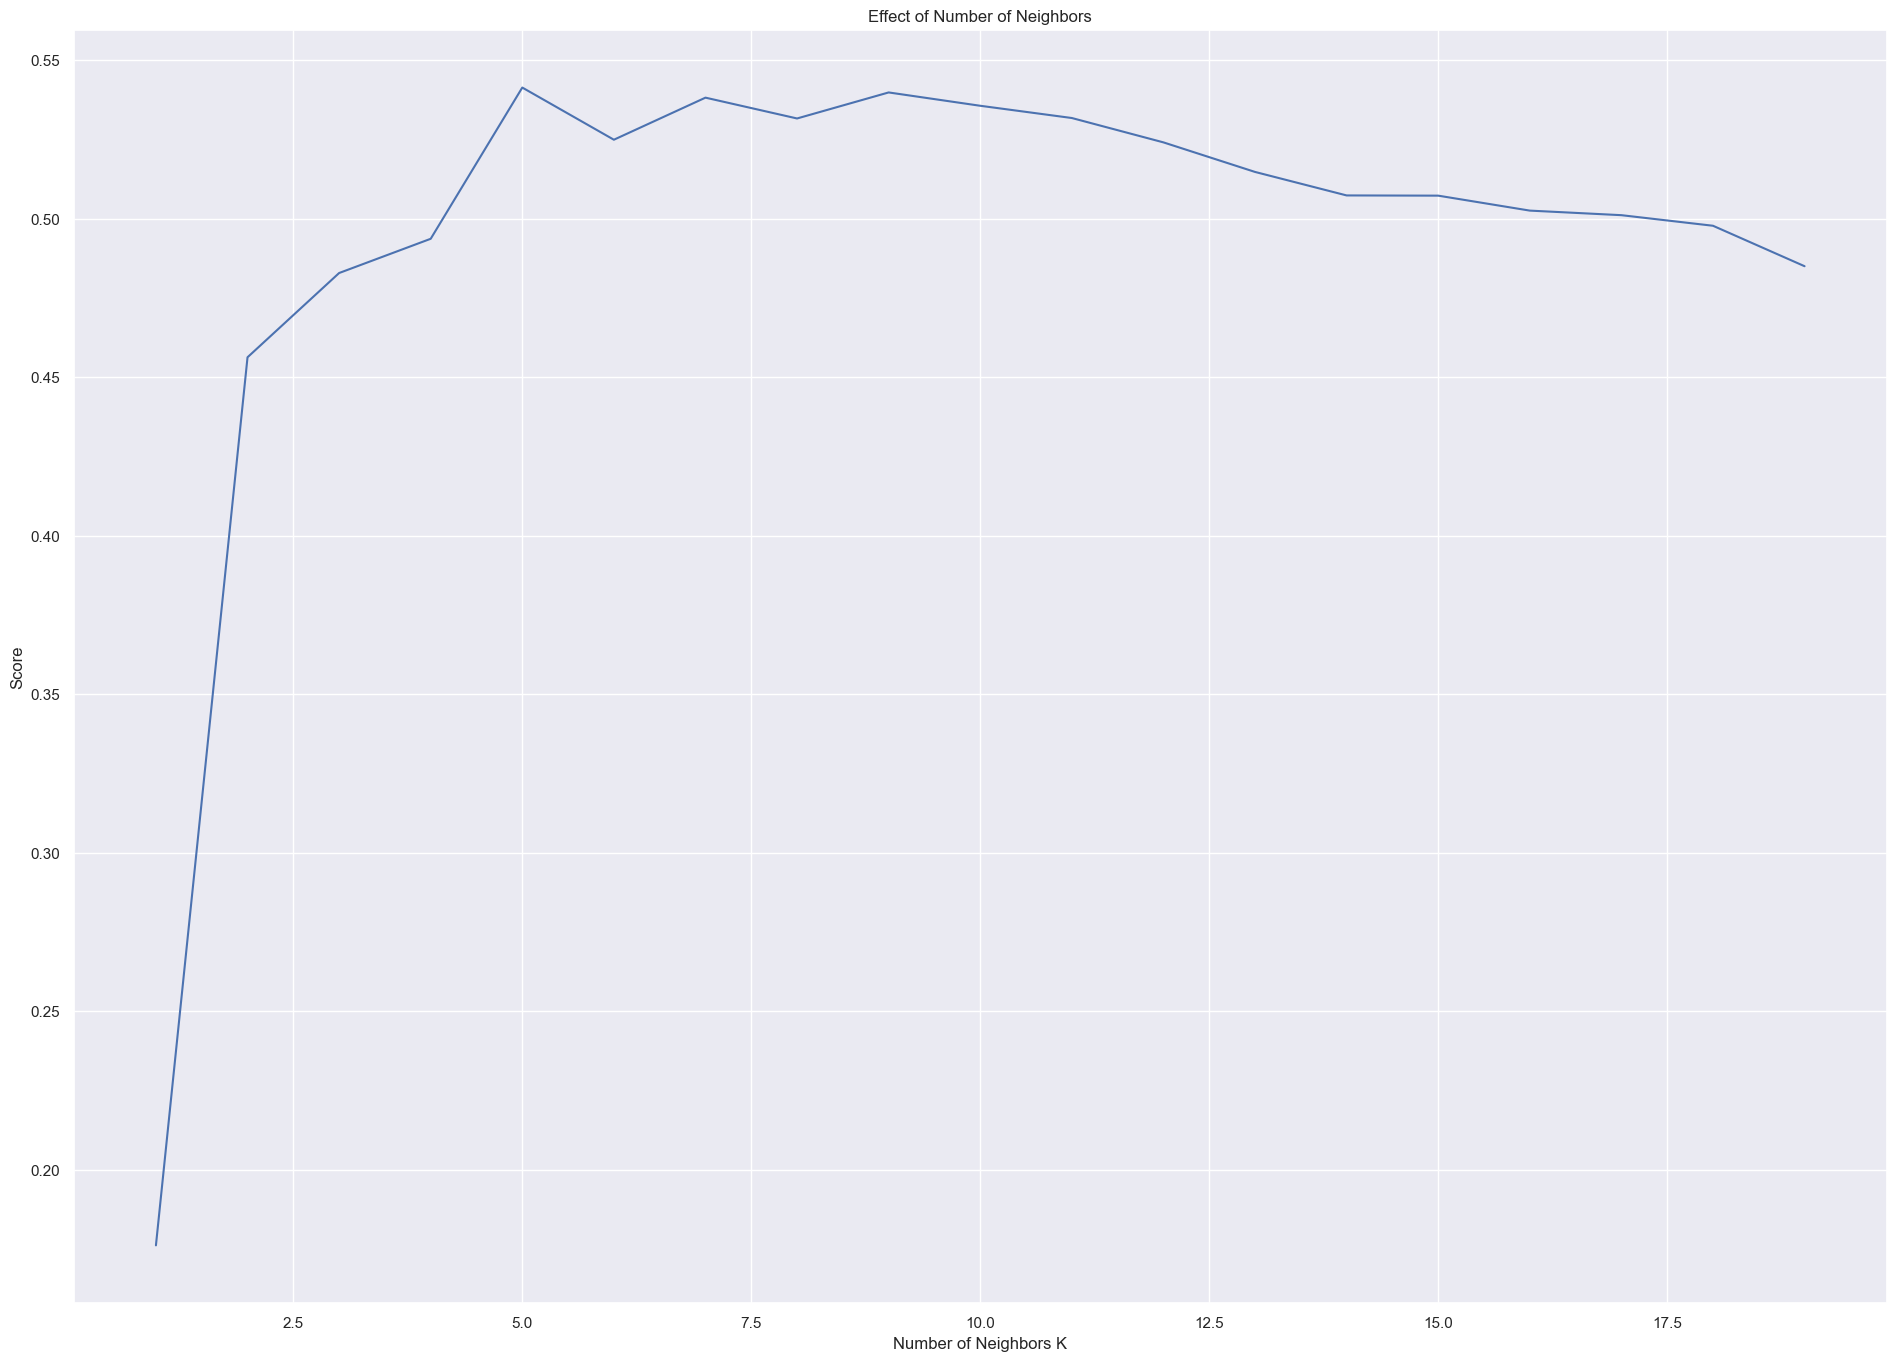

5

In [67]:
model_KNN = KNeighborsRegressor()

n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model_KNN.set_params(n_neighbors=n)
    model_KNN.fit(X_train, y_train)
    scores.append(model_KNN.score(X_test, y_test))

plt.title("Effect of Number of Neighbors")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)
plt.show()

best_n_neighbors = n_neighbors[np.argmax(scores)]
n_neighbors[np.argmax(scores)]

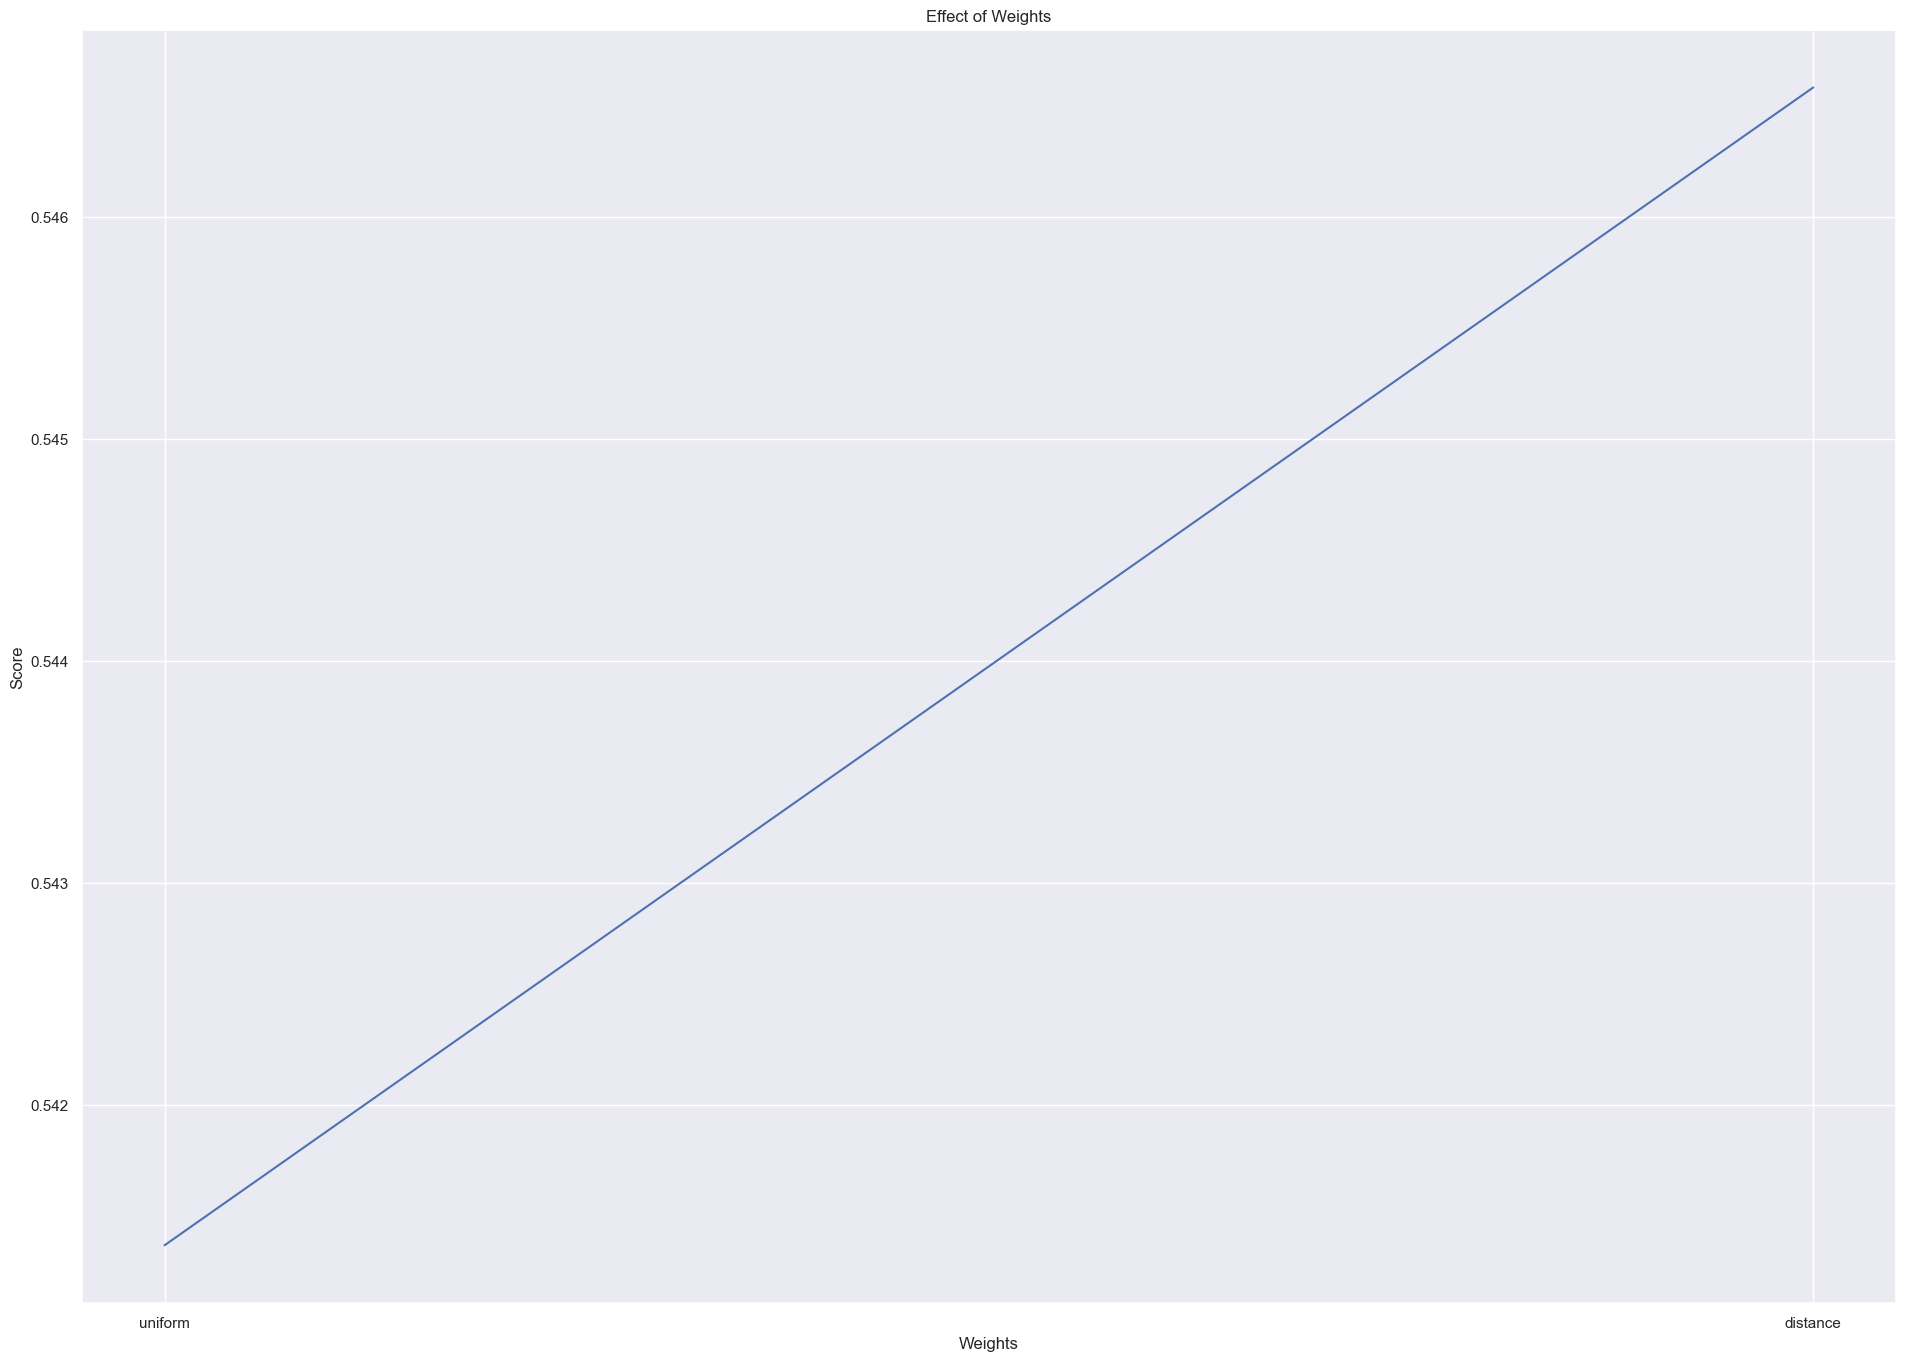

'distance'

In [68]:
weights = ['uniform', 'distance']
scores = []
for weight in weights:
    model_KNN.set_params(n_neighbors=best_n_neighbors, weights = weight)
    model_KNN.fit(X_train, y_train)
    scores.append(model_KNN.score(X_test, y_test))

plt.title("Effect of Weights")
plt.xlabel("Weights")
plt.ylabel("Score")
plt.plot(weights, scores)
plt.show()

best_weights = weights[np.argmax(scores)]
weights[np.argmax(scores)]

### Metrics

In [69]:
model_RF = RandomForestRegressor(n_estimators=best_estimators, criterion=best_criterion, n_jobs=-1)
model_RF.fit(X_train, y_train)

predictions = model_RF.predict(X_test)

In [70]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.12798856548856574)

In [71]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.15928420417701125)

In [72]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.6602164338407306)

In [73]:
model_KNN = KNeighborsRegressor(n_neighbors=best_n_neighbors, weights = best_weights, algorithm = 'ball_tree')
model_KNN.fit(X_train, y_train)

predictions = model_KNN.predict(X_test)

In [74]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.14627044817780616)

In [75]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.18400134750452418)

In [76]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.5465817910490838)